<a href="https://colab.research.google.com/github/snikhil17/Simplilearn-Healthcare-Capstone/blob/main/Capstone_Diabeties_Own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description

# **Dataset Description**
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 
- **Pregnancies:**	Number of times pregnant
- **Glucose:**	Plasma glucose concentration in an oral glucose tolerance test
- **BloodPressure:**	Diastolic blood pressure (mm Hg)
- **SkinThickness:**	Triceps skinfold thickness (mm)
- **Insulin:**	Two hour serum insulin
- **BMI:**	Body Mass Index
- **DiabetesPedigreeFunction:**	Diabetes pedigree function
- **Age:**	Age in years
- **Outcome:**	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

# **Tasks:**
## **Data Exploration:**
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

## **Data Exploration:**

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## **Data Modeling:**
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

## **Data Reporting:**
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
  - Pie chart to describe the diabetic or non-diabetic population
  - Scatter charts between relevant variables to analyze the relationships
  - Histogram or frequency charts to analyze the distribution of the data
  - Heatmap of correlation analysis among the relevant variables
  - Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

## **Tableau Dashboard**
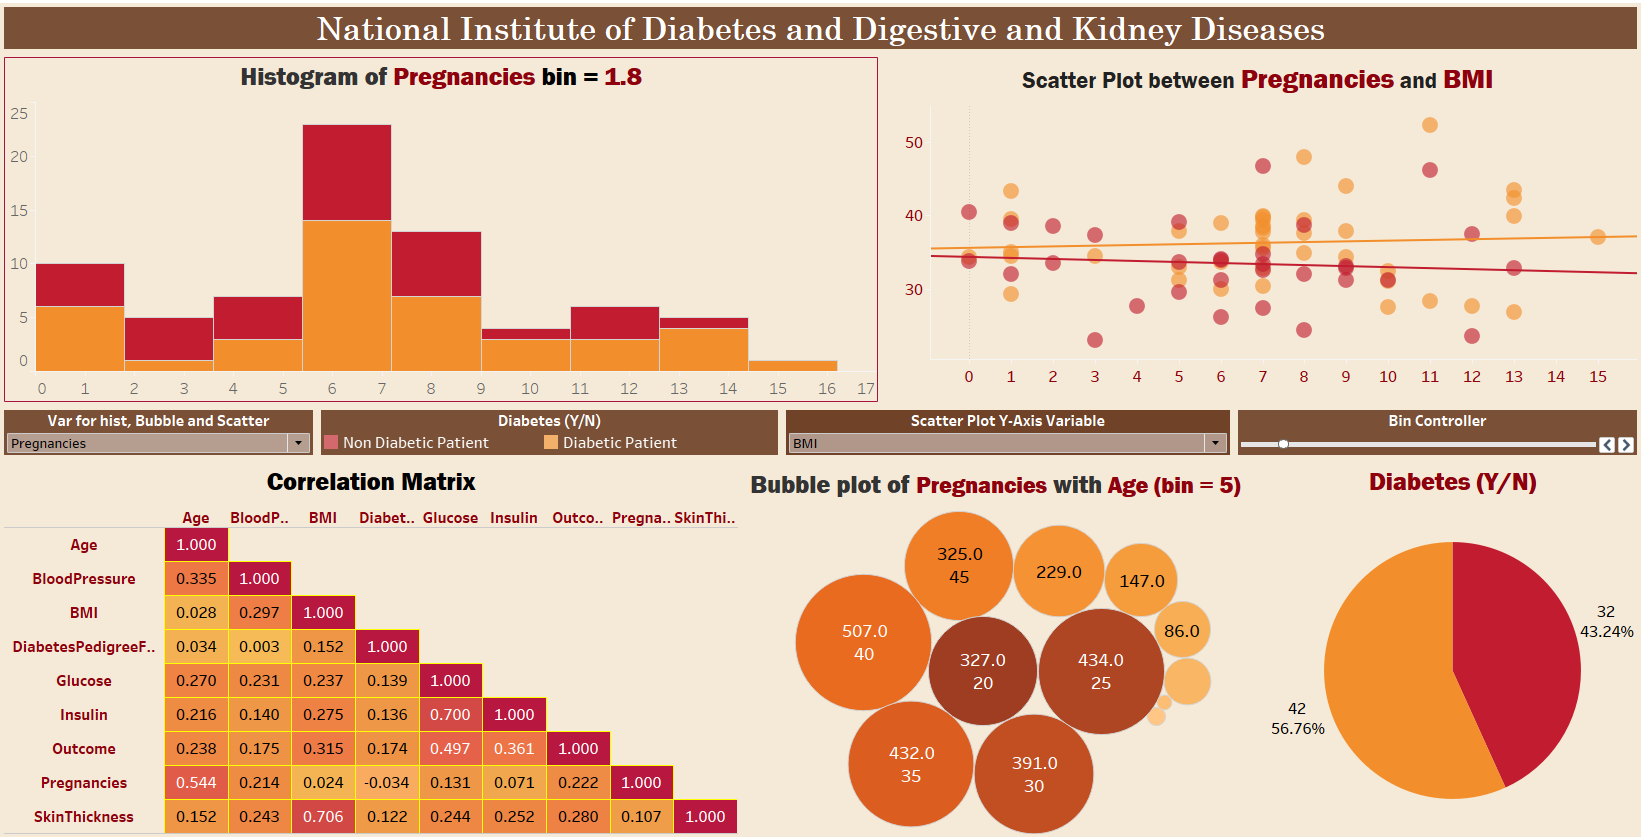

# **Aquire Data**

In [ ]:
!wget https://raw.githubusercontent.com/snikhil17/Simplilearn-Healthcare-Capstone/main/health%20care%20diabetes.csv

--2022-03-07 07:07:49--  https://raw.githubusercontent.com/snikhil17/Simplilearn-Healthcare-Capstone/main/health%20care%20diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘health care diabetes.csv.1’

health care diabete 100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2022-03-07 07:07:50 (10.4 MB/s) - ‘health care diabetes.csv.1’ saved [23873/23873]



# **Importing required Libraries**

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, StratifiedKFold

import statsmodels.api as sm

import optuna
from sklearn import preprocessing
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, BaggingClassifier,
                              GradientBoostingClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier


import warnings
warnings.filterwarnings('ignore')

# **Loading and reading data**

In [ ]:
df = pd.read_csv('/content/health care diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# **Checking information of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 # **Data description**

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## **Observations**
- There are no missing value as such but as instructed in the tasks, we have value = 0 for some variable where 0 is not possible, hence we will consider them as missing values and impute them in further steps. Columns that cannot have 0 as their value (and include 0): **Glucose, BloodPressure, SkinThickness, Insulin, BMI**

- We have only integer and float type of data types. Out of which **BMI** and **DiabetesPedigreeFunction** are continuous and rest are discrete variables.



# **Marking NaN**

In [ ]:
na_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[na_cols] =df[na_cols].apply(lambda x: x.replace(0, np.nan))
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# **Missing Values Analysis**

In [ ]:
((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values percentage'}, axis = 1).style.background_gradient('gist_heat_r')

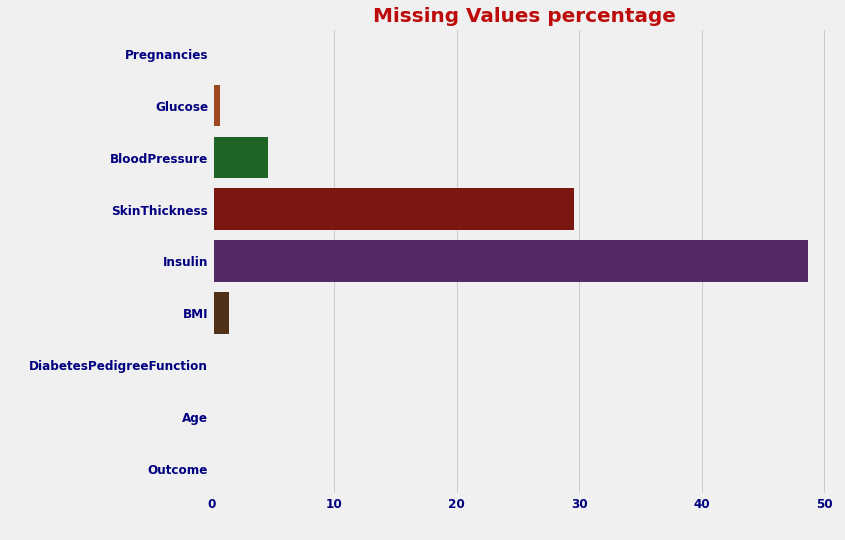

In [ ]:
missing_val_df = ((df.isnull().sum() / df.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');


## **Observations**
- Insulin has highest missing value percentage (48.7) 
- SkinThickness and BloodPressure has 29.56 and 4.56 % missing values respectively.
- BMI and Glucose has 1.43 and 0.65 % missing values respectively. 

### **Strategy to Impute Missing Values:**
- Since **Glucose, BloodPressure, SkinThickness, Insulin, BMI** in given data are continuous numerical numbers. We will usescikit-learn **Iterative imputer** to impute the missing values.



# **Missing Value Imputation**
## **Split the Data**

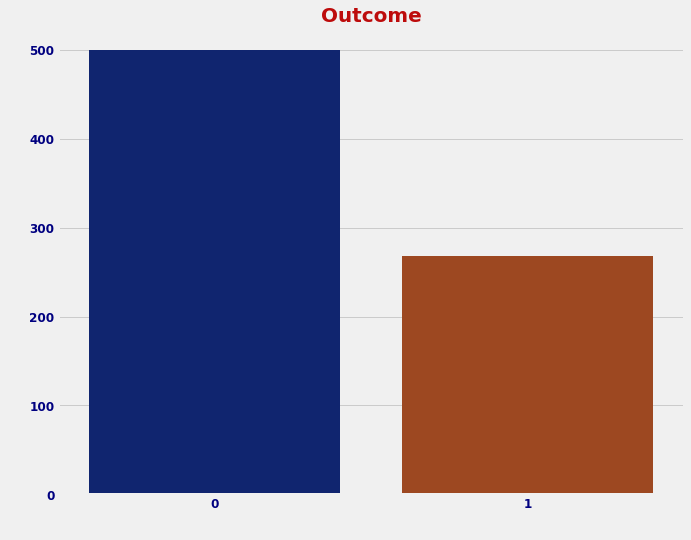

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Outcome', palette='dark')
plt.title('Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');


In [ ]:
"""Imputing BMI using Iterative Imputer"""
it_imputer = IterativeImputer(max_iter=100)
iterimp = it_imputer.fit_transform(df)

"""Create train test imputed dataframe"""
df_eda = pd.DataFrame(iterimp, columns=df.columns)

In [ ]:
df_eda.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Saving Data for Tableau**

In [ ]:
""""Saving Correlation Matrix data to create correlation matrix in Tableau"""
cor_m = df_eda.corr().unstack().to_frame().reset_index().rename({'level_0':'level_1_col','level_1':'level_2_col', 0:'Correlation' }, axis =1)
cor_m.to_csv('Correlation_Pivot.csv', index = False)

In [ ]:
"""Saving File for Tableau"""
df_tab = df_eda.copy()
df_tab = df_tab.reset_index().rename({'index': 'RowNumber'}, axis = 1)

df_tab.to_csv('data_diabetes.csv', index = False)

# **Univariate Analysis**

In [ ]:
for i in ['Pregnancies', 'Age']:
  df_eda[i] = df_eda[i].astype(int)


# **Exploratory Data Analysis (EDA)**
## **Univariate Analysis**

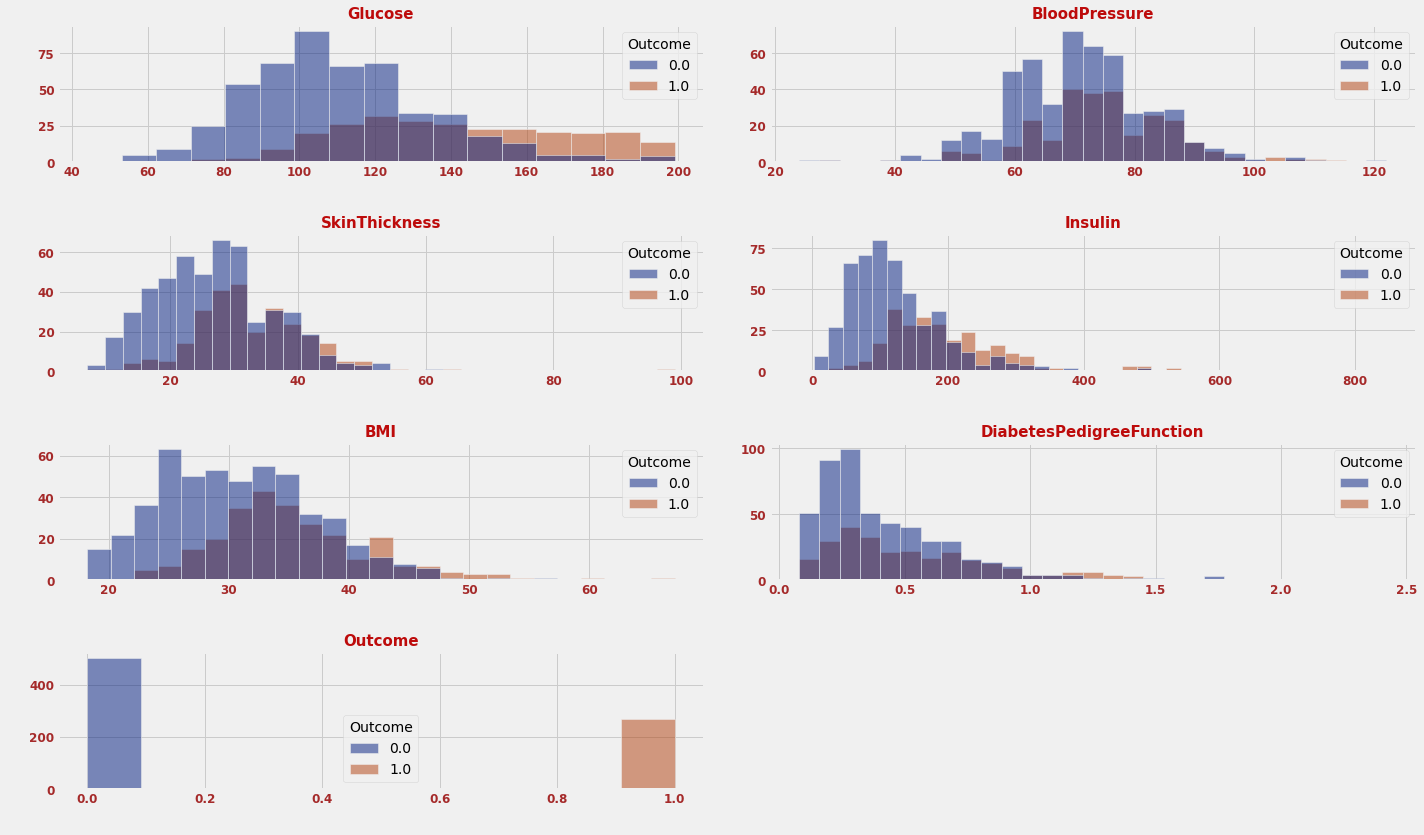

In [ ]:
plt.figure(figsize = (20,20))

for i,col in enumerate(df_eda.drop(['Pregnancies', 'Age'], axis = 1)):
  plt.subplot(7,2,i+1)
  sns.histplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

In [ ]:
"""Count plots of Pregnencies and Age with hue as Outcome"""
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Age']):
  plt.subplot(2,1,i+1)
  sns.countplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

## **Observations:**
- Diabeties are most common in age of 30-35, 44-50 and 55+ as these age groups have more diabetic patient than non-diabetic patient. 
- We cannot infer much from the Pregnancies, but as per data, people with 12 Pregnancies have more diabetic patient than non-diabetic patient.


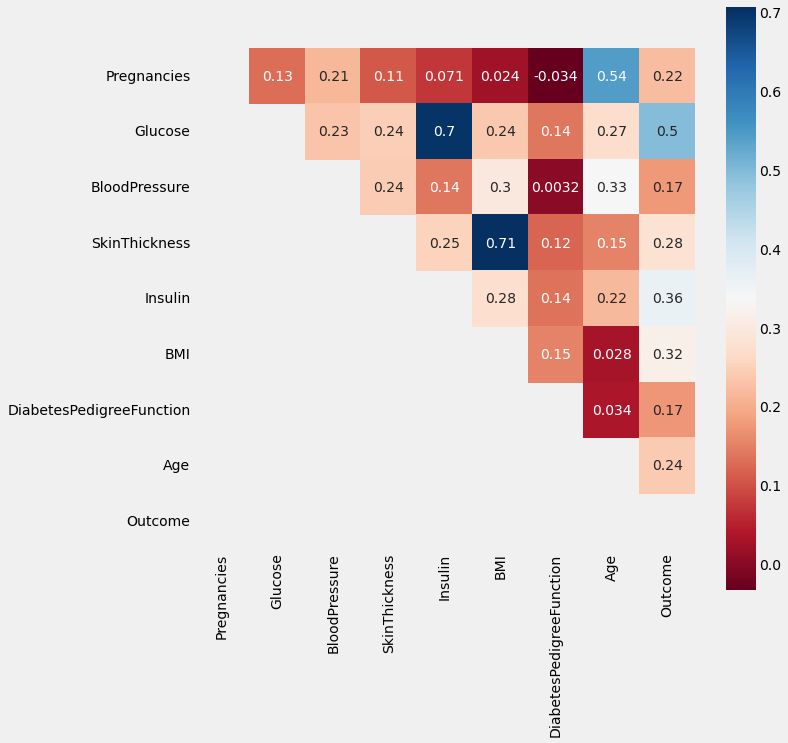

In [ ]:
"""Correlation Matrix"""
corr_matrix=df_eda.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True);

## **Observations:**
- A **heatmap** is a two-dimensional representation of information with the help of colors. Heatmaps can **help the user visualize simple or complex information.**
- Outcome (Target Variable) doesn't have much correlation with other variables. 
- Pregnancies and Age are correlated.
- SkinThickness and BMI are highly correlated.
- Glucose and Insulin are highly correlated.

In [ ]:
"""Pie Chart of Pregnencies and Outcome"""
for i in ['Pregnancies', 'Outcome']:
  df.groupby(i)[i].count().plot.pie(y = i, figsize=(10, 10))
  plt.show()
  plt.tight_layout();

<Figure size 432x288 with 0 Axes>

# **Bi-variate Analysis**

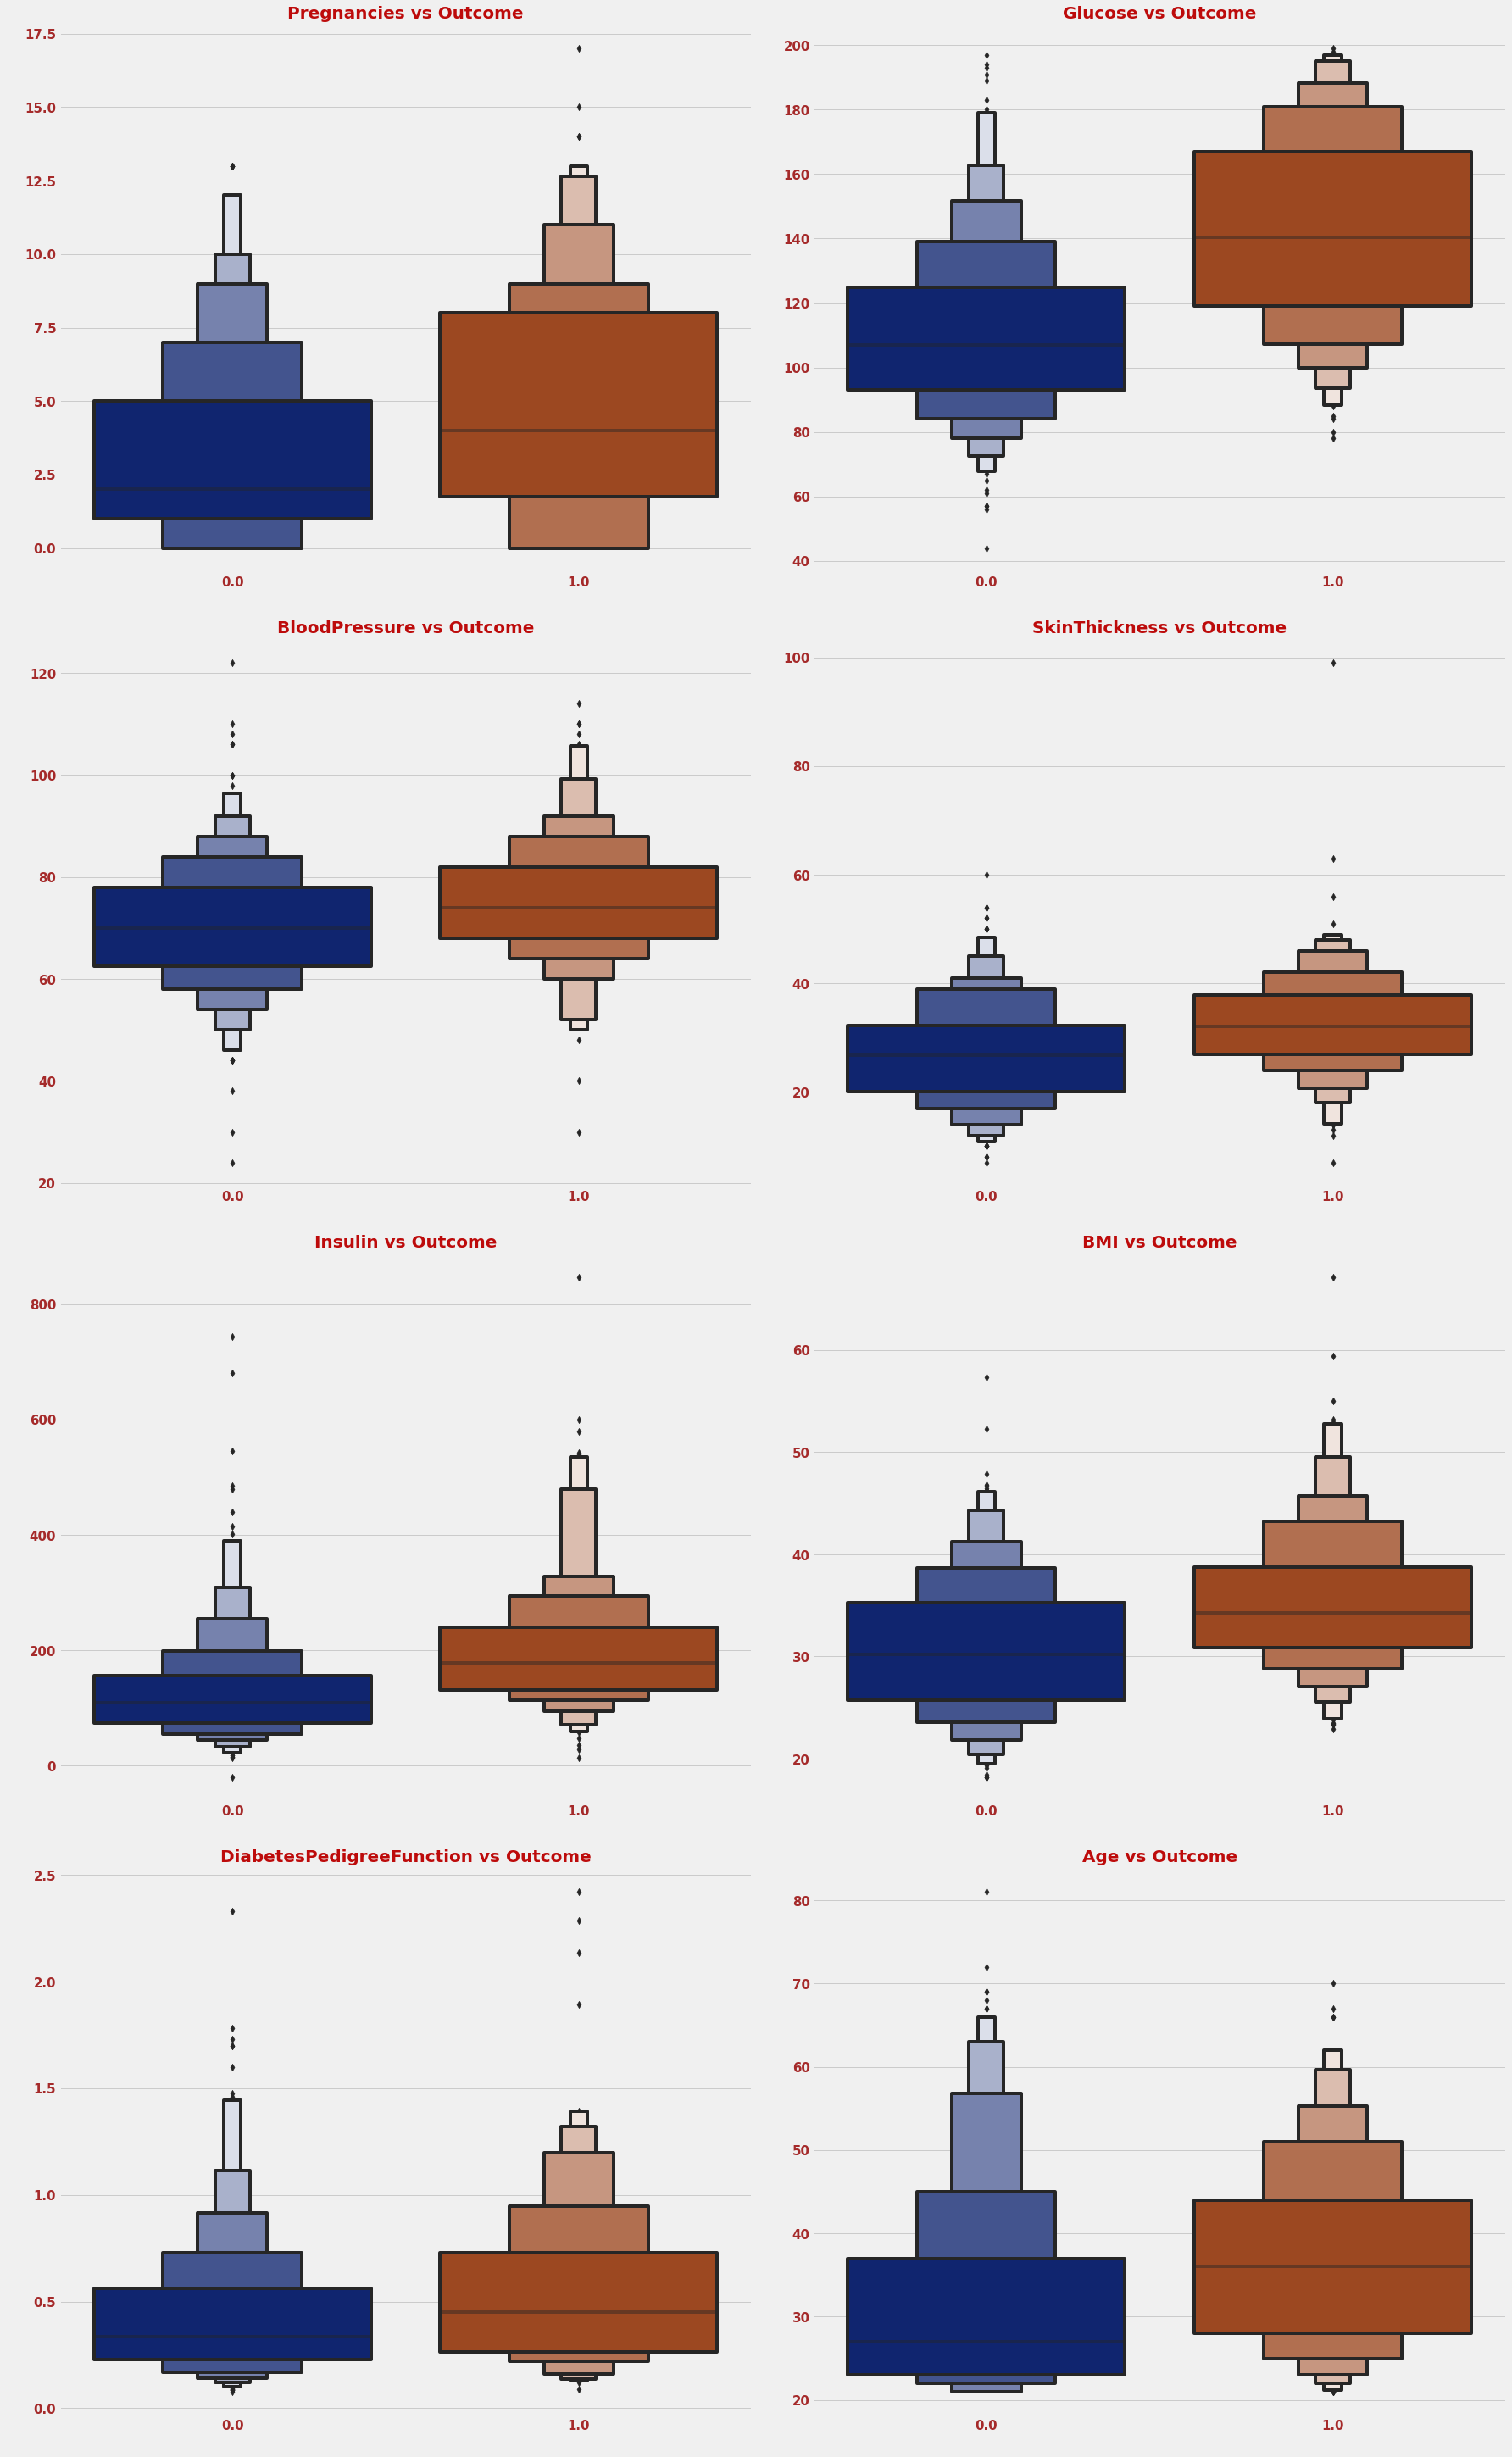

In [ ]:
plt.figure(figsize = (25,50))

for i,col in enumerate(df_eda.drop(['Outcome'], axis =1).columns):
  plt.subplot(5,2,i+1)
  sns.boxenplot(x = 'Outcome',y = col,  data = df_eda,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

## **Observations:**
- Above Graphs are **Boxen Plots** of **all features** divided by Target variable (**Outcome**)

### **Pregnencies vs Outcome**
- Pregnent Non diabetic and pregnent diabetic patients have same Median
- Non diabetic have more variance than diabetic patient. 
- Outliers are present in both groups but non-diabetic is more skewed

### **Glucose vs Outcome**
- Non diabetic patient Glucose level have more spread when compared to Diabetic Patient glucose level.
- Both have outliers but Non diabetic patient Glucose level have more spread-out outliers
- Both have same Median, but IQR  of Diabetic patients is little higher than Non-diabetic patients.

### **Blood Pressure vs Outcome**
- Blood Pressure of Diabetic Patients and Non diabetic patients have same median and IQR
- They both have outliers and approximately same spread. 
- Patients who have Diabeties seem to have extreme low blood pressure.

### **SkinThickness vs Outcome**
- SkinThickness of  Diabetic Patients and Non diabetic patients have same median and but IQR of Non-diabetic patients are little higher than diabetic patients. 
- Outliers in both groups but have one  Diabetic Patient seem to have a very high value of SkinThikness.

### **Insuline vs Outcome**
- Insuline value in Non Diabetic patients is has high variance compared to Insulin value in Diabetic Patients.
- Non Diabetic patients has slightly higher insulin median and lower IQR than Diabetic patients
- Outliers are more in non-diabetic patients than in diabetic patients.

### **BMI vs Outcome**
- BMI of non diabetic patients have same median  and slightl higher IQR than diabetic patients 
- Outliers present in both but non-diabetic patients have more extreme outliers. 

### **DiabetesPedigreeFunction vs Outcome**
- DiabetesPedigreeFunction in non-diabetic patients are almost similar interms of median and IQR
- Outliers are present in both but non-diabetic patients have more outliers and variance.

### **Age vs Outcome**
- Age of Diabetic patients has higher median.
- Diabetic patients age has more outliers, higher IQR and variance which shows that diabeties is observed in both young and old people. 


# **Outlier Treatment**
- Using Capping and Flooring method to replace outliers

In [ ]:
"""Creating a list of Outliers columns"""
outliers_cols = []
for col in df_eda.drop(['Outcome'], axis = 1).columns:
  q25, q75 = np.percentile(df_eda[col], 25), np.percentile(df_eda[col], 75)
  iqr = q75 - q25
  outlier_th = iqr*1.5
  lower_th = q25 - outlier_th
  upper_th = q75 - outlier_th 
  if any(df_eda[col].values < lower_th) or any(df_eda[col].values > upper_th):
    outliers_cols.append(col)

print(outliers_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
"""Treating Outliers"""
for col in outliers_cols:
  percentiles = df_eda[col].quantile([0.01, 0.99]).values
  df_eda[col] = np.clip(df_eda[col], percentiles[0], percentiles[1])

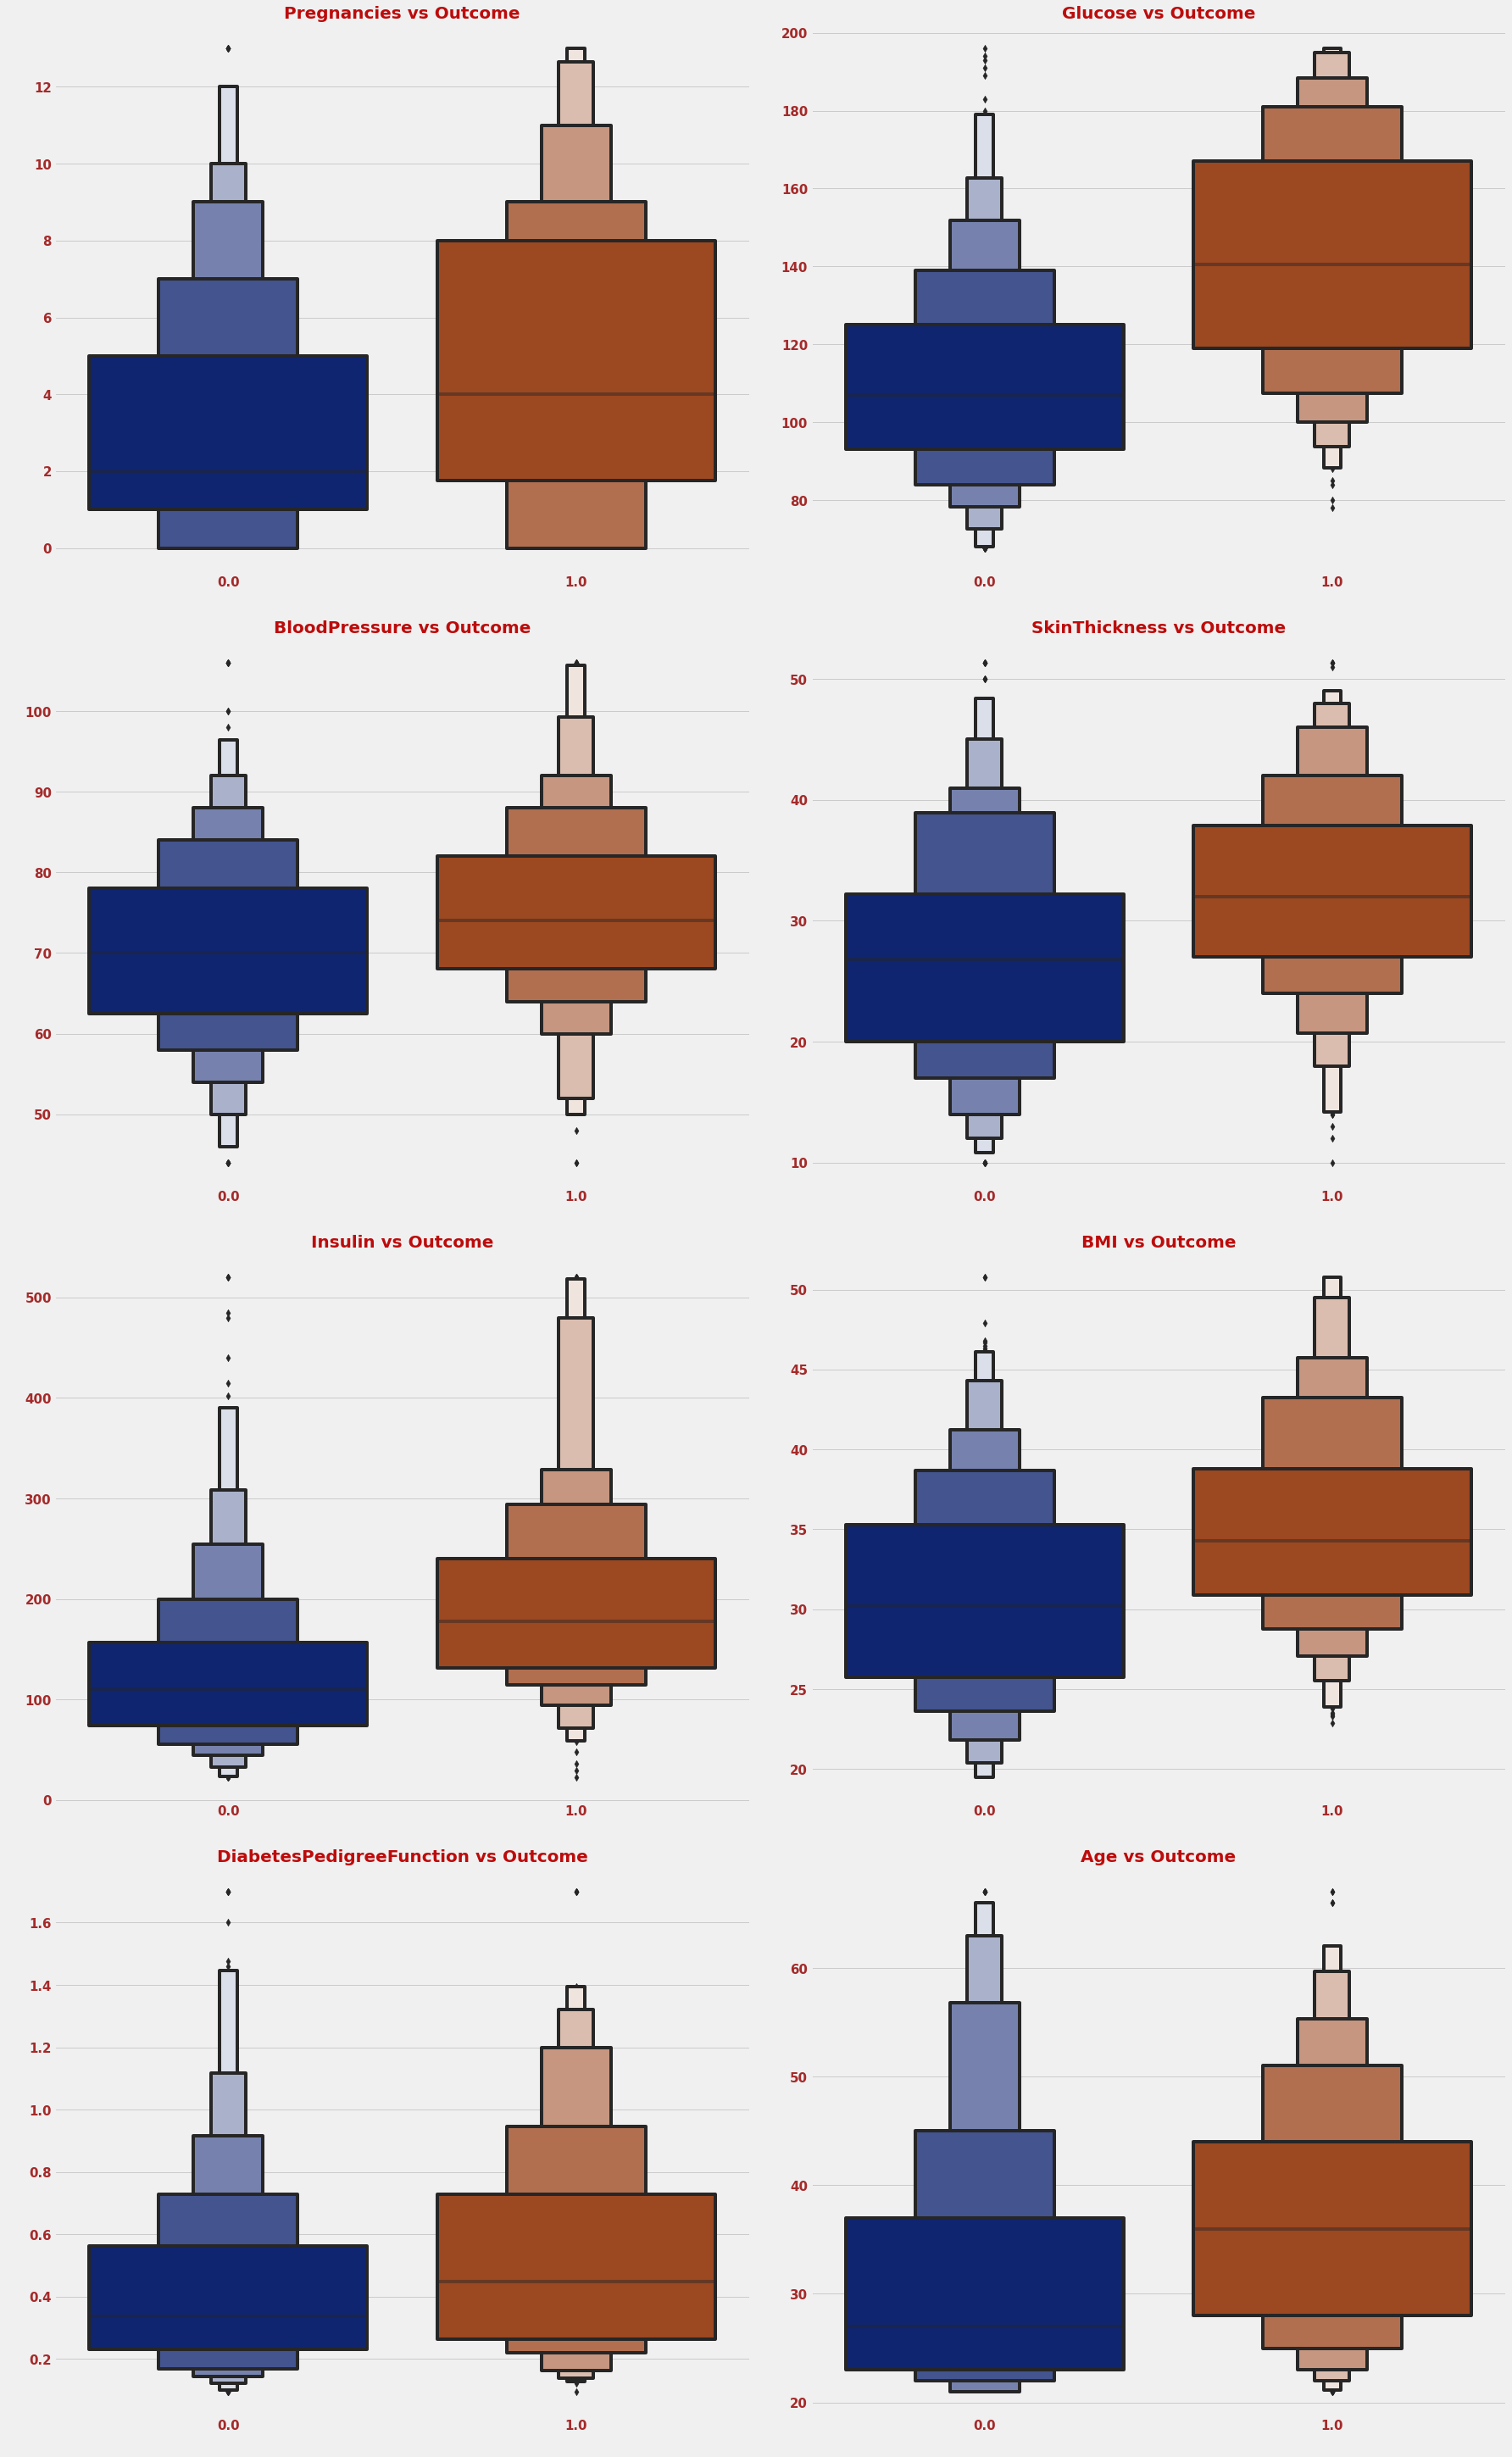

In [ ]:
"""Checking the distribution using Boxen plots after capping and flooring Outliers"""
plt.figure(figsize = (25,50))

for i,col in enumerate(df_eda.drop([ 'Outcome'], axis =1).columns):
  plt.subplot(5,2,i+1)
  sns.boxenplot(x = 'Outcome',y = col,  data = df_eda,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

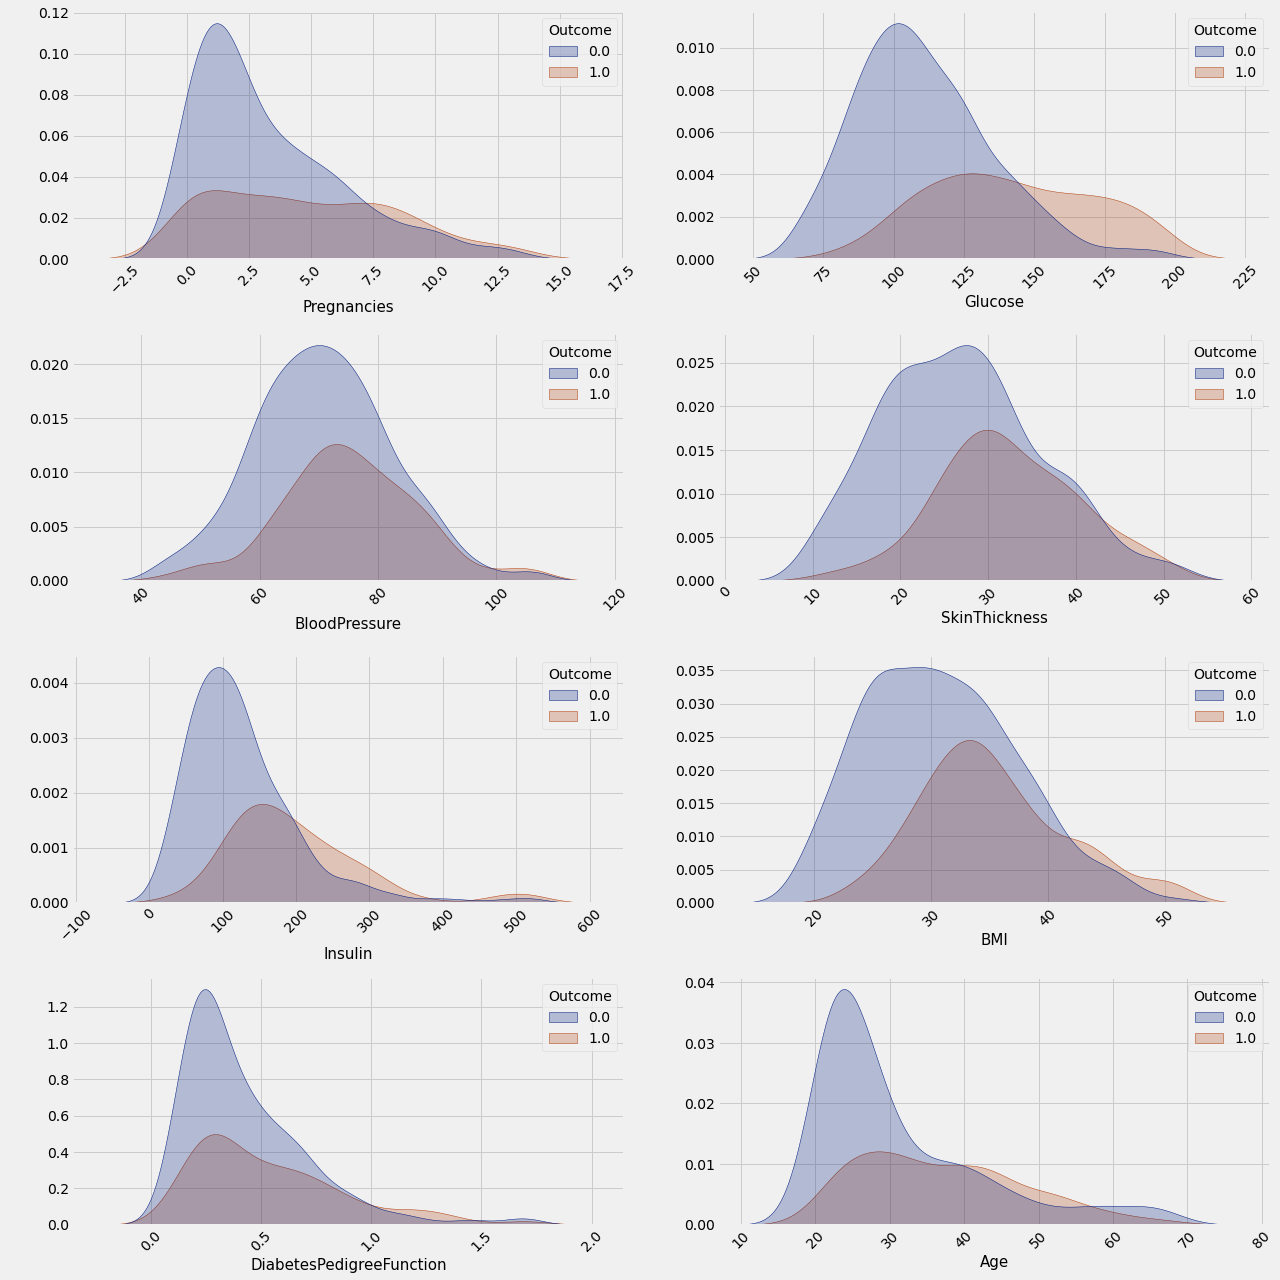

In [ ]:
plt.figure(figsize = (18,18))
for i in enumerate(df_eda.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df_eda, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

In [ ]:
sns.pairplot(df_eda, hue = 'Outcome')

**Pearson's Correlation Coefficient** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

# **Feature Transformation: QQ Plots**
- We'll check if the distribution is Normal or not using QQ plots. If not, then we will transform the variables accordingly to achieve the normal-distribution of variables. 

In [ ]:
col_num = df_eda.columns
fig, axs = plt.subplots(len(col_num), 2,
                        figsize=(15, len(df_eda.columns)*6))

for i, col in enumerate(col_num):
    sns.histplot(df_eda[col], ax=axs[i, 0])
    sm.qqplot(df_eda[col].dropna(), line="s", ax=axs[i, 1], fmt='b')
    axs[i, 1].set_title(col)    
    plt.tight_layout()

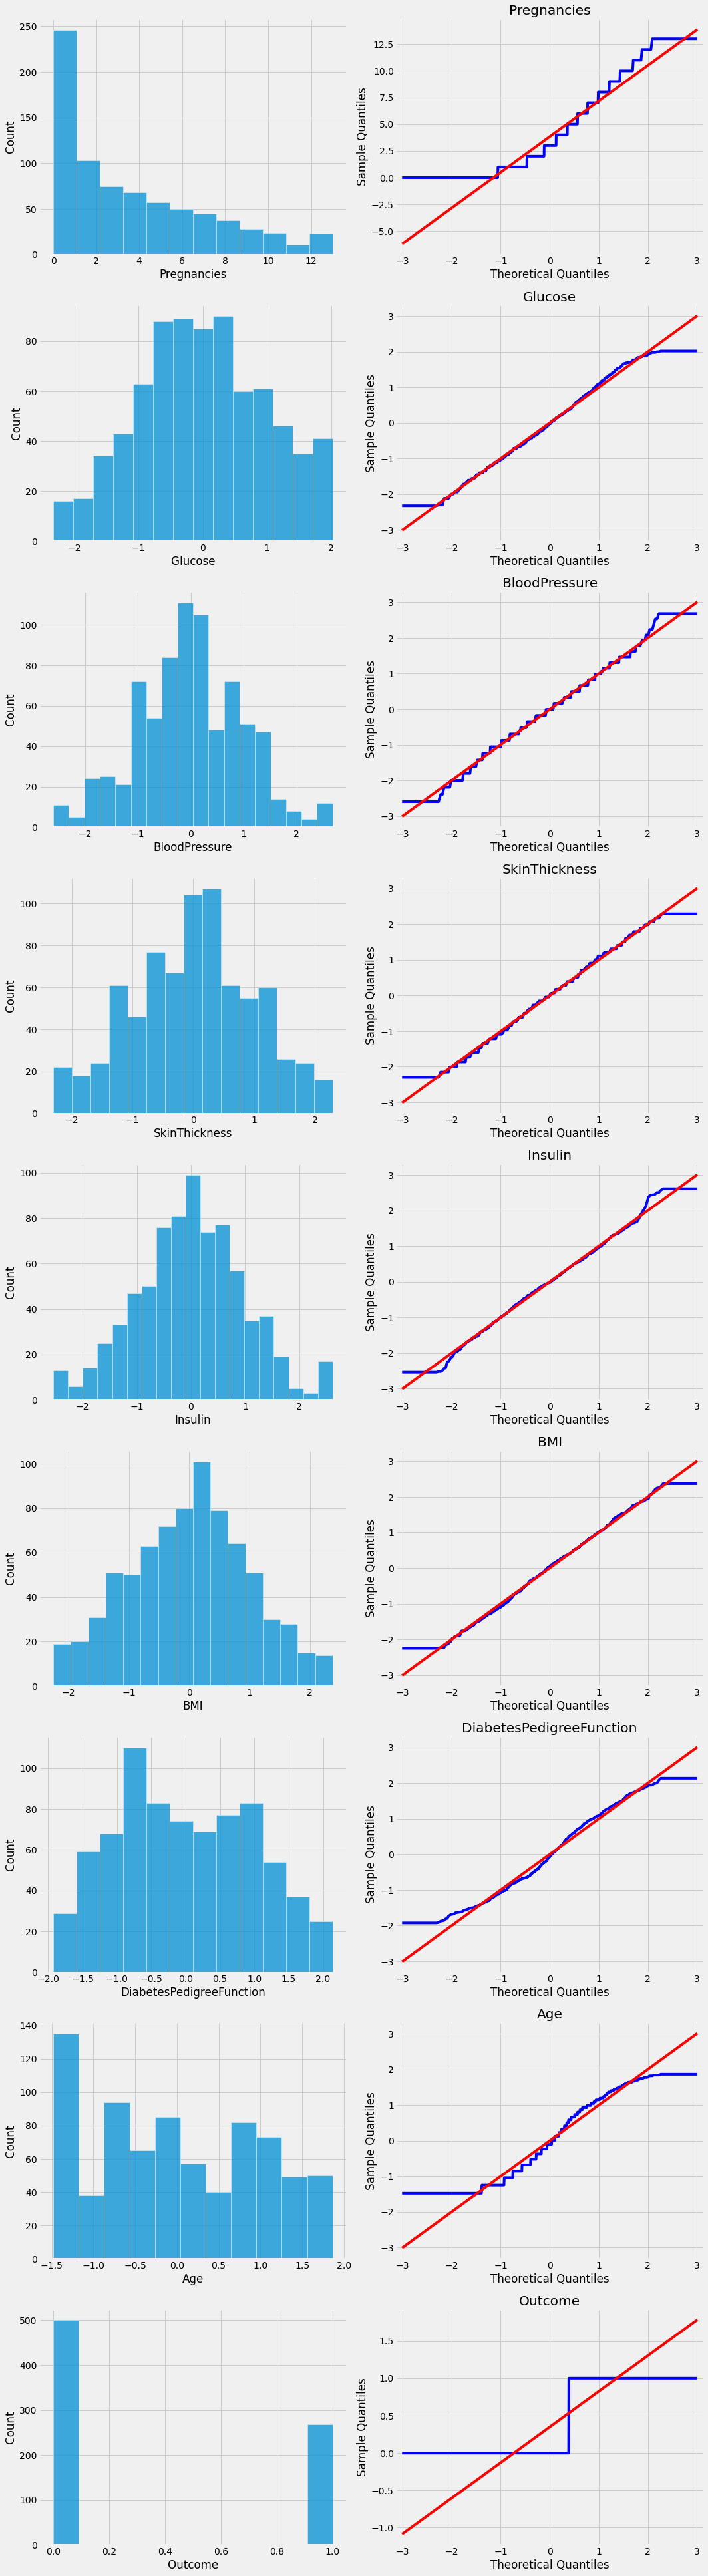

In [ ]:
"""Transforming the Variables to attain Normal Distribution"""
pt = preprocessing.PowerTransformer()
for col in df_eda.drop(['Outcome', 'Pregnancies'], axis =1).columns:
  df_eda[col] = pt.fit_transform(df_eda[col].values.reshape(-1,1))

fig, axs = plt.subplots(len(col_num), 2,
                        figsize=(15, len(df_eda.columns)*6))

for i, col in enumerate(col_num):
    sns.histplot(df_eda[col], ax=axs[i, 0])
    sm.qqplot(df_eda[col].dropna(), line="s", ax=axs[i, 1], fmt='b')
    axs[i, 1].set_title(col)    
    plt.tight_layout()

In [ ]:
"""Label Encoding Pregnancies Variable"""
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(list(df_eda['Pregnancies'].astype('str').values))
df_eda['Pregnancies'] = label_encoder.transform(df_eda['Pregnancies'].astype('str'))

## Observations:
- Data has been transformed using Power-Transformation from Scikit-learn.
- As there were no other transformation required for this data, we stopped with Power-Transforming data to achieve nearly normal-distributed data.

In [ ]:
X = df_eda.drop(['Outcome'], axis =1)
Y = df_eda[['Outcome']]
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
col_X = list(X.columns)
col_y = list(Y.columns)
X_res,y_res=smk.fit_resample(X,Y)

print(X_res.shape,y_res.shape)

X = pd.DataFrame(X_res, columns = col_X)
Y = pd.DataFrame(y_res, columns = col_y)

df = X
df['Outcome'] = y_res
print(f"shape of dataset resampling: {df_eda.shape}")

from collections import Counter
print(f'Original dataset Outcome variable count {Counter(df_eda["Outcome"])}')
print(f'Resampled dataset Outcome variable count {Counter(df["Outcome"])}')

(960, 8) (960, 1)
shape of dataset resampling: (768, 9)
Original dataset Outcome variable count Counter({0.0: 500, 1.0: 268})
Resampled dataset Outcome variable count Counter({1.0: 480, 0.0: 480})


# **Model Building**
### **Approach:**
- Create a Baseline model KNN with Cross-Validation.
- Create other models and compare with KNN (baseline model)
- Use Optuna for hypertuning 
- Use Pipeline to create the pre-processing steps.
- Visualize the results from different models and select the best model.


## **Evaluation**
### **Confusion Matrix**

- **Confusion matrix**: A confusion matrix is a table that is often used to describe the performance of a classification model true positives (TP): These are cases in which we predicted yes.

- **true negatives (TN):** We predicted no, and they don't have the disease.

- **false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

- **false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

- **precision** - What proportion of positive identifications was actually correct? 

- **recall** - What proportion of actual positives was identified correctly?

- **F1 Score:**
    - F1 Score is the weighted average of Precision and Recall
    - F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

# **Hyperparameter Tuning**
### **Now, let’s see where will a hyperparameter optimizer stands in the whole process of learning the algorithm.**
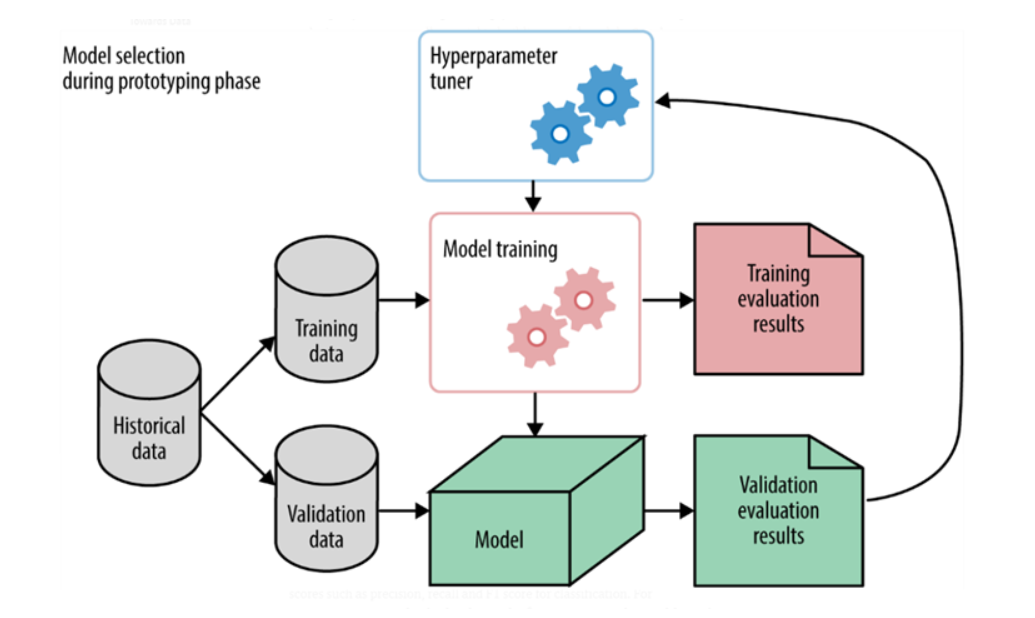

**As can be seen in the above figure, the hyperparameter tuner is external to the model and the tuning is done before model training. The result of the tuning process is the optimal values of hyperparameters which is then fed to the model training stage. Let me now introduce Optuna, an optimization library in Python that can be employed for hyperparameter optimization.**

## **Optuna**

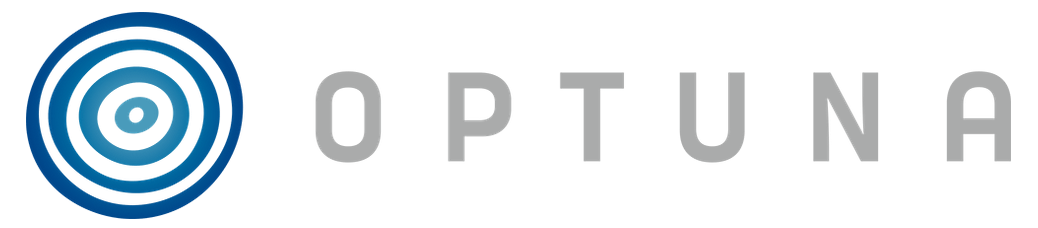

**Optuna is a software framework for automating the optimization process of these hyperparameters. It automatically finds optimal hyperparameter values by making use of different samplers such as grid search, random, bayesian, and evolutionary algorithms. Let me first briefly describe the different samplers available in optuna.**

- Grid Search: The search space of each hyper-parameter is discretized. The optimizer launches learning for each of the hyper-parameter configurations and selects the best at the end.
- Random: Randomly samples the search space and continues until the stopping criteria are met.
- Bayesian: Probabilistic model-based approach for finding the optimal hyperparameters
- Evolutionary algorithms: •Meta-heuristic approaches that employ the value of the fitness function to find the optimal hyperparameters.

## **Why Optuna?** 
The following features of optuna encouraged us to use it for hyperparameter tuning for the problems we were trying to solve!
- Eager dynamic search spaces
- Efficient sampling and pruning algorithms
- Easy integration
- Good visualizations
- Distributed optimization

In [ ]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.copper_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Hide grid lines
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
"""Using the Data for Model Building"""
df['Outcome'] = df['Outcome'].astype(int)
data_proc = df.copy()
# data_proc = df_eda.drop('isTrain', axis =1).copy()


In [ ]:
"""Pre-Processed Data"""
data_proc.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0           10  0.921133      -0.001785       0.704430  0.892942  0.258656   
1            1 -1.351387      -0.520647       0.068328 -1.004163 -0.856693   
2           12  1.755539      -0.697422      -0.780487  1.276242 -1.463521   
3            1 -1.157825      -0.520647      -0.608528 -0.555098 -0.599987   
4            0  0.612706      -2.595201       0.704430  0.416162  1.512276   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.824581  1.367611        1  
1                 -0.170878  0.125601        0  
2                  0.939058  0.229443        1  
3                 -1.302174 -1.479142        0  
4                  2.138072  0.326766        1

In [ ]:
"""Creating Train and Test Data"""
df_train, df_test = train_test_split(data_proc, test_size= 0.15, stratify=data_proc['Outcome'], random_state = 42)

"""Creating Features and Label"""
features = df_train.drop('Outcome', axis =1)
label = df_train.Outcome

## **Hyper-Parameter Tuning for KNN**

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {'n_neighbors' : trial.suggest_int('n_neighbors', 2, 30)
    ,'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    ,'weights' : trial.suggest_categorical('weights', ['uniform','distance'])
    ,'metric' : trial.suggest_categorical('metric', ['minkowski','euclidean'])
    , 'leaf_size' : trial.suggest_int('leaf_size', 10, 300)
    }
    model = KNeighborsClassifier(**params)                                        # Initialization of KNeighborsClassifier Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_knn = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_knn.optimize(objective, n_trials=100)                                        # Running our objective function for 15 trials.

[I 2022-03-06 01:51:21,705] A new study created in memory with name: no-name-8bc91916-ef51-40b5-b590-82fd39978c89
[I 2022-03-06 01:51:21,753] Trial 0 finished with value: 0.8515507377295995 and parameters: {'n_neighbors': 10, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 90}. Best is trial 0 with value: 0.8515507377295995.
[I 2022-03-06 01:51:21,825] Trial 1 finished with value: 0.8477868112014454 and parameters: {'n_neighbors': 11, 'algorithm': 'brute', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 20}. Best is trial 0 with value: 0.8515507377295995.
[I 2022-03-06 01:51:21,887] Trial 2 finished with value: 0.8471845829569407 and parameters: {'n_neighbors': 2, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 141}. Best is trial 0 with value: 0.8515507377295995.


0 0.8317965496728137
1 0.8566696778078892
2 0.886254140319181
3 0.8657031014754591
4 0.8515507377295995
0 0.8270374776918501
1 0.8592291478470341
2 0.8855013550135501
3 0.8640469738030714
4 0.8477868112014454
0 0.8178911362284356
1 0.8876844323998796
2 0.8833182776272207
3 0.8906955736224029
4 0.8471845829569407
0 0.8633997620464009
1 0.8806835290575128


[I 2022-03-06 01:51:21,967] Trial 3 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 156}. Best is trial 3 with value: 0.8920505871725384.
[I 2022-03-06 01:51:22,025] Trial 4 finished with value: 0.8893405600722675 and parameters: {'n_neighbors': 29, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 59}. Best is trial 3 with value: 0.8920505871725384.
[I 2022-03-06 01:51:22,104] Trial 5 finished with value: 0.8391297801866908 and parameters: {'n_neighbors': 5, 'algorithm': 'brute', 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 105}. Best is trial 3 with value: 0.8920505871725384.


2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8551457465794171
1 0.8849744052996086
2 0.9283348389039446
3 0.8778982234266787
4 0.8893405600722675
0 0.8206424747174301
1 0.8582505269497139
2 0.8800060222824451
3 0.8687895212285457
4 0.8391297801866908
0 0.8560380725758476


[I 2022-03-06 01:51:22,191] Trial 6 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 242}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,258] Trial 7 finished with value: 0.8932550436615477 and parameters: {'n_neighbors': 23, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 232}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,325] Trial 8 finished with value: 0.8495182174043963 and parameters: {'n_neighbors': 28, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 222}. Best is trial 6 with value: 0.8995784402288467.


1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8575252825698989
1 0.8861035832580547
2 0.9311954230653418
3 0.8855766335441133
4 0.8932550436615477
0 0.8275580011897681
1 0.8612616681722371
2 0.8960403492923817
3 0.8343872327612165
4 0.8495182174043963
0 0.8250297441998811


[I 2022-03-06 01:51:22,391] Trial 9 finished with value: 0.8498946100572117 and parameters: {'n_neighbors': 29, 'algorithm': 'auto', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 90}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,453] Trial 10 finished with value: 0.8937067148449261 and parameters: {'n_neighbors': 21, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 300}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,517] Trial 11 finished with value: 0.8937067148449261 and parameters: {'n_neighbors': 21, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 297}. Best is trial 6 with value: 0.8995784402288467.


1 0.8632941884974406
2 0.897169527250828
3 0.8337097259861488
4 0.8498946100572117
0 0.8549226650803093
1 0.8837699488105991
2 0.9339054501656128
3 0.8900933453778983
4 0.8937067148449261
0 0.8549226650803093
1 0.8837699488105991
2 0.9339054501656128
3 0.8900933453778983
4 0.8937067148449261
0 0.8546252230814991
1 0.8857271906052394


[I 2022-03-06 01:51:22,586] Trial 12 finished with value: 0.8917494730502861 and parameters: {'n_neighbors': 20, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 297}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,650] Trial 13 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 241}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,714] Trial 14 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 225}. Best is trial 6 with value: 0.8995784402288467.


2 0.9339054501656127
3 0.889792231255646
4 0.8917494730502861
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.863027959547888
1 0.8818127070159589
2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206
0 0.8567816775728733
1 0.8843721770551038
2 0.9269798253538091
3 0.899879554351099


[I 2022-03-06 01:51:22,778] Trial 15 finished with value: 0.8968684131285758 and parameters: {'n_neighbors': 11, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 195}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,836] Trial 16 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 191}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:22,900] Trial 17 finished with value: 0.8864046973803071 and parameters: {'n_neighbors': 8, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 175}. Best is trial 6 with value: 0.8995784402288467.


4 0.8968684131285758
0 0.863027959547888
1 0.8818127070159589
2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206
0 0.8652587745389649
1 0.8867810900331226
2 0.9245709123757904
3 0.9081601927130383
4 0.8864046973803071
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356


[I 2022-03-06 01:51:22,995] Trial 18 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 256}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,072] Trial 19 finished with value: 0.8893405600722674 and parameters: {'n_neighbors': 24, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 195}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,130] Trial 20 finished with value: 0.8929539295392954 and parameters: {'n_neighbors': 13, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 262}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,182] Trial 21 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 211}. Best is trial 6 with value: 0.8995784402288467.


4 0.8974706413730804
0 0.8596073765615705
1 0.8886630532971996
2 0.9302920806985847
3 0.8810599217103283
4 0.8893405600722674
0 0.8633254015466983
1 0.8797049081601928
2 0.9227642276422765
3 0.8995784402288467
4 0.8929539295392954
0 0.863027959547888
1 0.8818127070159589
2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206


[I 2022-03-06 01:51:23,239] Trial 22 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 198}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,295] Trial 23 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 266}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,356] Trial 24 finished with value: 0.8919000301114122 and parameters: {'n_neighbors': 7, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 135}. Best is trial 6 with value: 0.8995784402288467.


0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8613920285544319
1 0.8794790725685034
2 0.9296898524540801
3 0.8996537187594098
4 0.8919000301114122
0 0.8633254015466983
1 0.8797049081601928
2 0.9227642276422765


[I 2022-03-06 01:51:23,419] Trial 25 finished with value: 0.8929539295392954 and parameters: {'n_neighbors': 13, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 172}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,481] Trial 26 finished with value: 0.8437217705510388 and parameters: {'n_neighbors': 25, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 221}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,552] Trial 27 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 244}. Best is trial 6 with value: 0.8995784402288467.


3 0.8995784402288467
4 0.8929539295392954
0 0.8259964306960142
1 0.8669075579644686
2 0.8983739837398373
3 0.8361186389641674
4 0.8437217705510388
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476
1 0.8852755194218608


[I 2022-03-06 01:51:23,641] Trial 28 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 277}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,722] Trial 29 finished with value: 0.8559921710328214 and parameters: {'n_neighbors': 17, 'algorithm': 'brute', 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 277}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,798] Trial 30 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 246}. Best is trial 6 with value: 0.8995784402288467.


2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8250297441998811
1 0.8613369467028004
2 0.8992773261065945
3 0.8602830472749171
4 0.8559921710328214
0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599
4 0.8946100572116832


[I 2022-03-06 01:51:23,877] Trial 31 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 215}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:23,953] Trial 32 finished with value: 0.8956639566395663 and parameters: {'n_neighbors': 10, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 271}. Best is trial 6 with value: 0.8995784402288467.


0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.860350981558596
1 0.8837699488105992
2 0.9262270400481782
3 0.9049984944293887
4 0.8956639566395663
0 0.8633254015466983
1 0.8797049081601928


[I 2022-03-06 01:51:24,067] Trial 33 finished with value: 0.8929539295392954 and parameters: {'n_neighbors': 13, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 276}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,143] Trial 34 finished with value: 0.8968684131285758 and parameters: {'n_neighbors': 11, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 245}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,234] Trial 35 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 29}. Best is trial 6 with value: 0.8995784402288467.


2 0.9227642276422765
3 0.8995784402288467
4 0.8929539295392954
0 0.8567816775728733
1 0.8843721770551038
2 0.9269798253538091
3 0.899879554351099
4 0.8968684131285758
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048


[I 2022-03-06 01:51:24,322] Trial 36 finished with value: 0.8473351400180668 and parameters: {'n_neighbors': 21, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 209}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,406] Trial 37 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 132}. Best is trial 6 with value: 0.8995784402288467.


0 0.8215348007138609
1 0.8596808190304126
2 0.9062782294489611
3 0.8430442637759711
4 0.8473351400180668
0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8584176085663296
1 0.8868563685636857
2 0.9296898524540801


[I 2022-03-06 01:51:24,502] Trial 38 finished with value: 0.8897922312556459 and parameters: {'n_neighbors': 26, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 284}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,584] Trial 39 finished with value: 0.8487654320987654 and parameters: {'n_neighbors': 12, 'algorithm': 'brute', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 251}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,663] Trial 40 finished with value: 0.8864046973803071 and parameters: {'n_neighbors': 8, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 231}. Best is trial 6 with value: 0.8995784402288467.


3 0.8810599217103283
4 0.8897922312556459
0 0.8311273051754908
1 0.8539596507076183
2 0.8815868714242698
3 0.861035832580548
4 0.8487654320987654
0 0.8652587745389649
1 0.8867810900331226
2 0.9245709123757904
3 0.9081601927130383
4 0.8864046973803071


[I 2022-03-06 01:51:24,735] Trial 41 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 175}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,796] Trial 42 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 203}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:24,878] Trial 43 finished with value: 0.897169527250828 and parameters: {'n_neighbors': 22, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 157}. Best is trial 6 with value: 0.8995784402288467.


0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.863027959547888
1 0.8818127070159589
2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206
0 0.8552944675788222
1 0.8870822041553749
2 0.9325504366154772
3 0.8869316470942488
4 0.897169527250828


[I 2022-03-06 01:51:24,947] Trial 44 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 210}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,009] Trial 45 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 234}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,076] Trial 46 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 236}. Best is trial 6 with value: 0.8995784402288467.


0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599
4 0.8946100572116832
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8250297441998811
1 0.8613369467028004


[I 2022-03-06 01:51:25,143] Trial 47 finished with value: 0.8559921710328214 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 236}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,210] Trial 48 finished with value: 0.8917494730502861 and parameters: {'n_neighbors': 20, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 285}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,270] Trial 49 finished with value: 0.860885275519422 and parameters: {'n_neighbors': 3, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 257}. Best is trial 6 with value: 0.8995784402288467.


2 0.8992773261065945
3 0.8602830472749171
4 0.8559921710328214
0 0.8546252230814991
1 0.8857271906052394
2 0.9339054501656127
3 0.889792231255646
4 0.8917494730502861
0 0.834622248661511
1 0.8834688346883469
2 0.9037940379403793
3 0.8828666064438422
4 0.860885275519422
0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755


[I 2022-03-06 01:51:25,341] Trial 50 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 238}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,403] Trial 51 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 288}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,473] Trial 52 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 289}. Best is trial 6 with value: 0.8995784402288467.


3 0.8915989159891599
4 0.8946100572116832
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8546252230814991
1 0.8857271906052394
2 0.9339054501656127
3 0.889792231255646


[I 2022-03-06 01:51:25,537] Trial 53 finished with value: 0.8917494730502861 and parameters: {'n_neighbors': 20, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 291}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,608] Trial 54 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 268}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,673] Trial 55 finished with value: 0.8932550436615477 and parameters: {'n_neighbors': 23, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 300}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,738] Trial 56 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 257}. Best is trial 6 with value: 0.8995784402288467.


4 0.8917494730502861
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.8575252825698989
1 0.8861035832580547
2 0.9311954230653418
3 0.8855766335441133
4 0.8932550436615477
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804


[I 2022-03-06 01:51:25,807] Trial 57 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 280}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:25,893] Trial 58 finished with value: 0.897169527250828 and parameters: {'n_neighbors': 22, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 288}. Best is trial 6 with value: 0.8995784402288467.


0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8552944675788222
1 0.8870822041553749
2 0.9325504366154772
3 0.8869316470942488
4 0.897169527250828
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837


[I 2022-03-06 01:51:25,993] Trial 59 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 265}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,074] Trial 60 finished with value: 0.8559921710328214 and parameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 270}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,134] Trial 61 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 228}. Best is trial 6 with value: 0.8995784402288467.


3 0.9010840108401085
4 0.8995784402288467
0 0.8250297441998811
1 0.8613369467028004
2 0.8992773261065945
3 0.8602830472749171
4 0.8559921710328214
0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599
4 0.8946100572116832
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837


[I 2022-03-06 01:51:26,200] Trial 62 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 250}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,261] Trial 63 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 250}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,319] Trial 64 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 103}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,381] Trial 65 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 262}. Best is trial 6 with value: 0.8995784402288467.


3 0.9010840108401085
4 0.8995784402288467
0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048


[I 2022-03-06 01:51:26,445] Trial 66 finished with value: 0.8917494730502861 and parameters: {'n_neighbors': 20, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 291}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,520] Trial 67 finished with value: 0.8929539295392954 and parameters: {'n_neighbors': 13, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 221}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,600] Trial 68 finished with value: 0.8937067148449261 and parameters: {'n_neighbors': 21, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 185}. Best is trial 6 with value: 0.8995784402288467.


0 0.8546252230814991
1 0.8857271906052394
2 0.9339054501656127
3 0.889792231255646
4 0.8917494730502861
0 0.8633254015466983
1 0.8797049081601928
2 0.9227642276422765
3 0.8995784402288467
4 0.8929539295392954
0 0.8549226650803093
1 0.8837699488105991
2 0.9339054501656128
3 0.8900933453778983
4 0.8937067148449261


[I 2022-03-06 01:51:26,675] Trial 69 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 245}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,729] Trial 70 finished with value: 0.8949111713339356 and parameters: {'n_neighbors': 12, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 267}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,804] Trial 71 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 275}. Best is trial 6 with value: 0.8995784402288467.


0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8587150505651397
1 0.8800813008130082
2 0.9248720264980428
3 0.8991267690454682
4 0.8949111713339356
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476


[I 2022-03-06 01:51:26,891] Trial 72 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 278}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:26,979] Trial 73 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 277}. Best is trial 6 with value: 0.8995784402288467.


1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599


[I 2022-03-06 01:51:27,084] Trial 74 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 300}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,164] Trial 75 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 238}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,245] Trial 76 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 258}. Best is trial 6 with value: 0.8995784402288467.


4 0.8946100572116832
0 0.863027959547888
1 0.8818127070159589
2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8344735276621058


[I 2022-03-06 01:51:27,332] Trial 77 finished with value: 0.8479373682625716 and parameters: {'n_neighbors': 15, 'algorithm': 'brute', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 255}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,413] Trial 78 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 275}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,493] Trial 79 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 292}. Best is trial 6 with value: 0.8995784402288467.


1 0.8549382716049383
2 0.8895663956639566
3 0.8569707919301416
4 0.8479373682625716
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048


[I 2022-03-06 01:51:27,587] Trial 80 finished with value: 0.8917494730502861 and parameters: {'n_neighbors': 20, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 278}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,673] Trial 81 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 265}. Best is trial 6 with value: 0.8995784402288467.


0 0.8546252230814991
1 0.8857271906052394
2 0.9339054501656127
3 0.889792231255646
4 0.8917494730502861
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837


[I 2022-03-06 01:51:27,746] Trial 82 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 283}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,807] Trial 83 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 262}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:27,886] Trial 84 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 250}. Best is trial 6 with value: 0.8995784402288467.


3 0.9010840108401085
4 0.8995784402288467
0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599
4 0.8946100572116832
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.863027959547888
1 0.8818127070159589


[I 2022-03-06 01:51:27,968] Trial 85 finished with value: 0.8994278831677206 and parameters: {'n_neighbors': 14, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 233}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,047] Trial 86 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 53}. Best is trial 6 with value: 0.8995784402288467.


2 0.9256248118036736
3 0.9028906955736223
4 0.8994278831677206
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804
0 0.8215348007138609
1 0.8596808190304126
2 0.9062782294489611
3 0.8430442637759711


[I 2022-03-06 01:51:28,154] Trial 87 finished with value: 0.8473351400180668 and parameters: {'n_neighbors': 21, 'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 216}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,214] Trial 88 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 262}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,283] Trial 89 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 289}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,348] Trial 90 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 287}. Best is trial 6 with value: 0.8995784402288467.


4 0.8473351400180668
0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804


[I 2022-03-06 01:51:28,417] Trial 91 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 273}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,485] Trial 92 finished with value: 0.8938572719060524 and parameters: {'n_neighbors': 30, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 283}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,546] Trial 93 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 243}. Best is trial 6 with value: 0.8995784402288467.


0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758477
1 0.8815115928937067
2 0.9281842818428184
3 0.879855465221319
4 0.8938572719060524
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048


[I 2022-03-06 01:51:28,622] Trial 94 finished with value: 0.8946100572116832 and parameters: {'n_neighbors': 19, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 256}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,690] Trial 95 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 294}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,774] Trial 96 finished with value: 0.8995784402288467 and parameters: {'n_neighbors': 17, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 295}. Best is trial 6 with value: 0.8995784402288467.


0 0.8570047590719809
1 0.8866305329719965
2 0.9290876242095755
3 0.8915989159891599
4 0.8946100572116832
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467
0 0.8560380725758476
1 0.8852755194218608
2 0.930593194820837
3 0.9010840108401085
4 0.8995784402288467


[I 2022-03-06 01:51:28,842] Trial 97 finished with value: 0.8920505871725384 and parameters: {'n_neighbors': 15, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 295}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,906] Trial 98 finished with value: 0.8941583860283048 and parameters: {'n_neighbors': 16, 'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 251}. Best is trial 6 with value: 0.8995784402288467.
[I 2022-03-06 01:51:28,989] Trial 99 finished with value: 0.8974706413730804 and parameters: {'n_neighbors': 18, 'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 273}. Best is trial 6 with value: 0.8995784402288467.


0 0.8633997620464009
1 0.8806835290575128
2 0.9254742547425474
3 0.8949111713339356
4 0.8920505871725384
0 0.8616894705532422
1 0.8785004516711834
2 0.9307437518819632
3 0.8956639566395663
4 0.8941583860283048
0 0.8573022010707911
1 0.8885124962360734
2 0.9292381812707017
3 0.8949111713339356
4 0.8974706413730804


In [ ]:
trial_knn = study_knn.best_trial
print('roc_auc_score: {}'.format(trial_knn.value))
print("Best hyperparameters: {}".format(trial_knn.params))

roc_auc_score: 0.8995784402288467
Best hyperparameters: {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 242}


In [ ]:
optuna.visualization.plot_optimization_history(study_knn)

In [ ]:
optuna.visualization.plot_slice(study_knn)

## **BaseLine Model: KNN**

In [ ]:
final_test_predictions_knn = [] #to store final test predictions
final_valid_predictions_knn = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    params = {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance',
              'metric': 'minkowski', 'leaf_size': 242}
    model_knn = KNeighborsClassifier(**params)                                            # instantiate KNeighborsClassifier Class
    model_knn.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_knn.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_knn.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_knn.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_knn.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8560380725758476
Fold 0 AUC_test:  0.8423996913580246
Fold 1 AUC_valid:  0.8852755194218608
Fold 1 AUC_test:  0.8570601851851851
Fold 2 AUC_valid:  0.930593194820837
Fold 2 AUC_test:  0.8526234567901235
Fold 3 AUC_valid:  0.9010840108401085
Fold 3 AUC_test:  0.8171296296296295
Fold 4 AUC_valid:  0.8995784402288467
Fold 4 AUC_test:  0.842013888888889
0.8945138475775 0.024233317604553238


## **Evaluation of Base model (KNN)**

Confusion matrix, without normalization
[[33 39]
 [ 4 68]]


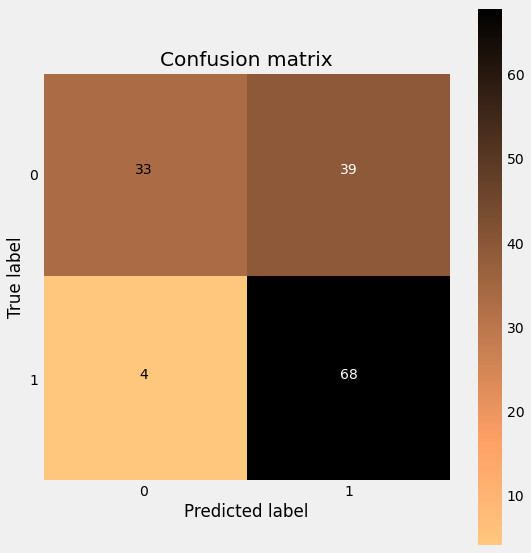

              precision    recall  f1-score   support

           0       0.89      0.46      0.61        72
           1       0.64      0.94      0.76        72

    accuracy                           0.70       144
   macro avg       0.76      0.70      0.68       144
weighted avg       0.76      0.70      0.68       144



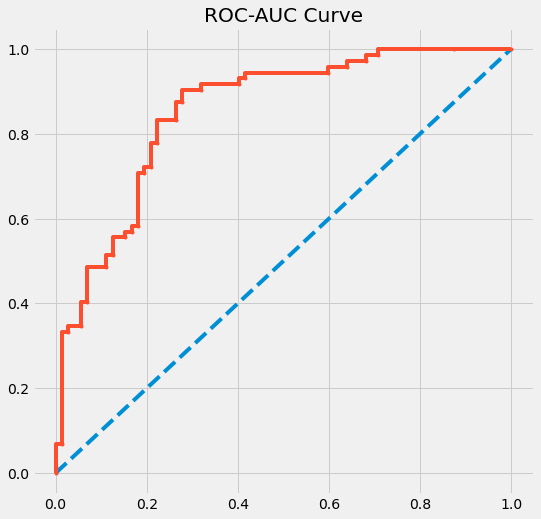

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_knn), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_knn), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_knn), axis=1)).round()))

## **Observations:**
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Our model already have the value least, hence can be considered. 

### **Next we'll train a few more models to see if we can beat this benchmark.**

## **Training a few models with their default parameters**
- We will **train 11 different models** with thier **default parameters** and observe how does each model performs with their default params. 
- Models with **best AUC scores** will be **considered further and hypertuned**.

In [ ]:
svc = SVC( kernel="linear", class_weight='balanced', probability=True )
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier( random_state=7)
abc = AdaBoostClassifier( random_state=7)
bc = BaggingClassifier(random_state=7)
etc = ExtraTreesClassifier(random_state=7)
gbdt = GradientBoostingClassifier(random_state=7)
xgb = XGBClassifier(random_state=7)
mlp = MLPClassifier(random_state=7,tol=1e-4)

clfs = {'SVC':svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'mlp': mlp
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    train_pred = clf.predict_proba(X_train)[:, 1]
    test_pred = clf.predict_proba(X_test)[:, 1]
    accuracy_train = clf.score(X_train,y_train )
    accuracy_test = clf.score(X_test,y_test)
    auc_train = metrics.roc_auc_score(y_train, train_pred)
    auc_test = metrics.roc_auc_score(y_test, test_pred)
    
    return accuracy_train,accuracy_test, auc_train, auc_test


accuracy_scores_tr = []
accuracy_scores_ts = []
auc_train_scores = []
auc_test_scores = []


X_train, X_test, y_train, y_test = train_test_split(data_proc.drop('Outcome', axis =1), data_proc['Outcome'], test_size= 0.2, 
                                                    random_state = 42)

for name,clf in clfs.items():
    
    current_accuracy_tr,current_accuracy_ts,auc_tr, auc_ts = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy Train - ",current_accuracy_tr)
    print("Accuracy Test - ",current_accuracy_ts)
    print("AUC Train - \n",auc_tr)
    print("AUC Test - \n",auc_ts)
    
    accuracy_scores_tr.append(current_accuracy_tr)
    accuracy_scores_ts.append(current_accuracy_ts)
    auc_train_scores.append(auc_tr)
    auc_test_scores.append(auc_ts)
    print()
    print("="*100)
    print()

For  SVC
Accuracy Train -  0.7799479166666666
Accuracy Test -  0.7864583333333334
AUC Train - 
 0.8559185750636134
AUC Test - 
 0.8666666666666667


For  KN
Accuracy Train -  0.84765625
Accuracy Test -  0.8229166666666666
AUC Train - 
 0.9419745547073792
AUC Test - 
 0.890968801313629


For  DT
Accuracy Train -  1.0
Accuracy Test -  0.8072916666666666
AUC Train - 
 1.0
AUC Test - 
 0.809031198686371


For  LR
Accuracy Train -  0.7734375
Accuracy Test -  0.7760416666666666
AUC Train - 
 0.8560610687022902
AUC Test - 
 0.8745484400656813


For  RF
Accuracy Train -  1.0
Accuracy Test -  0.8489583333333334
AUC Train - 
 1.0
AUC Test - 
 0.9240831964969897


For  AdaBoost
Accuracy Train -  0.8528645833333334
Accuracy Test -  0.8072916666666666
AUC Train - 
 0.9390907548770144
AUC Test - 
 0.8831964969896005


For  BgC
Accuracy Train -  0.9921875
Accuracy Test -  0.828125
AUC Train - 
 0.9991789652247668
AUC Test - 
 0.8908045977011494


For  ETC
Accuracy Train -  1.0
Accuracy Test -  0.8854

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Test':accuracy_scores_ts,
                               'AUC Test':auc_test_scores,}).sort_values(by = 'AUC Test', ascending= False).style.background_gradient(cmap = 'RdBu', subset = [ 'AUC Test', 'Accuracy Test'	])
performance_df

## **Observations:**
- Models are not generalized, reason could be less data (768 rows), hence we will try to use KFold which will help us to get more samples and train a better model with available data. 
- Selected Model: **ExtraTreeClassifier, RandomForest, XGBoost, MultiLayerPerceptron** 
- We will hypertune parameters for these parameters and Finally use **Voting Classifier** with 5 models namely: **KNN, ExtraTreeClassifier, RandomForest, XGBoost, MultiLayerPerceptron**

## **Hypertuning Random Forest using Optuna**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {'n_estimators' : trial.suggest_int('n_estimators', 10, 800)
    ,'max_depth' : trial.suggest_int('max_depth', 3, 300)
    , 'criterion' : trial.suggest_categorical('criterion',['gini', 'entropy'])
    , 'max_features' : trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2'])
    , 'oob_score' : trial.suggest_categorical('oob_score',[True, False])
    }
    model = RandomForestClassifier(**params)                                        # Initialization of RandomForestClassifier Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_rf = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_rf.optimize(objective, n_trials=100)                                        # Running our objective function for 15 trials.

[I 2022-03-06 01:53:27,604] A new study created in memory with name: no-name-b4176790-f412-4006-a240-e1a7953a3fe0


0 0.9042236763831053
1 0.9114724480578139
2 0.9291629027401385
3 0.9357874134296899


[I 2022-03-06 01:53:31,709] Trial 0 finished with value: 0.8998795543510991 and parameters: {'n_estimators': 272, 'max_depth': 226, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 0 with value: 0.8998795543510991.


4 0.8998795543510991
0 0.9007287328970851
1 0.9108702198133092
2 0.9345076784101174
3 0.9351099066546221


[I 2022-03-06 01:53:43,285] Trial 1 finished with value: 0.9022884673291177 and parameters: {'n_estimators': 787, 'max_depth': 114, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 1 with value: 0.9022884673291177.


4 0.9022884673291177
0 0.9027364663890541
1 0.9092893706714844
2 0.9290876242095754
3 0.9337548931044867


[I 2022-03-06 01:53:45,872] Trial 2 finished with value: 0.9003312255344775 and parameters: {'n_estimators': 204, 'max_depth': 219, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 1 with value: 0.9022884673291177.


4 0.9003312255344775
0 0.8925490779298036
1 0.9101927130382415
2 0.9325504366154772
3 0.9291629027401385


[I 2022-03-06 01:53:47,894] Trial 3 finished with value: 0.8949111713339356 and parameters: {'n_estimators': 187, 'max_depth': 263, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 1 with value: 0.9022884673291177.


4 0.8949111713339356
0 0.9024390243902439
1 0.9089882565492322
2 0.9308190304125263
3 0.924119241192412


[I 2022-03-06 01:53:49,268] Trial 4 finished with value: 0.8906955736224028 and parameters: {'n_estimators': 104, 'max_depth': 50, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 1 with value: 0.9022884673291177.


4 0.8906955736224028
0 0.8943337299226651
1 0.9077085215296596
2 0.9302168021680216
3 0.9288617886178862


[I 2022-03-06 01:53:59,865] Trial 5 finished with value: 0.8967178560674496 and parameters: {'n_estimators': 705, 'max_depth': 44, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 1 with value: 0.9022884673291177.


4 0.8967178560674496
0 0.8924747174301011
1 0.907106293285155
2 0.9317976513098465
3 0.9254742547425474


[I 2022-03-06 01:54:05,320] Trial 6 finished with value: 0.8950617283950617 and parameters: {'n_estimators': 448, 'max_depth': 9, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 1 with value: 0.9022884673291177.


4 0.8950617283950617
0 0.8984979179060083
1 0.9089882565492321
2 0.9378199337548931
3 0.9230653417645287


[I 2022-03-06 01:54:06,766] Trial 7 finished with value: 0.8992773261065944 and parameters: {'n_estimators': 118, 'max_depth': 242, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 1 with value: 0.9022884673291177.


4 0.8992773261065944
0 0.8988697204045211
1 0.9083860283047275
2 0.9352604637157482
3 0.9267539897621199


[I 2022-03-06 01:54:19,018] Trial 8 finished with value: 0.9032670882264379 and parameters: {'n_estimators': 735, 'max_depth': 99, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 8 with value: 0.9032670882264379.


4 0.9032670882264379
0 0.8961927424152291
1 0.9067299006323395
2 0.9312707015959049
3 0.9330021077988556


[I 2022-03-06 01:54:27,515] Trial 9 finished with value: 0.9012345679012346 and parameters: {'n_estimators': 688, 'max_depth': 217, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 8 with value: 0.9032670882264379.


4 0.9012345679012346
0 0.9020672218917312
1 0.9068804576934658
2 0.9330773863294188
3 0.929614573923517


[I 2022-03-06 01:54:35,537] Trial 10 finished with value: 0.9032670882264379 and parameters: {'n_estimators': 478, 'max_depth': 128, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 8 with value: 0.9032670882264379.


4 0.9032670882264379
0 0.9016210588935157
1 0.908837699488106
2 0.9302168021680216
3 0.9324751580849142


[I 2022-03-06 01:54:44,350] Trial 11 finished with value: 0.9041704305931949 and parameters: {'n_estimators': 530, 'max_depth': 131, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9041704305931949
0 0.8999851279000594
1 0.9102679915688046
2 0.9349593495934959
3 0.9279584462511292


[I 2022-03-06 01:54:53,328] Trial 12 finished with value: 0.9040198735320687 and parameters: {'n_estimators': 540, 'max_depth': 168, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9040198735320687
0 0.8987953599048186
1 0.9068051791629028
2 0.9311201445347786
3 0.9255495332731105


[I 2022-03-06 01:55:10,166] Trial 13 finished with value: 0.9031165311653117 and parameters: {'n_estimators': 598, 'max_depth': 162, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9031165311653117
0 0.8957465794170136
1 0.9080849141824752
2 0.9341312857573021
3 0.9267539897621199


[I 2022-03-06 01:55:27,316] Trial 14 finished with value: 0.9038693164709425 and parameters: {'n_estimators': 568, 'max_depth': 171, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9038693164709425
0 0.9003569303985722
1 0.9029659741041856
2 0.9321740439626618
3 0.9284101174345077


[I 2022-03-06 01:55:36,604] Trial 15 finished with value: 0.9013851249623607 and parameters: {'n_estimators': 333, 'max_depth': 171, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 11 with value: 0.9041704305931949.


4 0.9013851249623607
0 0.9023646638905413
1 0.9054501656127671
2 0.9311201445347788
3 0.929539295392954


[I 2022-03-06 01:55:48,845] Trial 16 finished with value: 0.9041704305931948 and parameters: {'n_estimators': 573, 'max_depth': 68, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9041704305931948
0 0.9003569303985722
1 0.9117735621800662
2 0.9285606744956337
3 0.9281842818428184


[I 2022-03-06 01:55:55,060] Trial 17 finished with value: 0.9002559470039144 and parameters: {'n_estimators': 369, 'max_depth': 72, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


4 0.9002559470039144
0 0.9018441403926235
1 0.9090635350797952
2 0.9327762722071665
3 0.9310448660042157


[I 2022-03-06 01:56:04,205] Trial 18 finished with value: 0.902514302920807 and parameters: {'n_estimators': 617, 'max_depth': 85, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 11 with value: 0.9041704305931949.


4 0.902514302920807
0 0.8450327186198692
1 0.8883619391749473
2 0.8950617283950618


[I 2022-03-06 01:56:04,465] Trial 19 finished with value: 0.8638964167419452 and parameters: {'n_estimators': 18, 'max_depth': 3, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 11 with value: 0.9041704305931949.


3 0.8774465522433003
4 0.8638964167419452
0 0.8999851279000595
1 0.9107196627521831
2 0.9324751580849142
3 0.9269045468232461


[I 2022-03-06 01:56:13,033] Trial 20 finished with value: 0.9072568503462812 and parameters: {'n_estimators': 512, 'max_depth': 131, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9072568503462812
0 0.9004312908982748
1 0.906202950918398
2 0.9318729298404095
3 0.9272809394760615


[I 2022-03-06 01:56:21,384] Trial 21 finished with value: 0.8996537187594098 and parameters: {'n_estimators': 497, 'max_depth': 139, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.8996537187594098
0 0.8967132659131469
1 0.9084613068352905
2 0.9348087925323698
3 0.9286359530261968


[I 2022-03-06 01:56:28,211] Trial 22 finished with value: 0.9054501656127673 and parameters: {'n_estimators': 408, 'max_depth': 52, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9054501656127673
0 0.8995389649018442
1 0.907934357121349
2 0.932324601023788
3 0.9298404095152063


[I 2022-03-06 01:56:38,784] Trial 23 finished with value: 0.8994278831677205 and parameters: {'n_estimators': 408, 'max_depth': 194, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.8994278831677205
0 0.8998364069006544
1 0.9080849141824752
2 0.9338301716350496
3 0.9238934056007226


[I 2022-03-06 01:56:49,692] Trial 24 finished with value: 0.9038693164709426 and parameters: {'n_estimators': 309, 'max_depth': 296, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9038693164709426
0 0.8990928019036288
1 0.9073321288768443
2 0.9326257151460404
3 0.9333785004516713


[I 2022-03-06 01:57:03,126] Trial 25 finished with value: 0.9030412526347485 and parameters: {'n_estimators': 428, 'max_depth': 32, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9030412526347485
0 0.8974568709101725
1 0.9077838000602227
2 0.932324601023788
3 0.9310448660042155


[I 2022-03-06 01:57:13,207] Trial 26 finished with value: 0.907106293285155 and parameters: {'n_estimators': 638, 'max_depth': 107, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.907106293285155
0 0.8989440809042237
1 0.9101927130382415
2 0.9333032219211082
3 0.9259259259259259


[I 2022-03-06 01:57:26,323] Trial 27 finished with value: 0.9021379102679916 and parameters: {'n_estimators': 647, 'max_depth': 98, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9021379102679916
0 0.9016954193932183
1 0.9089882565492322
2 0.9334537789822343
3 0.9342818428184283


[I 2022-03-06 01:57:39,164] Trial 28 finished with value: 0.9002559470039144 and parameters: {'n_estimators': 645, 'max_depth': 112, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9002559470039144
0 0.8994646044021415
1 0.9092140921409214
2 0.9366907557964468
3 0.934056007226739


[I 2022-03-06 01:57:47,223] Trial 29 finished with value: 0.9022131887985546 and parameters: {'n_estimators': 281, 'max_depth': 27, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9022131887985546
0 0.9009518143961927
1 0.9100421559771154
2 0.9356368563685636
3 0.9294640168623909


[I 2022-03-06 01:57:58,112] Trial 30 finished with value: 0.9010087323095454 and parameters: {'n_estimators': 493, 'max_depth': 57, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9010087323095454
0 0.9015466983938132
1 0.9097410418548629
2 0.9331526648599819
3 0.9293134598012647


[I 2022-03-06 01:58:12,588] Trial 31 finished with value: 0.907031014754592 and parameters: {'n_estimators': 517, 'max_depth': 129, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.907031014754592
0 0.9031826293872695
1 0.9059771153267089
2 0.9315718157181572
3 0.9293134598012647


[I 2022-03-06 01:58:19,384] Trial 32 finished with value: 0.8966425775368865 and parameters: {'n_estimators': 376, 'max_depth': 117, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.8966425775368865
0 0.9022159428911362
1 0.9091388136103583
2 0.9306684733514002
3 0.9254742547425474


[I 2022-03-06 01:58:27,630] Trial 33 finished with value: 0.9024390243902438 and parameters: {'n_estimators': 448, 'max_depth': 144, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9024390243902438
0 0.9011748958953004
1 0.9097410418548629
2 0.9308943089430894
3 0.9290876242095755


[I 2022-03-06 01:58:36,454] Trial 34 finished with value: 0.9070310147545919 and parameters: {'n_estimators': 528, 'max_depth': 89, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9070310147545919
0 0.9022903033908388
1 0.9099668774465522
2 0.9326257151460403
3 0.9297651309846431


[I 2022-03-06 01:58:50,293] Trial 35 finished with value: 0.901535682023487 and parameters: {'n_estimators': 776, 'max_depth': 92, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.901535682023487
0 0.8985722784057109
1 0.907031014754592
2 0.9332279433905449
3 0.9268292682926829


[I 2022-03-06 01:59:03,837] Trial 36 finished with value: 0.902514302920807 and parameters: {'n_estimators': 539, 'max_depth': 116, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.902514302920807
0 0.9030339083878643
1 0.9070310147545919
2 0.9318729298404095
3 0.9308943089430893


[I 2022-03-06 01:59:15,956] Trial 37 finished with value: 0.8978470340258958 and parameters: {'n_estimators': 648, 'max_depth': 192, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.8978470340258958
0 0.8989440809042237
1 0.9089882565492321
2 0.9344323998795543
3 0.9273562180066245


[I 2022-03-06 01:59:32,377] Trial 38 finished with value: 0.9000301114122252 and parameters: {'n_estimators': 598, 'max_depth': 145, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9000301114122252
0 0.8993158834027364
1 0.9078590785907859
2 0.9330773863294188
3 0.9287865100873232


[I 2022-03-06 01:59:49,452] Trial 39 finished with value: 0.9004817825956039 and parameters: {'n_estimators': 701, 'max_depth': 79, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9004817825956039
0 0.8950029744199881
1 0.9089129780186691
2 0.9299156880457694
3 0.9281842818428184


[I 2022-03-06 02:00:03,099] Trial 40 finished with value: 0.9019873532068654 and parameters: {'n_estimators': 472, 'max_depth': 109, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9019873532068654
0 0.8962671029149316
1 0.9072568503462812
2 0.9342065642878651
3 0.9269798253538091


[I 2022-03-06 02:00:08,613] Trial 41 finished with value: 0.9066546221017765 and parameters: {'n_estimators': 222, 'max_depth': 62, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9066546221017765
0 0.901249256395003
1 0.9043209876543209
2 0.9351851851851852
3 0.9266787112315568


[I 2022-03-06 02:00:11,877] Trial 42 finished with value: 0.9037187594098164 and parameters: {'n_estimators': 191, 'max_depth': 70, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9037187594098164
0 0.8982004759071981
1 0.9087624209575429
2 0.9321740439626618
3 0.9269798253538091


[I 2022-03-06 02:00:27,639] Trial 43 finished with value: 0.9060523938572719 and parameters: {'n_estimators': 513, 'max_depth': 100, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9060523938572719
0 0.893664485425342
1 0.9051490514905149
2 0.931421258657031
3 0.91967780788919


[I 2022-03-06 02:00:31,726] Trial 44 finished with value: 0.9072568503462812 and parameters: {'n_estimators': 142, 'max_depth': 156, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9072568503462812
0 0.8926977989292089
1 0.903417645287564
2 0.9322493224932249
3 0.9281090033122553


[I 2022-03-06 02:00:34,628] Trial 45 finished with value: 0.890846130683529 and parameters: {'n_estimators': 120, 'max_depth': 191, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.890846130683529
0 0.9049672813801309
1 0.9184733514001806
2 0.9334537789822343
3 0.9231406202950918


[I 2022-03-06 02:00:36,092] Trial 46 finished with value: 0.8955133995784402 and parameters: {'n_estimators': 53, 'max_depth': 127, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.8955133995784402
0 0.8981261154074957
1 0.9076332429990965
2 0.9315718157181572
3 0.9260012044564889


[I 2022-03-06 02:00:45,582] Trial 47 finished with value: 0.9041704305931948 and parameters: {'n_estimators': 570, 'max_depth': 156, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 20 with value: 0.9072568503462812.


4 0.9041704305931948
0 0.9011748958953004
1 0.9092140921409214
2 0.9335290575127972
3 0.9308943089430894


[I 2022-03-06 02:00:58,090] Trial 48 finished with value: 0.9037187594098163 and parameters: {'n_estimators': 751, 'max_depth': 125, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9037187594098163
0 0.896861986912552
1 0.905299608551641
2 0.9371424269798254
3 0.9270551038843722


[I 2022-03-06 02:01:09,347] Trial 49 finished with value: 0.9020626317374285 and parameters: {'n_estimators': 680, 'max_depth': 179, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.9020626317374285
0 0.8999851279000595
1 0.9058265582655827
2 0.9302920806985847
3 0.9245709123757905


[I 2022-03-06 02:01:15,492] Trial 50 finished with value: 0.8967178560674496 and parameters: {'n_estimators': 453, 'max_depth': 212, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 20 with value: 0.9072568503462812.


4 0.8967178560674496
0 0.8961183819155264
1 0.903342366757001
2 0.9306684733514002
3 0.9310448660042155


[I 2022-03-06 02:01:19,450] Trial 51 finished with value: 0.9119241192411924 and parameters: {'n_estimators': 235, 'max_depth': 137, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9119241192411924
0 0.8952260559190959
1 0.9100421559771154
2 0.9359379704908161
3 0.9293887383318277


[I 2022-03-06 02:01:22,035] Trial 52 finished with value: 0.9002559470039144 and parameters: {'n_estimators': 151, 'max_depth': 136, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9002559470039144
0 0.898720999405116
1 0.9095152062631737
2 0.9327762722071665
3 0.9234417344173442


[I 2022-03-06 02:01:25,693] Trial 53 finished with value: 0.9057512797350196 and parameters: {'n_estimators': 216, 'max_depth': 152, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9057512797350196
0 0.8941106484235574
1 0.9059018367961457
2 0.9287112315567599
3 0.935937970490816


[I 2022-03-06 02:01:26,965] Trial 54 finished with value: 0.905374887082204 and parameters: {'n_estimators': 71, 'max_depth': 105, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.905374887082204
0 0.9009518143961928
1 0.907031014754592
2 0.9300662451068954
3 0.9342065642878651


[I 2022-03-06 02:01:31,252] Trial 55 finished with value: 0.9065040650406504 and parameters: {'n_estimators': 252, 'max_depth': 85, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9065040650406504
0 0.8985722784057109
1 0.9175700090334236
2 0.9311954230653416
3 0.9273562180066245


[I 2022-03-06 02:01:33,826] Trial 56 finished with value: 0.9010840108401085 and parameters: {'n_estimators': 149, 'max_depth': 158, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9010840108401085
0 0.8979030339083879
1 0.912451068955134
2 0.9313459801264679
3 0.9301415236374586


[I 2022-03-06 02:01:43,373] Trial 57 finished with value: 0.9054501656127673 and parameters: {'n_estimators': 369, 'max_depth': 124, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9054501656127673
0 0.9040005948839976
1 0.9087624209575429
2 0.931421258657031
3 0.9281090033122553


[I 2022-03-06 02:01:59,846] Trial 58 finished with value: 0.9031165311653117 and parameters: {'n_estimators': 532, 'max_depth': 138, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9031165311653117
0 0.9043723973825103
1 0.9089882565492321
2 0.9321740439626618
3 0.929614573923517


[I 2022-03-06 02:02:15,324] Trial 59 finished with value: 0.9025895814513701 and parameters: {'n_estimators': 560, 'max_depth': 182, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9025895814513701
0 0.9025877453896489
1 0.9104185486299308
2 0.9341312857573021
3 0.9345076784101174


[I 2022-03-06 02:02:33,697] Trial 60 finished with value: 0.9018367961457392 and parameters: {'n_estimators': 605, 'max_depth': 160, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9018367961457392
0 0.8993158834027365
1 0.9067299006323396
2 0.9298404095152062
3 0.9251731406202951


[I 2022-03-06 02:02:42,880] Trial 61 finished with value: 0.9062782294489612 and parameters: {'n_estimators': 249, 'max_depth': 59, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9062782294489612
0 0.891656751933373
1 0.9022884673291177
2 0.9321740439626618
3 0.9288617886178863


[I 2022-03-06 02:02:50,179] Trial 62 finished with value: 0.8995784402288468 and parameters: {'n_estimators': 150, 'max_depth': 91, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.8995784402288468
0 0.895523497917906
1 0.9080849141824752
2 0.9334537789822344
3 0.9250978620897321


[I 2022-03-06 02:02:57,289] Trial 63 finished with value: 0.9025143029208069 and parameters: {'n_estimators': 222, 'max_depth': 34, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9025143029208069
0 0.9033313503866747
1 0.9062782294489612
2 0.9317976513098464
3 0.9266787112315568


[I 2022-03-06 02:03:05,732] Trial 64 finished with value: 0.8999548328816622 and parameters: {'n_estimators': 291, 'max_depth': 81, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.8999548328816622
0 0.895374776918501
1 0.9074826859379705
2 0.9275067750677508
3 0.9271303824149353


[I 2022-03-06 02:03:07,942] Trial 65 finished with value: 0.8953628425173141 and parameters: {'n_estimators': 87, 'max_depth': 119, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.8953628425173141
0 0.8999107674003569
1 0.9059771153267088
2 0.935034628124059
3 0.9272809394760614


[I 2022-03-06 02:03:16,142] Trial 66 finished with value: 0.9091388136103584 and parameters: {'n_estimators': 320, 'max_depth': 149, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9091388136103584
0 0.8974568709101725
1 0.908837699488106
2 0.9351851851851851
3 0.9264528756398676


[I 2022-03-06 02:03:26,615] Trial 67 finished with value: 0.9000301114122252 and parameters: {'n_estimators': 384, 'max_depth': 171, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9000301114122252
0 0.8989440809042237
1 0.9047726588376994
2 0.9322493224932249
3 0.9252484191508581


[I 2022-03-06 02:03:35,660] Trial 68 finished with value: 0.9074074074074074 and parameters: {'n_estimators': 331, 'max_depth': 135, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9074074074074074
0 0.9005056513979773
1 0.9077838000602227
2 0.9369918699186991
3 0.9307437518819633


[I 2022-03-06 02:03:42,386] Trial 69 finished with value: 0.900707618187293 and parameters: {'n_estimators': 301, 'max_depth': 145, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.900707618187293
0 0.8958953004164187
1 0.9040198735320686
2 0.9296145739235171
3 0.9253236976814212


[I 2022-03-06 02:03:49,513] Trial 70 finished with value: 0.8975459199036434 and parameters: {'n_estimators': 347, 'max_depth': 133, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.8975459199036434
0 0.9028108268887567
1 0.9080849141824752
2 0.9317976513098464
3 0.9312707015959049


[I 2022-03-06 02:03:58,413] Trial 71 finished with value: 0.9036434808792533 and parameters: {'n_estimators': 341, 'max_depth': 144, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9036434808792533
0 0.8973825104104699
1 0.9086871424269799
2 0.9348840710629329
3 0.9274314965371876


[I 2022-03-06 02:04:05,699] Trial 72 finished with value: 0.9031165311653117 and parameters: {'n_estimators': 322, 'max_depth': 166, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9031165311653117
0 0.8921029149315883
1 0.9104938271604938
2 0.9309695874736524
3 0.930593194820837


[I 2022-03-06 02:04:11,484] Trial 73 finished with value: 0.9001806684733514 and parameters: {'n_estimators': 248, 'max_depth': 108, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9001806684733514
0 0.8952260559190958
1 0.9092140921409214
2 0.9330021077988557
3 0.9284101174345077


[I 2022-03-06 02:04:26,505] Trial 74 finished with value: 0.9001806684733514 and parameters: {'n_estimators': 422, 'max_depth': 151, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9001806684733514
0 0.9003569303985721
1 0.9121499548328816
2 0.9352604637157483
3 0.9298404095152063


[I 2022-03-06 02:04:37,997] Trial 75 finished with value: 0.9031918096958748 and parameters: {'n_estimators': 463, 'max_depth': 131, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9031918096958748
0 0.8989440809042237
1 0.9077838000602227
2 0.9315718157181572
3 0.9323998795543511


[I 2022-03-06 02:04:48,601] Trial 76 finished with value: 0.9068051791629028 and parameters: {'n_estimators': 630, 'max_depth': 95, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9068051791629028
0 0.9031826293872695
1 0.9101927130382416
2 0.9339807286961759
3 0.9290123456790124


[I 2022-03-06 02:04:56,034] Trial 77 finished with value: 0.9005570611261668 and parameters: {'n_estimators': 509, 'max_depth': 119, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9005570611261668
0 0.9008774538964902
1 0.9109454983438723
2 0.9351851851851851
3 0.9186991869918699


[I 2022-03-06 02:04:58,825] Trial 78 finished with value: 0.905224330021078 and parameters: {'n_estimators': 184, 'max_depth': 180, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.905224330021078
0 0.8967876264128495
1 0.9100421559771152
2 0.9361638060825053
3 0.9291629027401385


[I 2022-03-06 02:05:05,413] Trial 79 finished with value: 0.9023637458596808 and parameters: {'n_estimators': 394, 'max_depth': 103, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9023637458596808
0 0.8940362879238548
1 0.9049984944293887
2 0.9296898524540801
3 0.9183227943390545


[I 2022-03-06 02:05:11,212] Trial 80 finished with value: 0.8997289972899729 and parameters: {'n_estimators': 430, 'max_depth': 114, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.8997289972899729
0 0.9008030933967877
1 0.9072568503462812
2 0.9314965371875941
3 0.9303673592291479


[I 2022-03-06 02:05:21,716] Trial 81 finished with value: 0.9023637458596808 and parameters: {'n_estimators': 633, 'max_depth': 94, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9023637458596808
0 0.9008030933967877
1 0.9080849141824751
2 0.9311954230653418
3 0.9293887383318278


[I 2022-03-06 02:05:32,968] Trial 82 finished with value: 0.9040198735320686 and parameters: {'n_estimators': 679, 'max_depth': 123, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9040198735320686
0 0.8957465794170137
1 0.905299608551641
2 0.9363143631436315
3 0.9324751580849142


[I 2022-03-06 02:05:37,527] Trial 83 finished with value: 0.8979975910870219 and parameters: {'n_estimators': 269, 'max_depth': 148, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.8979975910870219
0 0.9027364663890541
1 0.9044715447154471
2 0.9324751580849142
3 0.9281090033122553


[I 2022-03-06 02:05:47,450] Trial 84 finished with value: 0.900782896717856 and parameters: {'n_estimators': 590, 'max_depth': 75, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.900782896717856
0 0.899390243902439
1 0.9092140921409214
2 0.9333785004516711
3 0.9267539897621199


[I 2022-03-06 02:05:56,585] Trial 85 finished with value: 0.9050737729599518 and parameters: {'n_estimators': 548, 'max_depth': 137, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9050737729599518
0 0.8984979179060083
1 0.9086871424269798
2 0.9343571213489912
3 0.9269798253538092


[I 2022-03-06 02:06:16,603] Trial 86 finished with value: 0.9048479373682625 and parameters: {'n_estimators': 729, 'max_depth': 110, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.9048479373682625
0 0.9025877453896489
1 0.9095904847937368
2 0.9311954230653418
3 0.9347335140018067


[I 2022-03-06 02:06:24,388] Trial 87 finished with value: 0.8967931345980127 and parameters: {'n_estimators': 481, 'max_depth': 96, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 51 with value: 0.9119241192411924.


4 0.8967931345980127
0 0.9027364663890541
1 0.9058265582655827
2 0.9354110207768743
3 0.9247967479674796


[I 2022-03-06 02:06:40,071] Trial 88 finished with value: 0.9077085215296598 and parameters: {'n_estimators': 667, 'max_depth': 249, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9077085215296598
0 0.901249256395003
1 0.907106293285155
2 0.9305179162902739
3 0.9271303824149353


[I 2022-03-06 02:07:00,138] Trial 89 finished with value: 0.9080849141824752 and parameters: {'n_estimators': 516, 'max_depth': 288, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9080849141824752
0 0.9048929208804283
1 0.9114724480578139
2 0.9339807286961759
3 0.936841312857573


[I 2022-03-06 02:07:08,268] Trial 90 finished with value: 0.8964167419451973 and parameters: {'n_estimators': 358, 'max_depth': 268, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.8964167419451973
0 0.8976055919095777
1 0.9066546221017765
2 0.9299156880457693
3 0.9301415236374586


[I 2022-03-06 02:07:24,291] Trial 91 finished with value: 0.9080096356519122 and parameters: {'n_estimators': 664, 'max_depth': 283, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9080096356519122
0 0.8974568709101725
1 0.9056760012044566
2 0.9325504366154773
3 0.9272809394760614


[I 2022-03-06 02:07:35,878] Trial 92 finished with value: 0.9052996085516412 and parameters: {'n_estimators': 718, 'max_depth': 300, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9052996085516412
0 0.8981261154074955
1 0.9059018367961457
2 0.931421258657031
3 0.9299156880457693


[I 2022-03-06 02:07:45,612] Trial 93 finished with value: 0.8992773261065944 and parameters: {'n_estimators': 661, 'max_depth': 290, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.8992773261065944
0 0.9040005948839976
1 0.9084613068352906
2 0.9311201445347788
3 0.9283348389039445


[I 2022-03-06 02:07:50,458] Trial 94 finished with value: 0.9004817825956039 and parameters: {'n_estimators': 325, 'max_depth': 248, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9004817825956039
0 0.8986466389054134
1 0.9080849141824752
2 0.9336043360433605
3 0.930593194820837


[I 2022-03-06 02:08:06,020] Trial 95 finished with value: 0.9039445950015056 and parameters: {'n_estimators': 699, 'max_depth': 279, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9039445950015056
0 0.899390243902439
1 0.9087624209575428
2 0.9324751580849141
3 0.9277326106594399


[I 2022-03-06 02:08:19,426] Trial 96 finished with value: 0.898072869617585 and parameters: {'n_estimators': 580, 'max_depth': 244, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.898072869617585
0 0.9013979773944081
1 0.9056760012044565
2 0.9345829569406805
3 0.9283348389039446


[I 2022-03-06 02:08:44,554] Trial 97 finished with value: 0.9057512797350196 and parameters: {'n_estimators': 797, 'max_depth': 259, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9057512797350196
0 0.8981261154074955
1 0.9064287865100873
2 0.9305931948208372
3 0.9256248118036736


[I 2022-03-06 02:08:59,549] Trial 98 finished with value: 0.9004065040650407 and parameters: {'n_estimators': 617, 'max_depth': 227, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9004065040650407
0 0.9002825698988697
1 0.9086871424269798
2 0.9296898524540801
3 0.9275820535983137


[I 2022-03-06 02:09:19,130] Trial 99 finished with value: 0.9019120746763022 and parameters: {'n_estimators': 756, 'max_depth': 286, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 51 with value: 0.9119241192411924.


4 0.9019120746763022


In [ ]:
trial_rf = study_rf.best_trial
print(f'roc_auc_score: {trial_rf.value}')
print(f"Best hyperparameters: {trial_rf.params}")

roc_auc_score: 0.9119241192411924
Best hyperparameters: {'n_estimators': 235, 'max_depth': 137, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}


In [ ]:
optuna.visualization.plot_optimization_history(study_rf)

In [ ]:
optuna.visualization.plot_slice(study_rf)

## **Training RandomForest with tuned hyper-parameters**

In [ ]:
final_test_predictions_rf = [] #to store final test predictions
final_valid_predictions_rf = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_rf.params 
    params = {'n_estimators': 235, 'max_depth': 137, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}
    model_rf = RandomForestClassifier(**params)                      # instantiate RandomForestClassifier Class
    model_rf.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_rf.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_rf.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_rf.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_rf.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.902215942891136
Fold 0 AUC_test:  0.8576388888888888
Fold 1 AUC_valid:  0.9042457091237579
Fold 1 AUC_test:  0.8566743827160495
Fold 2 AUC_valid:  0.9333785004516711
Fold 2 AUC_test:  0.8690200617283951
Fold 3 AUC_valid:  0.9247967479674797
Fold 3 AUC_test:  0.8558063271604939
Fold 4 AUC_valid:  0.9044715447154471
Fold 4 AUC_test:  0.8734567901234568
0.9138216890298985 0.012780756824002508


## **Evaluation of RandomForest Model**

Confusion matrix, without normalization
[[52 20]
 [ 7 65]]


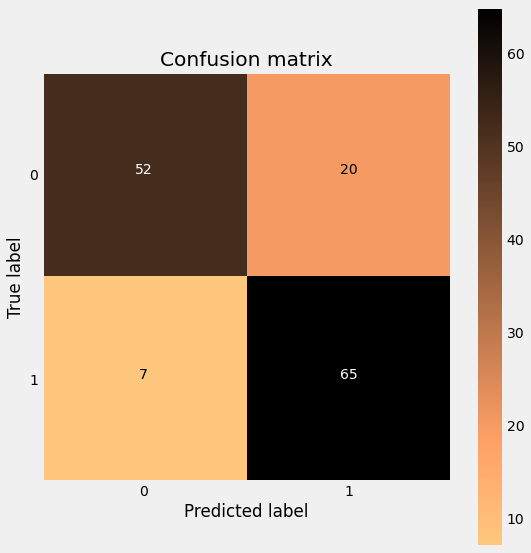

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        72
           1       0.76      0.90      0.83        72

    accuracy                           0.81       144
   macro avg       0.82      0.81      0.81       144
weighted avg       0.82      0.81      0.81       144



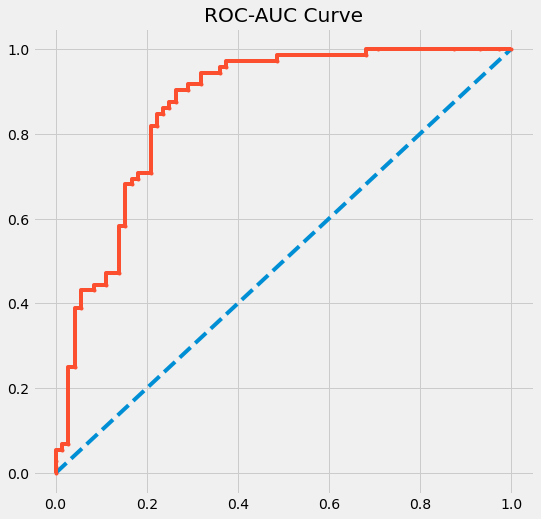

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_rf), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_rf), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_rf), axis=1)).round()))

## **Observations:**
- Even though **RandomForest has more AUC than KNN**. But **KNN had lesser False Positives**.
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- RandomForest model have more FP than KNN but overall performance of this model is much better i.e. better accuracy, f1-score and lesser False Negatives when compared to KNN, its kind of a trade-off which i believe RF has better performance probability when compared to KNN.   

## **Hypertune ExtraTreeClassifier using Optuna**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {'n_estimators' : trial.suggest_int('n_estimators', 10, 800)
    ,'max_depth' : trial.suggest_int('max_depth', 3, 300)
    , 'criterion' : trial.suggest_categorical('criterion',['gini', 'entropy'])
    , 'max_features' : trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2'])
    , 'oob_score' : trial.suggest_categorical('oob_score',[True, False])
    }
    model = ExtraTreesClassifier(**params, bootstrap = True)                      # Initialization of ExtraTreesClassifier Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_etc = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_etc.optimize(objective, n_trials=100)                                        # Running our objective function for 15 trials.

[I 2022-03-06 02:16:36,727] A new study created in memory with name: no-name-1bd21c13-00bc-4b24-9951-d0871ae8c716


0 0.8984979179060084
1 0.9199036434808792
2 0.9481330924420355
3 0.9397018970189702


[I 2022-03-06 02:16:43,141] Trial 0 finished with value: 0.9149352604637156 and parameters: {'n_estimators': 690, 'max_depth': 104, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 0 with value: 0.9149352604637156.


4 0.9149352604637156
0 0.9003569303985723
1 0.9199789220114423
2 0.9467028003613369
3 0.9366907557964468


[I 2022-03-06 02:16:45,723] Trial 1 finished with value: 0.9137308039747064 and parameters: {'n_estimators': 283, 'max_depth': 221, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 0 with value: 0.9149352604637156.


4 0.9137308039747064
0 0.8969363474122546
1 0.922387834989461
2 0.9483589280337247
3 0.9304426377597108


[I 2022-03-06 02:16:50,217] Trial 2 finished with value: 0.9172688949111714 and parameters: {'n_estimators': 511, 'max_depth': 22, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 2 with value: 0.9172688949111714.


4 0.9172688949111714
0 0.8999851279000596
1 0.9180969587473652
2 0.944068051791629
3 0.9357121348991267


[I 2022-03-06 02:16:54,001] Trial 3 finished with value: 0.911472448057814 and parameters: {'n_estimators': 404, 'max_depth': 264, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 2 with value: 0.9172688949111714.


4 0.911472448057814
0 0.8931439619274242
1 0.9156127672387835
2 0.9376693766937669


[I 2022-03-06 02:16:54,952] Trial 4 finished with value: 0.9202047576031316 and parameters: {'n_estimators': 98, 'max_depth': 40, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


3 0.9354862993074375
4 0.9202047576031316
0 0.9008774538964903
1 0.9198283649503162
2 0.950316169828365
3 0.9390243902439025


[I 2022-03-06 02:17:01,579] Trial 5 finished with value: 0.9176452875639867 and parameters: {'n_estimators': 718, 'max_depth': 157, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9176452875639867
0 0.9010261748958953
1 0.9196778078891901
2 0.9486600421559771
3 0.9361638060825054


[I 2022-03-06 02:17:11,757] Trial 6 finished with value: 0.9126769045468234 and parameters: {'n_estimators': 641, 'max_depth': 108, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9126769045468234
0 0.8985722784057109
1 0.9158386028304727
2 0.9485094850948509
3 0.93676603432701


[I 2022-03-06 02:17:15,800] Trial 7 finished with value: 0.9129780186690756 and parameters: {'n_estimators': 452, 'max_depth': 295, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9129780186690756
0 0.8964901844140394
1 0.9159138813610358
2 0.9447455585666967
3 0.9382716049382717


[I 2022-03-06 02:17:20,503] Trial 8 finished with value: 0.9124510689551341 and parameters: {'n_estimators': 269, 'max_depth': 177, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9124510689551341
0 0.8983491969066033
1 0.9219361638060825
2 0.9497892201144233
3 0.9371424269798253


[I 2022-03-06 02:17:30,135] Trial 9 finished with value: 0.914257753688648 and parameters: {'n_estimators': 630, 'max_depth': 201, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.914257753688648
0 0.8572278405710887
1 0.8879855465221318
2 0.8979223125564588


[I 2022-03-06 02:17:30,835] Trial 10 finished with value: 0.869165913881361 and parameters: {'n_estimators': 36, 'max_depth': 5, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


3 0.8757904245709125
4 0.869165913881361
0 0.8912105889351577
1 0.91967780788919
2 0.9470039144835892
3 0.9229900632339657


[I 2022-03-06 02:17:31,670] Trial 11 finished with value: 0.9162902740138512 and parameters: {'n_estimators': 49, 'max_depth': 113, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9162902740138512
0 0.9029595478881617
1 0.9183227943390545
2 0.9421860885275519
3 0.9366154772658838


[I 2022-03-06 02:17:34,834] Trial 12 finished with value: 0.9124510689551341 and parameters: {'n_estimators': 197, 'max_depth': 59, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9124510689551341
0 0.9037031528851873
1 0.9221619993977718
2 0.9487353206865401
3 0.9345076784101175


[I 2022-03-06 02:17:51,508] Trial 13 finished with value: 0.9175700090334236 and parameters: {'n_estimators': 771, 'max_depth': 150, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9175700090334236
0 0.8937388459250446
1 0.9154622101776573
2 0.9436163806082505
3 0.9410569105691057


[I 2022-03-06 02:17:53,922] Trial 14 finished with value: 0.9095904847937367 and parameters: {'n_estimators': 134, 'max_depth': 63, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9095904847937367
0 0.8998364069006544
1 0.9193766937669378
2 0.9450466726889492
3 0.9316470942487202


[I 2022-03-06 02:18:01,282] Trial 15 finished with value: 0.9196778078891901 and parameters: {'n_estimators': 350, 'max_depth': 141, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9196778078891901
0 0.8929208804283165
1 0.9126769045468232
2 0.9437669376693767
3 0.9311954230653418


[I 2022-03-06 02:18:10,085] Trial 16 finished with value: 0.9110960554049985 and parameters: {'n_estimators': 308, 'max_depth': 61, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9110960554049985
0 0.8996133254015467
1 0.9234417344173441
2 0.9440680517916289
3 0.9317976513098465


[I 2022-03-06 02:18:13,318] Trial 17 finished with value: 0.9153869316470943 and parameters: {'n_estimators': 169, 'max_depth': 229, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9153869316470943
0 0.9007287328970851
1 0.9206564287865101
2 0.9473803071364046
3 0.9360132490213791


[I 2022-03-06 02:18:20,727] Trial 18 finished with value: 0.9145588678109003 and parameters: {'n_estimators': 385, 'max_depth': 35, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9145588678109003
0 0.9007287328970851
1 0.918849744052996
2 0.9477566997892202
3 0.9336796145739236


[I 2022-03-06 02:18:29,397] Trial 19 finished with value: 0.9151610960554049 and parameters: {'n_estimators': 524, 'max_depth': 136, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9151610960554049
0 0.895523497917906
1 0.9204305931948209
2 0.9427883167720565
3 0.9349593495934959


[I 2022-03-06 02:18:31,431] Trial 20 finished with value: 0.9141071966275218 and parameters: {'n_estimators': 96, 'max_depth': 83, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 4 with value: 0.9202047576031316.


4 0.9141071966275218
0 0.8982748364069006
1 0.9165913881361035
2 0.9504667268894911
3 0.9356368563685638


[I 2022-03-06 02:18:39,602] Trial 21 finished with value: 0.9111713339355616 and parameters: {'n_estimators': 524, 'max_depth': 178, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9111713339355616
0 0.9048929208804283
1 0.9214844926227039
2 0.9491117133393556
3 0.9376693766937669


[I 2022-03-06 02:18:55,310] Trial 22 finished with value: 0.9168925022583558 and parameters: {'n_estimators': 750, 'max_depth': 174, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 4 with value: 0.9202047576031316.


4 0.9168925022583558
0 0.905264723378941
1 0.9182475158084913
2 0.9433152664859982
3 0.9390243902439025


[I 2022-03-06 02:18:59,422] Trial 23 finished with value: 0.9232911773562181 and parameters: {'n_estimators': 223, 'max_depth': 138, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9232911773562181
0 0.8961183819155265
1 0.9212586570310146
2 0.947681421258657
3 0.9345076784101175


[I 2022-03-06 02:19:03,066] Trial 24 finished with value: 0.9177958446251129 and parameters: {'n_estimators': 209, 'max_depth': 130, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9177958446251129
0 0.898720999405116
1 0.9175700090334237
2 0.9488105992171032
3 0.9345829569406805


[I 2022-03-06 02:19:09,453] Trial 25 finished with value: 0.9162902740138513 and parameters: {'n_estimators': 354, 'max_depth': 87, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9162902740138513
0 0.9000594883997619
1 0.9240439626618489
2 0.9479825353809094
3 0.9387985546522132


[I 2022-03-06 02:19:13,753] Trial 26 finished with value: 0.9201294790725685 and parameters: {'n_estimators': 230, 'max_depth': 203, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9201294790725685
0 0.9006543723973826
1 0.9173441734417344
2 0.9461758506473953
3 0.930517916290274


[I 2022-03-06 02:19:17,969] Trial 27 finished with value: 0.9162902740138513 and parameters: {'n_estimators': 230, 'max_depth': 248, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9162902740138513
0 0.8999107674003569
1 0.9145588678109003
2 0.945874736525143
3 0.9264528756398676


[I 2022-03-06 02:19:20,127] Trial 28 finished with value: 0.9141824751580849 and parameters: {'n_estimators': 104, 'max_depth': 203, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9141824751580849
0 0.8996876859012493
1 0.9189250225835591
2 0.9488105992171032
3 0.9292381812707016


[I 2022-03-06 02:19:23,409] Trial 29 finished with value: 0.922387834989461 and parameters: {'n_estimators': 161, 'max_depth': 272, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.922387834989461
0 0.8998364069006544
1 0.9170430593194822
2 0.9415838602830473
3 0.9336796145739236


[I 2022-03-06 02:19:26,089] Trial 30 finished with value: 0.9146341463414634 and parameters: {'n_estimators': 144, 'max_depth': 264, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 23 with value: 0.9232911773562181.


4 0.9146341463414634
0 0.8990184414039263
1 0.9189250225835592
2 0.9426377597109304
3 0.9270551038843722


[I 2022-03-06 02:19:27,639] Trial 31 finished with value: 0.9253989762119844 and parameters: {'n_estimators': 79, 'max_depth': 300, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9253989762119844
0 0.8842207019631172
1 0.9005570611261667


[I 2022-03-06 02:19:28,010] Trial 32 finished with value: 0.9075579644685335 and parameters: {'n_estimators': 13, 'max_depth': 279, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


2 0.9291629027401385
3 0.8757151460403494
4 0.9075579644685335
0 0.8984979179060084
1 0.9129027401385126
2 0.9487353206865401
3 0.9337548931044866


[I 2022-03-06 02:19:29,452] Trial 33 finished with value: 0.9089882565492321 and parameters: {'n_estimators': 71, 'max_depth': 298, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9089882565492321
0 0.8912849494348601
1 0.9090635350797952
2 0.9464016862390846
3 0.9311954230653418


[I 2022-03-06 02:19:32,556] Trial 34 finished with value: 0.9059018367961458 and parameters: {'n_estimators': 116, 'max_depth': 246, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9059018367961458
0 0.9031082688875669
1 0.9138813610358325
2 0.9490364348087926
3 0.9325504366154772


[I 2022-03-06 02:19:35,826] Trial 35 finished with value: 0.9226136705811502 and parameters: {'n_estimators': 171, 'max_depth': 277, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9226136705811502
0 0.9045211183819156
1 0.9182475158084914
2 0.9470039144835893
3 0.9347335140018067


[I 2022-03-06 02:19:41,244] Trial 36 finished with value: 0.9153869316470942 and parameters: {'n_estimators': 290, 'max_depth': 271, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9153869316470942
0 0.9006543723973826
1 0.9231406202950919
2 0.9473050286058416
3 0.9276573321288768


[I 2022-03-06 02:19:44,372] Trial 37 finished with value: 0.9204305931948209 and parameters: {'n_estimators': 181, 'max_depth': 284, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9204305931948209
0 0.8909131469363474
1 0.9202800361336946
2 0.9518970189701896
3 0.9375940981632038


[I 2022-03-06 02:19:47,109] Trial 38 finished with value: 0.9193014152363745 and parameters: {'n_estimators': 252, 'max_depth': 254, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9193014152363745
0 0.9030339083878643
1 0.9189250225835592
2 0.9424119241192412
3 0.9357874134296899


[I 2022-03-06 02:19:48,735] Trial 39 finished with value: 0.9056760012044566 and parameters: {'n_estimators': 144, 'max_depth': 230, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9056760012044566
0 0.8972337894110648
1 0.912526347485697
2 0.9444444444444444


[I 2022-03-06 02:19:49,558] Trial 40 finished with value: 0.9094399277326106 and parameters: {'n_estimators': 71, 'max_depth': 287, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9344323998795544
4 0.9094399277326106
0 0.9042980368828079
1 0.9156880457693466
2 0.9466275218307738
3 0.9343571213489913


[I 2022-03-06 02:19:51,531] Trial 41 finished with value: 0.9139566395663956 and parameters: {'n_estimators': 182, 'max_depth': 300, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9139566395663956
0 0.9016210588935158
1 0.9177205660945498
2 0.9442938873833183
3 0.9388738331827763


[I 2022-03-06 02:19:53,330] Trial 42 finished with value: 0.9144835892803372 and parameters: {'n_estimators': 165, 'max_depth': 281, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9144835892803372
0 0.9025133848899465
1 0.9244203553146642
2 0.9467780788919
3 0.9352604637157482


[I 2022-03-06 02:19:56,671] Trial 43 finished with value: 0.9195272508280639 and parameters: {'n_estimators': 310, 'max_depth': 263, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9195272508280639
0 0.8999107674003569
1 0.918849744052996
2 0.948584763625414
3 0.9390243902439025


[I 2022-03-06 02:19:59,275] Trial 44 finished with value: 0.9160644384221621 and parameters: {'n_estimators': 241, 'max_depth': 281, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9160644384221621
0 0.9008030933967875
1 0.9211080999698885
2 0.9470791930141523
3 0.9354110207768744


[I 2022-03-06 02:20:01,464] Trial 45 finished with value: 0.9184733514001807 and parameters: {'n_estimators': 200, 'max_depth': 218, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9184733514001807
0 0.9027364663890542
1 0.9149352604637158
2 0.9497892201144233


[I 2022-03-06 02:20:02,333] Trial 46 finished with value: 0.9100421559771154 and parameters: {'n_estimators': 77, 'max_depth': 236, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9272809394760615
4 0.9100421559771154
0 0.902067221891731
1 0.9208822643781994
2 0.9467028003613369
3 0.9351851851851851


[I 2022-03-06 02:20:07,140] Trial 47 finished with value: 0.9164408310749774 and parameters: {'n_estimators': 454, 'max_depth': 268, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9164408310749774
0 0.8886823319452707
1 0.9101927130382415


[I 2022-03-06 02:20:07,484] Trial 48 finished with value: 0.9065040650406504 and parameters: {'n_estimators': 27, 'max_depth': 117, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


2 0.9294640168623908
3 0.9173441734417345
4 0.9065040650406504
0 0.9004312908982748
1 0.913354411321891
2 0.9479072568503463
3 0.932324601023788


[I 2022-03-06 02:20:10,423] Trial 49 finished with value: 0.9132791327913279 and parameters: {'n_estimators': 270, 'max_depth': 288, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9132791327913279
0 0.899390243902439
1 0.9158386028304728
2 0.9464769647696476
3 0.9297651309846432


[I 2022-03-06 02:20:11,791] Trial 50 finished with value: 0.9175700090334237 and parameters: {'n_estimators': 123, 'max_depth': 168, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9175700090334237
0 0.887641284949435
1 0.9156127672387835
2 0.9280337247816922


[I 2022-03-06 02:20:12,393] Trial 51 finished with value: 0.8996537187594098 and parameters: {'n_estimators': 58, 'max_depth': 30, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


3 0.9308943089430894
4 0.8996537187594098
0 0.9001338488994647
1 0.9197530864197531
2 0.9464016862390846
3 0.935862691960253


[I 2022-03-06 02:20:14,734] Trial 52 finished with value: 0.9108702198133093 and parameters: {'n_estimators': 161, 'max_depth': 255, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9108702198133093
0 0.899390243902439
1 0.9120746763023186
2 0.9414333032219211
3 0.9323998795543511


[I 2022-03-06 02:20:15,766] Trial 53 finished with value: 0.9108702198133092 and parameters: {'n_estimators': 107, 'max_depth': 14, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9108702198133092
0 0.8920285544318859
1 0.9134296898524541
2 0.9462511291779584
3 0.9284101174345076


[I 2022-03-06 02:20:17,705] Trial 54 finished with value: 0.912375790424571 and parameters: {'n_estimators': 202, 'max_depth': 42, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.912375790424571
0 0.9026621058893516
1 0.9186239084613068
2 0.9473050286058416
3 0.93774465522433


[I 2022-03-06 02:20:23,183] Trial 55 finished with value: 0.9135049683830172 and parameters: {'n_estimators': 603, 'max_depth': 95, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9135049683830172
0 0.905116002379536
1 0.9200542005420054


[I 2022-03-06 02:20:23,635] Trial 56 finished with value: 0.9121499548328817 and parameters: {'n_estimators': 43, 'max_depth': 49, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


2 0.9416591388136103
3 0.9234417344173441
4 0.9121499548328817
0 0.8939619274241523
1 0.9278831677205661
2 0.9428635953026195
3 0.9451219512195121


[I 2022-03-06 02:20:25,194] Trial 57 finished with value: 0.9190003011141222 and parameters: {'n_estimators': 134, 'max_depth': 192, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9190003011141222
0 0.905785246876859
1 0.9183227943390544
2 0.9477566997892201
3 0.9255495332731106


[I 2022-03-06 02:20:26,202] Trial 58 finished with value: 0.9046973803071363 and parameters: {'n_estimators': 86, 'max_depth': 71, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9046973803071363
0 0.9059339678762641
1 0.9176452875639868
2 0.9448208370972598
3 0.9336796145739236


[I 2022-03-06 02:20:29,180] Trial 59 finished with value: 0.9164408310749774 and parameters: {'n_estimators': 331, 'max_depth': 273, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9164408310749774
0 0.9024390243902438
1 0.9186991869918698
2 0.9476814212586571
3 0.9418096958747365


[I 2022-03-06 02:20:31,190] Trial 60 finished with value: 0.9126016260162602 and parameters: {'n_estimators': 180, 'max_depth': 152, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9126016260162602
0 0.9000594883997621
1 0.922312556458898
2 0.9470039144835893
3 0.9390996687744656


[I 2022-03-06 02:20:33,594] Trial 61 finished with value: 0.9200542005420054 and parameters: {'n_estimators': 218, 'max_depth': 206, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9200542005420054
0 0.9013979773944081
1 0.9173441734417345
2 0.9461758506473953
3 0.9372929840409515


[I 2022-03-06 02:20:36,129] Trial 62 finished with value: 0.9166666666666667 and parameters: {'n_estimators': 232, 'max_depth': 217, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9166666666666667
0 0.8973081499107675
1 0.9161397169527251
2 0.9470039144835892
3 0.935034628124059


[I 2022-03-06 02:20:38,992] Trial 63 finished with value: 0.9101927130382415 and parameters: {'n_estimators': 264, 'max_depth': 189, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9101927130382415
0 0.8967132659131469
1 0.9132791327913279
2 0.9498644986449865
3 0.9428635953026198


[I 2022-03-06 02:20:40,667] Trial 64 finished with value: 0.9090635350797952 and parameters: {'n_estimators': 149, 'max_depth': 295, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9090635350797952
0 0.9061570493753718
1 0.9175700090334238
2 0.9470791930141523
3 0.9363896416741946


[I 2022-03-06 02:20:42,715] Trial 65 finished with value: 0.9100421559771154 and parameters: {'n_estimators': 188, 'max_depth': 241, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9100421559771154
0 0.9007287328970851
1 0.9186991869918699
2 0.9442186088527552
3 0.9318729298404096


[I 2022-03-06 02:20:45,787] Trial 66 finished with value: 0.916967780788919 and parameters: {'n_estimators': 287, 'max_depth': 262, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.916967780788919
0 0.8918054729327781
1 0.9252484191508581
2 0.9467780788919
3 0.9285606744956338


[I 2022-03-06 02:20:46,944] Trial 67 finished with value: 0.9126016260162602 and parameters: {'n_estimators': 97, 'max_depth': 119, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9126016260162602
0 0.8978286734086853
1 0.9128274616079495
2 0.9481330924420355
3 0.933227943390545


[I 2022-03-06 02:20:51,422] Trial 68 finished with value: 0.91967780788919 and parameters: {'n_estimators': 416, 'max_depth': 285, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.91967780788919
0 0.8986466389054135
1 0.9159138813610358
2 0.943089430894309
3 0.9322493224932249


[I 2022-03-06 02:20:52,602] Trial 69 finished with value: 0.9062029509183981 and parameters: {'n_estimators': 128, 'max_depth': 293, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9062029509183981
0 0.8991671624033314
1 0.9211080999698885
2 0.9479072568503463
3 0.9258506473953628


[I 2022-03-06 02:20:55,123] Trial 70 finished with value: 0.9178711231556761 and parameters: {'n_estimators': 227, 'max_depth': 253, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9178711231556761
0 0.9016210588935157
1 0.9193014152363747
2 0.9503914483589281
3 0.9376693766937669


[I 2022-03-06 02:20:57,424] Trial 71 finished with value: 0.9073321288768443 and parameters: {'n_estimators': 212, 'max_depth': 198, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9073321288768443
0 0.9024390243902439
1 0.9184733514001806
2 0.9436163806082505
3 0.9351099066546221


[I 2022-03-06 02:20:59,273] Trial 72 finished with value: 0.9180216802168021 and parameters: {'n_estimators': 166, 'max_depth': 210, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9180216802168021
0 0.9057108863771565
1 0.9171183378500453
2 0.9479072568503463
3 0.9369918699186992


[I 2022-03-06 02:21:01,997] Trial 73 finished with value: 0.916139716952725 and parameters: {'n_estimators': 251, 'max_depth': 164, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.916139716952725
0 0.9019928613920285
1 0.9184733514001807
2 0.9475308641975307
3 0.9332279433905449


[I 2022-03-06 02:21:04,364] Trial 74 finished with value: 0.9098915989159891 and parameters: {'n_estimators': 216, 'max_depth': 185, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9098915989159891
0 0.8950773349196907
1 0.9201294790725686
2 0.9473050286058415


[I 2022-03-06 02:21:05,016] Trial 75 finished with value: 0.9143330322192111 and parameters: {'n_estimators': 57, 'max_depth': 229, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9369918699186991
4 0.9143330322192111
0 0.8995389649018442
1 0.9256248118036736
2 0.9467028003613368
3 0.9356368563685638


[I 2022-03-06 02:21:08,470] Trial 76 finished with value: 0.91967780788919 and parameters: {'n_estimators': 309, 'max_depth': 275, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.91967780788919
0 0.8915823914336705
1 0.8876091538693165
2 0.918849744052996


[I 2022-03-06 02:21:08,747] Trial 77 finished with value: 0.9077085215296598 and parameters: {'n_estimators': 17, 'max_depth': 127, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9098163203854261
4 0.9077085215296598
0 0.908313503866746
1 0.9180216802168022
2 0.9459500150557061
3 0.9324751580849142


[I 2022-03-06 02:21:13,651] Trial 78 finished with value: 0.9059018367961457 and parameters: {'n_estimators': 152, 'max_depth': 257, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9059018367961457
0 0.8935157644259369
1 0.9235170129479072
2 0.9442938873833183
3 0.9317976513098464


[I 2022-03-06 02:21:16,020] Trial 79 finished with value: 0.9234417344173441 and parameters: {'n_estimators': 115, 'max_depth': 106, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9234417344173441
0 0.9055621653777514
1 0.9123005118940078
2 0.9419602529358626
3 0.9344323998795544


[I 2022-03-06 02:21:18,176] Trial 80 finished with value: 0.9066546221017765 and parameters: {'n_estimators': 109, 'max_depth': 142, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9066546221017765
0 0.9031082688875669
1 0.921484492622704
2 0.951294790725685
3 0.9325504366154773


[I 2022-03-06 02:21:21,717] Trial 81 finished with value: 0.9084613068352907 and parameters: {'n_estimators': 181, 'max_depth': 98, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9084613068352907
0 0.8919541939321832
1 0.9194519722975009
2 0.9412074676302318
3 0.9279584462511291


[I 2022-03-06 02:21:24,163] Trial 82 finished with value: 0.9095904847937368 and parameters: {'n_estimators': 82, 'max_depth': 78, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9095904847937368
0 0.902587745389649
1 0.9190003011141222
2 0.9454983438723276
3 0.9293134598012647


[I 2022-03-06 02:21:26,335] Trial 83 finished with value: 0.9189250225835592 and parameters: {'n_estimators': 129, 'max_depth': 160, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9189250225835592
0 0.8972337894110648
1 0.918774465522433
2 0.9499397771755494
3 0.9384221619993978


[I 2022-03-06 02:21:30,396] Trial 84 finished with value: 0.9118488407106293 and parameters: {'n_estimators': 198, 'max_depth': 111, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9118488407106293
0 0.9010261748958953
1 0.9147094248720266
2 0.9496386630532971
3 0.939626618488407


[I 2022-03-06 02:21:33,389] Trial 85 finished with value: 0.914333032219211 and parameters: {'n_estimators': 165, 'max_depth': 143, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.914333032219211
0 0.904446757882213
1 0.9123005118940078
2 0.9468533574224631
3 0.9257000903342366


[I 2022-03-06 02:21:35,312] Trial 86 finished with value: 0.9104938271604938 and parameters: {'n_estimators': 116, 'max_depth': 289, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9104938271604938
0 0.8888310529446758
1 0.9220867208672087
2 0.9403041252634748


[I 2022-03-06 02:21:36,230] Trial 87 finished with value: 0.9008581752484192 and parameters: {'n_estimators': 44, 'max_depth': 245, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9295392953929539
4 0.9008581752484192
0 0.8970850684116597
1 0.9235170129479072
2 0.9485094850948509
3 0.9330021077988557


[I 2022-03-06 02:21:40,479] Trial 88 finished with value: 0.9075579644685337 and parameters: {'n_estimators': 221, 'max_depth': 176, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9075579644685337
0 0.9105443188578227
1 0.9130532971996387
2 0.9504667268894911
3 0.9355615778380006


[I 2022-03-06 02:21:43,181] Trial 89 finished with value: 0.9132038542607649 and parameters: {'n_estimators': 142, 'max_depth': 125, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9132038542607649
0 0.9075698988697204
1 0.9110207768744354
2 0.9465522433002107
3 0.9360885275519422


[I 2022-03-06 02:21:47,223] Trial 90 finished with value: 0.9132791327913279 and parameters: {'n_estimators': 247, 'max_depth': 267, 'criterion': 'gini', 'max_features': 'log2', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


4 0.9132791327913279
0 0.9040749553837002
1 0.9183227943390546
2 0.9479825353809093
3 0.9398524540800963


[I 2022-03-06 02:21:54,053] Trial 91 finished with value: 0.9186239084613069 and parameters: {'n_estimators': 500, 'max_depth': 100, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9186239084613069
0 0.9034057108863772
1 0.9158386028304727
2 0.9483589280337247
3 0.9350346281240589


[I 2022-03-06 02:21:57,790] Trial 92 finished with value: 0.9181722372779283 and parameters: {'n_estimators': 338, 'max_depth': 138, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9181722372779283
0 0.8990928019036287
1 0.9220114423366457
2 0.9498644986449865
3 0.9375940981632038


[I 2022-03-06 02:22:01,955] Trial 93 finished with value: 0.9144835892803372 and parameters: {'n_estimators': 378, 'max_depth': 300, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9144835892803372
0 0.8430993456276026
1 0.8965672990063234
2 0.904396266184884
3 0.8729298404095152


[I 2022-03-06 02:22:04,615] Trial 94 finished with value: 0.8778982234266787 and parameters: {'n_estimators': 273, 'max_depth': 4, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.8778982234266787
0 0.9092058298631767
1 0.9207317073170732
2 0.9454230653417646
3 0.932324601023788


[I 2022-03-06 02:22:06,682] Trial 95 finished with value: 0.9175700090334237 and parameters: {'n_estimators': 182, 'max_depth': 156, 'criterion': 'entropy', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9175700090334237
0 0.9062314098750744
1 0.91064438422162
2 0.9415085817524841


[I 2022-03-06 02:22:07,497] Trial 96 finished with value: 0.9093646492020476 and parameters: {'n_estimators': 68, 'max_depth': 149, 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


3 0.9291629027401386
4 0.9093646492020476
0 0.9034800713860797
1 0.9196778078891901
2 0.9470791930141523
3 0.9363896416741945


[I 2022-03-06 02:22:16,138] Trial 97 finished with value: 0.9138813610358326 and parameters: {'n_estimators': 798, 'max_depth': 278, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9138813610358326
0 0.891656751933373
1 0.9222372779283348
2 0.9456489009334538


[I 2022-03-06 02:22:17,020] Trial 98 finished with value: 0.9107949412827462 and parameters: {'n_estimators': 94, 'max_depth': 168, 'criterion': 'gini', 'max_features': 'sqrt', 'oob_score': False}. Best is trial 31 with value: 0.9253989762119844.


3 0.9234417344173441
4 0.9107949412827462
0 0.8894259369422962
1 0.914257753688648
2 0.9384974405299608
3 0.9364649202047576


[I 2022-03-06 02:22:19,277] Trial 99 finished with value: 0.9140319180969587 and parameters: {'n_estimators': 157, 'max_depth': 55, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}. Best is trial 31 with value: 0.9253989762119844.


4 0.9140319180969587


In [ ]:
trial_etc = study_etc.best_trial
print(f'roc_auc_score: {trial_etc.value}')
print(f"Best hyperparameters: {trial_etc.params}")

roc_auc_score: 0.9253989762119844
Best hyperparameters: {'n_estimators': 79, 'max_depth': 300, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}


In [ ]:
optuna.visualization.plot_optimization_history(study_etc)

In [ ]:
optuna.visualization.plot_slice(study_etc)

## **Training ExtraTreesClassifier with tuned hyper-parameters**

In [ ]:
final_test_predictions_etc = [] #to store final test predictions
final_valid_predictions_etc = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_etc.params
    params = {'n_estimators': 79, 'max_depth': 300, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}
    model_etc = ExtraTreesClassifier(**params, bootstrap = True)                         # instantiate ExtraTreesClassifier Class
    model_etc.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_etc.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_etc.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_etc.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_etc.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.9047441998810233
Fold 0 AUC_test:  0.8836805555555556
Fold 1 AUC_valid:  0.9140319180969587
Fold 1 AUC_test:  0.888695987654321
Fold 2 AUC_valid:  0.9475308641975309
Fold 2 AUC_test:  0.8900462962962963
Fold 3 AUC_valid:  0.9252484191508581
Fold 3 AUC_test:  0.859664351851852
Fold 4 AUC_valid:  0.9158386028304727
Fold 4 AUC_test:  0.8864776234567902
0.9214788008313686 0.014561832253022452


## **Evaluation of ExtraTreesClassifier**

Confusion matrix, without normalization
[[50 22]
 [ 4 68]]


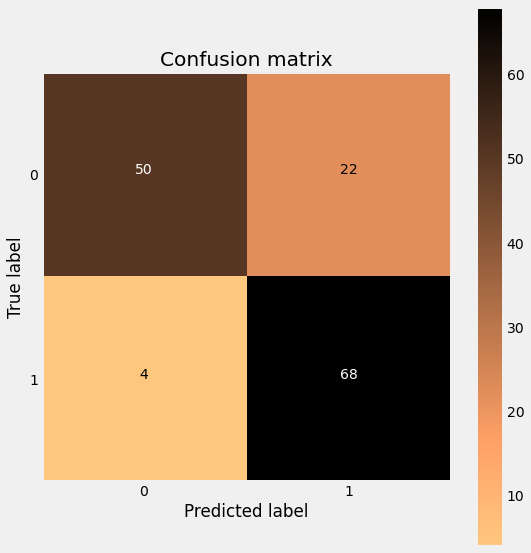

              precision    recall  f1-score   support

           0       0.93      0.69      0.79        72
           1       0.76      0.94      0.84        72

    accuracy                           0.82       144
   macro avg       0.84      0.82      0.82       144
weighted avg       0.84      0.82      0.82       144



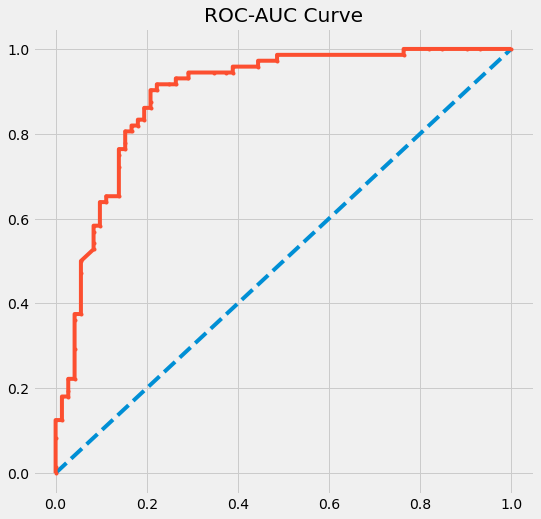

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_etc), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_etc), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_etc), axis=1)).round()))

## **Observations:**
- Even though **ExtraTreesClassifier has more AUC than KNN and RandomForest**. But **KNN had lesser False Positives**.
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- ExtraTreesClassifier model still have lesser FP, hence can be considered for Voting Classifier

## **Hypertune XGBclassifier using Optuna**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {
        'max_depth': trial.suggest_int('max_depth', 6, 300), 
        'n_estimators': trial.suggest_int('n_estimators', 10, 800), 
        'eta': trial.suggest_float('eta', 0.007, 0.013), 
        'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.2, 0.9, 0.1),
        'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.2, 0.9, 0.1),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 1e4), 
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1e4),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1e4), 
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e4),
        'eval_metric' : 'auc',
        'objective' : 'binary:logistic',
        }
    model = XGBClassifier(**params)                      # Initialization of XGBClassifier Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_xgb = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_xgb.optimize(objective, n_trials=100)                                        # Running our objective function for 100 trials.

[I 2022-03-06 02:26:50,515] A new study created in memory with name: no-name-76270392-8b2b-4ba9-b704-96afad2c67f3


0 0.896044021415824
1 0.9238181270701595
2 0.9182475158084913
3 0.9290876242095756


[I 2022-03-06 02:26:52,207] Trial 0 finished with value: 0.8851249623607347 and parameters: {'max_depth': 113, 'n_estimators': 609, 'eta': 0.012319056413031576, 'subsample': 0.7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0013700643568059, 'reg_lambda': 0.02288127776624016, 'reg_alpha': 0.4937566601022103, 'gamma': 0.06224895742226566}. Best is trial 0 with value: 0.8851249623607347.


4 0.8851249623607347
0 0.8195270672218917
1 0.8666064438422162
2 0.8615627822944897
3 0.860960554049985


[I 2022-03-06 02:26:54,656] Trial 1 finished with value: 0.8148148148148148 and parameters: {'max_depth': 270, 'n_estimators': 731, 'eta': 0.0106246802813095, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9, 'min_child_weight': 0.2505379112132866, 'reg_lambda': 44.57077333628233, 'reg_alpha': 0.008612033499494503, 'gamma': 11.301027695005104}. Best is trial 0 with value: 0.8851249623607347.


4 0.8148148148148148
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:26:55,220] Trial 2 finished with value: 0.5 and parameters: {'max_depth': 185, 'n_estimators': 680, 'eta': 0.007174005376760908, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 180.16024310397262, 'reg_lambda': 4.31111396571282, 'reg_alpha': 6.560178791697288, 'gamma': 94.67721884962245}. Best is trial 0 with value: 0.8851249623607347.


3 0.5
4 0.5
0 0.8737358715050565
1 0.9012345679012346
2 0.9095152062631737


[I 2022-03-06 02:26:55,683] Trial 3 finished with value: 0.877145438121048 and parameters: {'max_depth': 65, 'n_estimators': 145, 'eta': 0.010388945996904788, 'subsample': 0.7, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.8, 'min_child_weight': 0.14339566054127817, 'reg_lambda': 46.217489872972195, 'reg_alpha': 0.09733939759364672, 'gamma': 0.08600595343167221}. Best is trial 0 with value: 0.8851249623607347.


3 0.9066546221017766
4 0.877145438121048
0 0.5
1 0.5


[I 2022-03-06 02:26:55,924] Trial 4 finished with value: 0.5 and parameters: {'max_depth': 296, 'n_estimators': 177, 'eta': 0.011123305308460181, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.5, 'min_child_weight': 0.5765076712803284, 'reg_lambda': 212.93647424455045, 'reg_alpha': 4.310848945977197, 'gamma': 36.490692293077416}. Best is trial 0 with value: 0.8851249623607347.


2 0.5
3 0.5
4 0.5
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:26:56,072] Trial 5 finished with value: 0.5 and parameters: {'max_depth': 70, 'n_estimators': 97, 'eta': 0.007258414042893615, 'subsample': 0.4, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.2, 'min_child_weight': 9.390923649886807, 'reg_lambda': 2.6357435338877844, 'reg_alpha': 2802.328556522693, 'gamma': 3.8162298951479383}. Best is trial 0 with value: 0.8851249623607347.


3 0.5
4 0.5
0 0.5
1 0.5


[I 2022-03-06 02:26:56,368] Trial 6 finished with value: 0.5 and parameters: {'max_depth': 189, 'n_estimators': 307, 'eta': 0.012497224309022854, 'subsample': 0.2, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.2, 'min_child_weight': 3203.197219429384, 'reg_lambda': 2.936291314892473, 'reg_alpha': 1.2479089102527916, 'gamma': 75.8133655760492}. Best is trial 0 with value: 0.8851249623607347.


2 0.5
3 0.5
4 0.5
0 0.5


[I 2022-03-06 02:26:56,607] Trial 7 finished with value: 0.5 and parameters: {'max_depth': 99, 'n_estimators': 222, 'eta': 0.010842195627425789, 'subsample': 0.9, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.5, 'min_child_weight': 0.03890232122243286, 'reg_lambda': 452.0836736703691, 'reg_alpha': 9817.281943217804, 'gamma': 0.003412341580487298}. Best is trial 0 with value: 0.8851249623607347.


1 0.5
2 0.5
3 0.5
4 0.5
0 0.5
1 0.5
2 0.5
3 0.5


[I 2022-03-06 02:26:57,387] Trial 8 finished with value: 0.5 and parameters: {'max_depth': 119, 'n_estimators': 406, 'eta': 0.007161393801226672, 'subsample': 0.2, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.9, 'min_child_weight': 0.001180906025790808, 'reg_lambda': 197.0658842507841, 'reg_alpha': 2.475317950406311, 'gamma': 1035.0729983444733}. Best is trial 0 with value: 0.8851249623607347.


4 0.5
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:26:57,977] Trial 9 finished with value: 0.5 and parameters: {'max_depth': 198, 'n_estimators': 663, 'eta': 0.010717361049841688, 'subsample': 0.5, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.7, 'min_child_weight': 513.3920762963768, 'reg_lambda': 0.004314840108776102, 'reg_alpha': 37.85745473643303, 'gamma': 341.43649170640214}. Best is trial 0 with value: 0.8851249623607347.


3 0.5
4 0.5
0 0.9071980963712075
1 0.9146341463414633
2 0.9227642276422764
3 0.932249322493225


[I 2022-03-06 02:27:00,785] Trial 10 finished with value: 0.8845227341162301 and parameters: {'max_depth': 38, 'n_estimators': 496, 'eta': 0.012963608805395155, 'subsample': 0.7, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0013148948759412866, 'reg_lambda': 0.0028904879017027352, 'reg_alpha': 0.014189781070554864, 'gamma': 0.12875843353610872}. Best is trial 0 with value: 0.8851249623607347.


4 0.8845227341162301
0 0.905264723378941
1 0.9120746763023185
2 0.9197530864197531
3 0.9369165913881362


[I 2022-03-06 02:27:02,369] Trial 11 finished with value: 0.8903944595001506 and parameters: {'max_depth': 6, 'n_estimators': 511, 'eta': 0.012597827269273576, 'subsample': 0.7, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0012061259657281751, 'reg_lambda': 0.0024488080648929966, 'reg_alpha': 0.003815017773254567, 'gamma': 0.14239440833053568}. Best is trial 11 with value: 0.8903944595001506.


4 0.8903944595001506
0 0.8887566924449732
1 0.9138813610358325
2 0.9292381812707017
3 0.9292381812707016


[I 2022-03-06 02:27:04,282] Trial 12 finished with value: 0.8938572719060525 and parameters: {'max_depth': 9, 'n_estimators': 543, 'eta': 0.011815456657000192, 'subsample': 0.7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4, 'min_child_weight': 0.015035498697068158, 'reg_lambda': 0.04076966164058729, 'reg_alpha': 0.001013878391293205, 'gamma': 0.1362845644099866}. Best is trial 12 with value: 0.8938572719060525.


4 0.8938572719060525
0 0.8863771564544913
1 0.9065040650406504
2 0.9229147847034026
3 0.9357121348991269


[I 2022-03-06 02:27:06,879] Trial 13 finished with value: 0.8798554652213191 and parameters: {'max_depth': 15, 'n_estimators': 533, 'eta': 0.009138986720822067, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4, 'min_child_weight': 0.014346148923814259, 'reg_lambda': 0.07435432399264408, 'reg_alpha': 0.0010383714565251458, 'gamma': 0.6784339329995305}. Best is trial 12 with value: 0.8938572719060525.


4 0.8798554652213191
0 0.9067519333729923
1 0.9176452875639867
2 0.9208069858476362
3 0.9387232761216501


[I 2022-03-06 02:27:08,343] Trial 14 finished with value: 0.8955133995784403 and parameters: {'max_depth': 6, 'n_estimators': 387, 'eta': 0.011689116941324067, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 0.011380519834350348, 'reg_lambda': 0.119427556350662, 'reg_alpha': 0.001038562432941778, 'gamma': 0.001271225355080672}. Best is trial 14 with value: 0.8955133995784403.


4 0.8955133995784403
0 0.8695716835217132
1 0.8965672990063234
2 0.8991267690454682


[I 2022-03-06 02:27:09,167] Trial 15 finished with value: 0.8619391749473051 and parameters: {'max_depth': 46, 'n_estimators': 352, 'eta': 0.011690824688022775, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 6.256745977338127, 'reg_lambda': 0.21756072318645756, 'reg_alpha': 0.06266493521102952, 'gamma': 0.0010570468481454814}. Best is trial 14 with value: 0.8955133995784403.


3 0.9037940379403794
4 0.8619391749473051
0 0.9040749553837002
1 0.9191508581752484
2 0.9274314965371876
3 0.9444444444444444


[I 2022-03-06 02:27:11,596] Trial 16 finished with value: 0.8867810900331226 and parameters: {'max_depth': 142, 'n_estimators': 798, 'eta': 0.009292554641035544, 'subsample': 0.5, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4, 'min_child_weight': 0.015560304263017447, 'reg_lambda': 0.283674498900453, 'reg_alpha': 0.0016668561986909781, 'gamma': 0.008310576937611839}. Best is trial 14 with value: 0.8955133995784403.


4 0.8867810900331226
0 0.896341463414634
1 0.9129780186690757
2 0.9197530864197531
3 0.929539295392954


[I 2022-03-06 02:27:12,913] Trial 17 finished with value: 0.8848238482384824 and parameters: {'max_depth': 79, 'n_estimators': 421, 'eta': 0.01158191849005544, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 1.1482700299863344, 'reg_lambda': 0.024973930447773175, 'reg_alpha': 0.04618182860105745, 'gamma': 0.005865204315096889}. Best is trial 14 with value: 0.8955133995784403.


4 0.8848238482384824
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:27:13,215] Trial 18 finished with value: 0.5 and parameters: {'max_depth': 31, 'n_estimators': 259, 'eta': 0.009361554897360326, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4, 'min_child_weight': 0.045683355273300114, 'reg_lambda': 4315.85999674164, 'reg_alpha': 72.22663809583007, 'gamma': 7897.338362902427}. Best is trial 14 with value: 0.8955133995784403.


3 0.5
4 0.5
0 0.8481558596073766
1 0.8956639566395663
2 0.8813610358325805
3 0.8952122854561879


[I 2022-03-06 02:27:14,157] Trial 19 finished with value: 0.8574224631135201 and parameters: {'max_depth': 230, 'n_estimators': 579, 'eta': 0.011795149182994373, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.8, 'min_child_weight': 21.61926825715157, 'reg_lambda': 0.41922588776385095, 'reg_alpha': 0.19947829497033748, 'gamma': 0.8497624251329358}. Best is trial 14 with value: 0.8955133995784403.


4 0.8574224631135201
0 0.8881618084473527
1 0.9046973803071364
2 0.9199036434808792


[I 2022-03-06 02:27:14,418] Trial 20 finished with value: 0.8888888888888888 and parameters: {'max_depth': 150, 'n_estimators': 40, 'eta': 0.008158357940266578, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.006639571825287064, 'reg_lambda': 0.011488066848133336, 'reg_alpha': 0.015916845828824855, 'gamma': 0.02373508954661501}. Best is trial 14 with value: 0.8955133995784403.


3 0.9209575429087624
4 0.8888888888888888
0 0.8999107674003569
1 0.913429689852454
2 0.9310448660042155
3 0.9298404095152063


[I 2022-03-06 02:27:16,471] Trial 21 finished with value: 0.8967178560674496 and parameters: {'max_depth': 9, 'n_estimators': 477, 'eta': 0.012916431660912433, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.003993924742142334, 'reg_lambda': 0.0017250281232290966, 'reg_alpha': 0.003633618088782678, 'gamma': 0.5637801538087917}. Best is trial 21 with value: 0.8967178560674496.


4 0.8967178560674496
0 0.8955978584176085
1 0.9146341463414633
2 0.9191508581752484
3 0.9211080999698886


[I 2022-03-06 02:27:18,475] Trial 22 finished with value: 0.8845227341162301 and parameters: {'max_depth': 9, 'n_estimators': 457, 'eta': 0.012080752604528192, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.005580446319388242, 'reg_lambda': 0.07641224270226293, 'reg_alpha': 0.004195116857127251, 'gamma': 0.6372898773986115}. Best is trial 21 with value: 0.8967178560674496.


4 0.8845227341162301
0 0.8816180844735276
1 0.9117735621800662
2 0.9244203553146643
3 0.9272809394760614


[I 2022-03-06 02:27:20,735] Trial 23 finished with value: 0.8878349894610057 and parameters: {'max_depth': 50, 'n_estimators': 344, 'eta': 0.012866839272089153, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8, 'min_child_weight': 0.07749961552969539, 'reg_lambda': 0.8834987015629782, 'reg_alpha': 0.001126604910850997, 'gamma': 1.884470738981467}. Best is trial 21 with value: 0.8967178560674496.


4 0.8878349894610057
0 0.9015466983938132
1 0.912526347485697
2 0.9235170129479072
3 0.9429388738331828


[I 2022-03-06 02:27:22,928] Trial 24 finished with value: 0.8967178560674495 and parameters: {'max_depth': 31, 'n_estimators': 575, 'eta': 0.011157072629292176, 'subsample': 0.5, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 0.005707828614452785, 'reg_lambda': 0.0015231167795400824, 'reg_alpha': 0.022259090570836516, 'gamma': 0.0012589363667772455}. Best is trial 21 with value: 0.8967178560674496.


4 0.8967178560674495
0 0.9060083283759667
1 0.9242697982535382
2 0.9168925022583558
3 0.9314965371875941


[I 2022-03-06 02:27:24,704] Trial 25 finished with value: 0.8783498946100573 and parameters: {'max_depth': 88, 'n_estimators': 459, 'eta': 0.011269315512282356, 'subsample': 0.4, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 0.006849790256575564, 'reg_lambda': 0.0010140650862617703, 'reg_alpha': 0.025114778910897757, 'gamma': 0.0015248126144810214}. Best is trial 21 with value: 0.8967178560674496.


4 0.8783498946100573
0 0.8832540154669839
1 0.9155374887082205
2 0.9093646492020476
3 0.9330021077988557


[I 2022-03-06 02:27:26,340] Trial 26 finished with value: 0.8732309545317676 and parameters: {'max_depth': 33, 'n_estimators': 635, 'eta': 0.0099889706471756, 'subsample': 0.5, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 1.1686477499114925, 'reg_lambda': 0.007978445269465409, 'reg_alpha': 0.003978747963854613, 'gamma': 0.018250886454135955}. Best is trial 21 with value: 0.8967178560674496.


4 0.8732309545317676
0 0.8964901844140392
1 0.9236675700090333
2 0.9253236976814212
3 0.9336043360433605


[I 2022-03-06 02:27:28,513] Trial 27 finished with value: 0.8815115928937067 and parameters: {'max_depth': 54, 'n_estimators': 354, 'eta': 0.010111011974725805, 'subsample': 0.4, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8, 'min_child_weight': 0.004316148067496057, 'reg_lambda': 0.0010480679589569982, 'reg_alpha': 0.2137674899332411, 'gamma': 0.019861666515048212}. Best is trial 21 with value: 0.8967178560674496.


4 0.8815115928937067
0 0.9033313503866746
1 0.9137308039747065
2 0.9238181270701595
3 0.9396266184884071


[I 2022-03-06 02:27:31,324] Trial 28 finished with value: 0.8911472448057813 and parameters: {'max_depth': 31, 'n_estimators': 584, 'eta': 0.01215272050596988, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 0.3194223293190924, 'reg_lambda': 0.00903407431025948, 'reg_alpha': 0.008753935927200425, 'gamma': 0.00251825482931976}. Best is trial 21 with value: 0.8967178560674496.


4 0.8911472448057813
0 0.9033313503866747
1 0.9194519722975008
2 0.9156880457693465
3 0.9406805179162904


[I 2022-03-06 02:27:33,826] Trial 29 finished with value: 0.8837699488105992 and parameters: {'max_depth': 98, 'n_estimators': 447, 'eta': 0.011298552191078066, 'subsample': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0032706942871242642, 'reg_lambda': 0.01754512471175867, 'reg_alpha': 0.5944731076873795, 'gamma': 0.03406691414660978}. Best is trial 21 with value: 0.8967178560674496.


4 0.8837699488105992
0 0.8996133254015467
1 0.9174947305028606
2 0.921559771153267
3 0.9275820535983137


[I 2022-03-06 02:27:36,469] Trial 30 finished with value: 0.8815115928937067 and parameters: {'max_depth': 118, 'n_estimators': 267, 'eta': 0.012267878043916762, 'subsample': 0.9, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.5, 'min_child_weight': 0.038316009719257596, 'reg_lambda': 0.06045568336097333, 'reg_alpha': 0.0035351856168208406, 'gamma': 0.007827030713528603}. Best is trial 21 with value: 0.8967178560674496.


4 0.8815115928937067
0 0.8969363474122547
1 0.9110207768744354
2 0.9328515507377296
3 0.9280337247816922


[I 2022-03-06 02:27:43,193] Trial 31 finished with value: 0.8944595001505571 and parameters: {'max_depth': 16, 'n_estimators': 551, 'eta': 0.012003243423359313, 'subsample': 0.7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7, 'min_child_weight': 0.017347002999400618, 'reg_lambda': 0.044249936451070795, 'reg_alpha': 0.0010620406557863883, 'gamma': 0.3068846996539346}. Best is trial 21 with value: 0.8967178560674496.


4 0.8944595001505571
0 0.8892028554431886
1 0.9072568503462812
2 0.9137308039747064
3 0.9152363745859682


[I 2022-03-06 02:27:53,198] Trial 32 finished with value: 0.8834688346883469 and parameters: {'max_depth': 27, 'n_estimators': 719, 'eta': 0.012611935100112064, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.11929859315513694, 'reg_lambda': 0.0031545515999661894, 'reg_alpha': 0.0068185220800999966, 'gamma': 4.564015625043738}. Best is trial 21 with value: 0.8967178560674496.


4 0.8834688346883469
0 0.8985722784057109
1 0.9030412526347485
2 0.9203553146642578
3 0.9287865100873232


[I 2022-03-06 02:28:00,345] Trial 33 finished with value: 0.8863294188497439 and parameters: {'max_depth': 59, 'n_estimators': 578, 'eta': 0.012107317802909995, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9, 'min_child_weight': 0.0233472964052829, 'reg_lambda': 0.15580947319902302, 'reg_alpha': 0.0318117713521468, 'gamma': 0.35338451278721716}. Best is trial 21 with value: 0.8967178560674496.


4 0.8863294188497439
0 0.8570047590719809
1 0.8983739837398375
2 0.9116982836495031
3 0.884598012646793


[I 2022-03-06 02:28:09,239] Trial 34 finished with value: 0.8693917494730503 and parameters: {'max_depth': 22, 'n_estimators': 616, 'eta': 0.011465353261712443, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.8, 'min_child_weight': 0.0025014898593676707, 'reg_lambda': 0.0010412169965452853, 'reg_alpha': 0.0024613799892269027, 'gamma': 15.758257883344495}. Best is trial 21 with value: 0.8967178560674496.


4 0.8693917494730503
0 0.8893515764425937
1 0.912526347485697
2 0.9190003011141223
3 0.9262270400481782


[I 2022-03-06 02:28:12,932] Trial 35 finished with value: 0.877145438121048 and parameters: {'max_depth': 68, 'n_estimators': 484, 'eta': 0.011021556657423607, 'subsample': 0.7, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.17367915260369265, 'reg_lambda': 13.690659389676997, 'reg_alpha': 0.010242632992034735, 'gamma': 0.292988391781587}. Best is trial 21 with value: 0.8967178560674496.


4 0.877145438121048
0 0.8820642474717431
1 0.9146341463414633
2 0.9147847034025897
3 0.9211080999698886


[I 2022-03-06 02:28:14,593] Trial 36 finished with value: 0.8729298404095153 and parameters: {'max_depth': 6, 'n_estimators': 389, 'eta': 0.010417566445634008, 'subsample': 0.4, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009540748163828664, 'reg_lambda': 0.5726760582057306, 'reg_alpha': 0.14800441694557087, 'gamma': 0.03752254125427408}. Best is trial 21 with value: 0.8967178560674496.


4 0.8729298404095153
0 0.7826442593694231
1 0.8531315868714242
2 0.833107497741644
3 0.8422161999397771


[I 2022-03-06 02:28:15,783] Trial 37 finished with value: 0.8011894007828968 and parameters: {'max_depth': 45, 'n_estimators': 700, 'eta': 0.01191465384660983, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8, 'min_child_weight': 46.635377475189124, 'reg_lambda': 0.005693069466549887, 'reg_alpha': 0.00221300023541679, 'gamma': 1.684097933041956}. Best is trial 21 with value: 0.8967178560674496.


4 0.8011894007828968
0 0.5
1 0.5
2 0.5
3 0.5


[I 2022-03-06 02:28:17,105] Trial 38 finished with value: 0.5 and parameters: {'max_depth': 249, 'n_estimators': 781, 'eta': 0.012435995577484435, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.49685676794025174, 'reg_lambda': 1.0355868455343793, 'reg_alpha': 368.73933636157244, 'gamma': 11.197266832985363}. Best is trial 21 with value: 0.8967178560674496.


4 0.5
0 0.8491969066032123
1 0.8851249623607347
2 0.8935561577838


[I 2022-03-06 02:28:18,132] Trial 39 finished with value: 0.8768443239987955 and parameters: {'max_depth': 78, 'n_estimators': 541, 'eta': 0.012806313497341865, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9, 'min_child_weight': 0.0023497005706418195, 'reg_lambda': 0.027958611660728105, 'reg_alpha': 10.64127516163232, 'gamma': 0.0023461459646800923}. Best is trial 21 with value: 0.8967178560674496.


3 0.8891900030111413
4 0.8768443239987955
0 0.8838488994646044
1 0.9173441734417344
2 0.9171936163806081
3 0.9262270400481782


[I 2022-03-06 02:28:21,177] Trial 40 finished with value: 0.8786510087323095 and parameters: {'max_depth': 22, 'n_estimators': 652, 'eta': 0.010975994715803227, 'subsample': 0.5, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.7, 'min_child_weight': 0.06710021981813327, 'reg_lambda': 16.569003624038633, 'reg_alpha': 0.43477364403623014, 'gamma': 0.06136581795356083}. Best is trial 21 with value: 0.8967178560674496.


4 0.8786510087323095
0 0.8927721594289113
1 0.9159891598915989
2 0.9346582354712436
3 0.9313459801264681


[I 2022-03-06 02:28:24,252] Trial 41 finished with value: 0.8947606142728093 and parameters: {'max_depth': 19, 'n_estimators': 564, 'eta': 0.011909918725003068, 'subsample': 0.7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'min_child_weight': 0.017476995398038514, 'reg_lambda': 0.030548538780705285, 'reg_alpha': 0.001681864528096087, 'gamma': 0.16658993820290113}. Best is trial 21 with value: 0.8967178560674496.


4 0.8947606142728093
0 0.9060083283759667
1 0.9113218909966878
2 0.9339054501656128
3 0.9319482083709726


[I 2022-03-06 02:28:27,529] Trial 42 finished with value: 0.9012345679012346 and parameters: {'max_depth': 39, 'n_estimators': 596, 'eta': 0.012334301893041468, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.022665608731243615, 'reg_lambda': 0.12003439854797193, 'reg_alpha': 0.006767366789325596, 'gamma': 0.28752325822223407}. Best is trial 42 with value: 0.9012345679012346.


4 0.9012345679012346
0 0.9011005353955979
1 0.9176452875639867
2 0.9271303824149353
3 0.9351099066546222


[I 2022-03-06 02:28:30,708] Trial 43 finished with value: 0.8980728696175851 and parameters: {'max_depth': 47, 'n_estimators': 616, 'eta': 0.012410572991576066, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0025615882807290755, 'reg_lambda': 0.10456547226168053, 'reg_alpha': 0.019699523155228656, 'gamma': 0.00987596905064359}. Best is trial 42 with value: 0.9012345679012346.


4 0.8980728696175851
0 0.9055621653777512
1 0.9193014152363745
2 0.9280337247816922
3 0.9400782896717855


[I 2022-03-06 02:28:34,793] Trial 44 finished with value: 0.9000301114122253 and parameters: {'max_depth': 171, 'n_estimators': 745, 'eta': 0.012386369663351937, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'min_child_weight': 0.002235978752020831, 'reg_lambda': 0.12493390974654071, 'reg_alpha': 0.02129072836531151, 'gamma': 0.004714089579366823}. Best is trial 42 with value: 0.9012345679012346.


4 0.9000301114122253
0 0.905116002379536
1 0.9167419451972296
2 0.9248720264980428
3 0.934056007226739


[I 2022-03-06 02:28:40,036] Trial 45 finished with value: 0.8929539295392954 and parameters: {'max_depth': 172, 'n_estimators': 763, 'eta': 0.012991691674685318, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'min_child_weight': 0.002103583349666958, 'reg_lambda': 2.3392014800703116, 'reg_alpha': 0.06276306486725465, 'gamma': 0.004695763802233078}. Best is trial 42 with value: 0.9012345679012346.


4 0.8929539295392954
0 0.8996133254015467
1 0.9137308039747063
2 0.9238181270701595
3 0.9304426377597109


[I 2022-03-06 02:28:46,107] Trial 46 finished with value: 0.8940078289671786 and parameters: {'max_depth': 132, 'n_estimators': 738, 'eta': 0.012595660977216169, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0038209671190679827, 'reg_lambda': 8.100266711282929, 'reg_alpha': 0.023310004504975123, 'gamma': 0.009856164256665915}. Best is trial 42 with value: 0.9012345679012346.


4 0.8940078289671786
0 0.8993158834027365
1 0.9141824751580849
2 0.9266787112315567
3 0.9396266184884071


[I 2022-03-06 02:28:50,119] Trial 47 finished with value: 0.890846130683529 and parameters: {'max_depth': 171, 'n_estimators': 682, 'eta': 0.012377158453472764, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.4, 'min_child_weight': 0.0010119573650957435, 'reg_lambda': 0.0026322874233489163, 'reg_alpha': 0.008640220983976585, 'gamma': 0.014594344271641824}. Best is trial 42 with value: 0.9012345679012346.


4 0.890846130683529
0 0.8994646044021416
1 0.9208069858476362
2 0.9229147847034026
3 0.9355615778380006


[I 2022-03-06 02:28:52,976] Trial 48 finished with value: 0.874585968081903 and parameters: {'max_depth': 224, 'n_estimators': 608, 'eta': 0.012668257822108826, 'subsample': 0.8, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.0020512511467156123, 'reg_lambda': 0.011933982622069746, 'reg_alpha': 0.0956386484377347, 'gamma': 0.07593306463247235}. Best is trial 42 with value: 0.9012345679012346.


4 0.874585968081903
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:28:53,820] Trial 49 finished with value: 0.5 and parameters: {'max_depth': 106, 'n_estimators': 503, 'eta': 0.012340783380673381, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 3313.748319967319, 'reg_lambda': 0.1733181282114133, 'reg_alpha': 1.303857585084321, 'gamma': 0.0027488004524129383}. Best is trial 42 with value: 0.9012345679012346.


3 0.5
4 0.5
0 0.8930696014277216
1 0.9182475158084914
2 0.9173441734417344
3 0.9200542005420054


[I 2022-03-06 02:28:56,820] Trial 50 finished with value: 0.8905450165612767 and parameters: {'max_depth': 173, 'n_estimators': 661, 'eta': 0.011434863340157753, 'subsample': 0.8, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.5, 'min_child_weight': 0.029789044411918483, 'reg_lambda': 0.0044428065018176045, 'reg_alpha': 0.015808144387113487, 'gamma': 0.05328452233220644}. Best is trial 42 with value: 0.9012345679012346.


4 0.8905450165612767
0 0.900059488399762
1 0.9134296898524541
2 0.9284853959650707
3 0.9357121348991269


[I 2022-03-06 02:28:59,938] Trial 51 finished with value: 0.8995784402288468 and parameters: {'max_depth': 196, 'n_estimators': 395, 'eta': 0.01163781172764116, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.008263700827263206, 'reg_lambda': 0.0868688414475709, 'reg_alpha': 0.007251921633858179, 'gamma': 0.0016967808979905063}. Best is trial 42 with value: 0.9012345679012346.


4 0.8995784402288468
0 0.9030339083878643
1 0.9158386028304728
2 0.9275820535983137
3 0.9337548931044866


[I 2022-03-06 02:29:03,732] Trial 52 finished with value: 0.9031918096958746 and parameters: {'max_depth': 208, 'n_estimators': 616, 'eta': 0.012786688162334569, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009205157727051775, 'reg_lambda': 0.4237493776682705, 'reg_alpha': 0.0357459259751965, 'gamma': 0.0012862253712724995}. Best is trial 52 with value: 0.9031918096958746.


4 0.9031918096958746
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:29:04,561] Trial 53 finished with value: 0.5 and parameters: {'max_depth': 205, 'n_estimators': 626, 'eta': 0.012714543101672532, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 9892.935884230035, 'reg_lambda': 0.42744520427491456, 'reg_alpha': 0.04875452626275694, 'gamma': 0.005924488582205575}. Best is trial 52 with value: 0.9031918096958746.


3 0.5
4 0.5
0 0.9057108863771565
1 0.9171936163806083
2 0.9269798253538091
3 0.9360132490213791


[I 2022-03-06 02:29:10,124] Trial 54 finished with value: 0.897169527250828 and parameters: {'max_depth': 205, 'n_estimators': 732, 'eta': 0.012992881275472812, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009445943657125557, 'reg_lambda': 1.1857494386462544, 'reg_alpha': 0.006558456946684088, 'gamma': 0.003735401954812799}. Best is trial 52 with value: 0.9031918096958746.


4 0.897169527250828
0 0.905116002379536
1 0.9177958446251129
2 0.9263775971093045
3 0.9348087925323698


[I 2022-03-06 02:29:15,572] Trial 55 finished with value: 0.8946100572116832 and parameters: {'max_depth': 213, 'n_estimators': 750, 'eta': 0.012438549621221496, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.011140167608268135, 'reg_lambda': 2.069467933104444, 'reg_alpha': 0.006396896160949154, 'gamma': 0.0032119460113213226}. Best is trial 52 with value: 0.9031918096958746.


4 0.8946100572116832
0 0.9005056513979774
1 0.9152363745859681
2 0.9244203553146642
3 0.9420355314664258


[I 2022-03-06 02:29:19,573] Trial 56 finished with value: 0.89159891598916 and parameters: {'max_depth': 182, 'n_estimators': 711, 'eta': 0.012217591706930193, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.4, 'min_child_weight': 0.0010051440653948062, 'reg_lambda': 0.09503863223095861, 'reg_alpha': 0.11417002805319759, 'gamma': 0.010126013382686613}. Best is trial 52 with value: 0.9031918096958746.


4 0.89159891598916
0 0.9005056513979773
1 0.9174947305028605
2 0.919602529358627
3 0.9426377597109304


[I 2022-03-06 02:29:25,716] Trial 57 finished with value: 0.8915989159891599 and parameters: {'max_depth': 235, 'n_estimators': 688, 'eta': 0.00782052160832174, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'min_child_weight': 0.03872426084255393, 'reg_lambda': 1.0292217236227064, 'reg_alpha': 0.03547153331847682, 'gamma': 0.0019269871165533425}. Best is trial 52 with value: 0.9031918096958746.


4 0.8915989159891599
0 0.9021415823914337
1 0.9176452875639867
2 0.9266787112315568
3 0.9354110207768744


[I 2022-03-06 02:29:33,941] Trial 58 finished with value: 0.8957392351701295 and parameters: {'max_depth': 193, 'n_estimators': 772, 'eta': 0.012972606033945455, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.008370733462493908, 'reg_lambda': 0.2776719815759337, 'reg_alpha': 0.013475342832505309, 'gamma': 0.0010007101684380093}. Best is trial 52 with value: 0.9031918096958746.


4 0.8957392351701295
0 0.9061570493753719
1 0.9156880457693466
2 0.9247214694369166
3 0.9382716049382717


[I 2022-03-06 02:29:40,683] Trial 59 finished with value: 0.8947606142728094 and parameters: {'max_depth': 282, 'n_estimators': 734, 'eta': 0.011668040253016106, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0017629311945237282, 'reg_lambda': 4.703515735645425, 'reg_alpha': 0.0060456136400612644, 'gamma': 0.004216619574367976}. Best is trial 52 with value: 0.9031918096958746.


4 0.8947606142728094
0 0.902587745389649
1 0.9128274616079494
2 0.9239686841312856
3 0.935109906654622


[I 2022-03-06 02:29:42,050] Trial 60 finished with value: 0.8912978018669075 and parameters: {'max_depth': 162, 'n_estimators': 177, 'eta': 0.012745129126407434, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.08295675465021494, 'reg_lambda': 0.6479074875065884, 'reg_alpha': 0.3155137732329223, 'gamma': 0.013873343092112323}. Best is trial 52 with value: 0.9031918096958746.


4 0.8912978018669075
0 0.9002082093991671
1 0.914333032219211
2 0.9236675700090334
3 0.9369165913881361


[I 2022-03-06 02:29:47,836] Trial 61 finished with value: 0.8932550436615476 and parameters: {'max_depth': 206, 'n_estimators': 800, 'eta': 0.012539510930157777, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0036346097966725205, 'reg_lambda': 1.5553052827788925, 'reg_alpha': 0.002926548387682394, 'gamma': 0.004606795096153297}. Best is trial 52 with value: 0.9031918096958746.


4 0.8932550436615476
0 0.9088340273646639
1 0.9180969587473652
2 0.9248720264980427
3 0.9403794037940378


[I 2022-03-06 02:29:51,828] Trial 62 finished with value: 0.8941583860283047 and parameters: {'max_depth': 188, 'n_estimators': 433, 'eta': 0.012801240460059574, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.006311103662720344, 'reg_lambda': 0.28210436700406977, 'reg_alpha': 0.004188952160047971, 'gamma': 0.0022308103533352883}. Best is trial 52 with value: 0.9031918096958746.


4 0.8941583860283047
0 0.8993158834027365
1 0.9114724480578138
2 0.9284853959650707
3 0.9323998795543511


[I 2022-03-06 02:29:59,239] Trial 63 finished with value: 0.9012345679012346 and parameters: {'max_depth': 242, 'n_estimators': 522, 'eta': 0.01228409531980599, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.02166056613800642, 'reg_lambda': 0.1159161489820471, 'reg_alpha': 0.015111565866185608, 'gamma': 0.029894769856776242}. Best is trial 52 with value: 0.9031918096958746.


4 0.9012345679012346
0 0.9045211183819155
1 0.9137308039747065
2 0.9262270400481782
3 0.9284853959650707


[I 2022-03-06 02:30:03,127] Trial 64 finished with value: 0.8943089430894309 and parameters: {'max_depth': 249, 'n_estimators': 602, 'eta': 0.012263527102683363, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.009148677635628218, 'reg_lambda': 0.10654500961309657, 'reg_alpha': 0.014883883310386821, 'gamma': 0.006936409753570828}. Best is trial 52 with value: 0.9031918096958746.


4 0.8943089430894309
0 0.9022903033908387
1 0.9090635350797953
2 0.9290876242095754
3 0.9299909665763324


[I 2022-03-06 02:30:06,991] Trial 65 finished with value: 0.8977717554953327 and parameters: {'max_depth': 219, 'n_estimators': 640, 'eta': 0.011834319507785462, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.026548428952303554, 'reg_lambda': 0.06470482792634116, 'reg_alpha': 0.059018249904547904, 'gamma': 0.026991479416559883}. Best is trial 52 with value: 0.9031918096958746.


4 0.8977717554953327
0 0.9057108863771566
1 0.9069557362240289
2 0.9266787112315569
3 0.9280337247816922


[I 2022-03-06 02:30:10,583] Trial 66 finished with value: 0.8979223125564588 and parameters: {'max_depth': 262, 'n_estimators': 646, 'eta': 0.011797973304514452, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.021054932776034447, 'reg_lambda': 0.01794876806008846, 'reg_alpha': 0.09383205268092462, 'gamma': 0.03414605048206379}. Best is trial 52 with value: 0.9031918096958746.


4 0.8979223125564588
0 0.8921772754312909
1 0.9179464016862391
2 0.9281842818428184
3 0.929539295392954


[I 2022-03-06 02:30:14,593] Trial 67 finished with value: 0.8940078289671787 and parameters: {'max_depth': 265, 'n_estimators': 524, 'eta': 0.011557611705739006, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4, 'min_child_weight': 0.062427853618606734, 'reg_lambda': 0.0217367004389676, 'reg_alpha': 0.024205977882443504, 'gamma': 0.14940075791081384}. Best is trial 52 with value: 0.9031918096958746.


4 0.8940078289671787
0 0.8784949434860202
1 0.9062029509183981
2 0.9092140921409214
3 0.9217103282143932


[I 2022-03-06 02:30:16,236] Trial 68 finished with value: 0.8911472448057814 and parameters: {'max_depth': 242, 'n_estimators': 669, 'eta': 0.012044983821169851, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4, 'min_child_weight': 3.458250302351633, 'reg_lambda': 0.044853614734920055, 'reg_alpha': 0.08186170743400728, 'gamma': 0.04249087590973602}. Best is trial 52 with value: 0.9031918096958746.


4 0.8911472448057814
0 0.8970850684116597
1 0.9104185486299308
2 0.9250225835591689
3 0.933002107798856


[I 2022-03-06 02:30:19,191] Trial 69 finished with value: 0.8879855465221319 and parameters: {'max_depth': 132, 'n_estimators': 590, 'eta': 0.009668569198170905, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.19630918611507903, 'reg_lambda': 0.1783854238460813, 'reg_alpha': 0.04269442393561908, 'gamma': 0.10695725677807387}. Best is trial 52 with value: 0.9031918096958746.


4 0.8879855465221319
0 0.5
1 0.5
2 0.5
3 0.5


[I 2022-03-06 02:30:24,666] Trial 70 finished with value: 0.5 and parameters: {'max_depth': 264, 'n_estimators': 524, 'eta': 0.011763975328927818, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.019773144775458346, 'reg_lambda': 0.11416804457365105, 'reg_alpha': 0.010673499873911509, 'gamma': 175.33697241330228}. Best is trial 52 with value: 0.9031918096958746.


4 0.5
0 0.9061570493753718
1 0.9069557362240289
2 0.9265281541704306
3 0.9263775971093045


[I 2022-03-06 02:30:30,216] Trial 71 finished with value: 0.9010840108401084 and parameters: {'max_depth': 226, 'n_estimators': 639, 'eta': 0.011857460794682561, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.04501263099637371, 'reg_lambda': 0.061810016959726176, 'reg_alpha': 0.06387942765522464, 'gamma': 0.026044971239963622}. Best is trial 52 with value: 0.9031918096958746.


4 0.9010840108401084
0 0.9013979773944081
1 0.9086118638964168
2 0.9200542005420054
3 0.9317976513098464


[I 2022-03-06 02:30:32,884] Trial 72 finished with value: 0.8949111713339356 and parameters: {'max_depth': 278, 'n_estimators': 633, 'eta': 0.012188734518343404, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.047972660863646724, 'reg_lambda': 0.016623565775292174, 'reg_alpha': 0.8872269288232074, 'gamma': 0.011522062478813369}. Best is trial 52 with value: 0.9031918096958746.


4 0.8949111713339356
0 0.8996133254015466
1 0.9086118638964167
2 0.9244203553146642
3 0.9361638060825053


[I 2022-03-06 02:30:34,945] Trial 73 finished with value: 0.8944595001505571 and parameters: {'max_depth': 292, 'n_estimators': 324, 'eta': 0.011389667381680162, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.10788588848039503, 'reg_lambda': 0.04910018753729899, 'reg_alpha': 0.13922459783786773, 'gamma': 0.02558799984545312}. Best is trial 52 with value: 0.9031918096958746.


4 0.8944595001505571
0 0.9016954193932183
1 0.9126769045468233
2 0.9226136705811502
3 0.9411321890996688


[I 2022-03-06 02:30:39,782] Trial 74 finished with value: 0.9013851249623607 and parameters: {'max_depth': 250, 'n_estimators': 558, 'eta': 0.012486972131407476, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.005628798260961141, 'reg_lambda': 0.40257422436325285, 'reg_alpha': 0.20360661046819822, 'gamma': 0.017981211511312562}. Best is trial 52 with value: 0.9031918096958746.


4 0.9013851249623607
0 0.90377751338489
1 0.9137308039747065
2 0.9298404095152063
3 0.9457994579945799


[I 2022-03-06 02:30:45,095] Trial 75 finished with value: 0.9006323396567298 and parameters: {'max_depth': 229, 'n_estimators': 555, 'eta': 0.012484220181466535, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.00504940749135765, 'reg_lambda': 0.346880430013836, 'reg_alpha': 0.0180677724922977, 'gamma': 0.01789930820483046}. Best is trial 52 with value: 0.9031918096958746.


4 0.9006323396567298
0 0.9040749553837002
1 0.9120746763023186
2 0.9224631135200241
3 0.9366154772658837


[I 2022-03-06 02:30:48,196] Trial 76 finished with value: 0.90063233965673 and parameters: {'max_depth': 236, 'n_estimators': 557, 'eta': 0.012030189775668807, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.005110970789417871, 'reg_lambda': 0.4303181940820919, 'reg_alpha': 0.2249666767692423, 'gamma': 0.0013646397994659055}. Best is trial 52 with value: 0.9031918096958746.


4 0.90063233965673
0 0.8984235574063058
1 0.9162902740138512
2 0.9214092140921409
3 0.9373682625715146


[I 2022-03-06 02:30:51,403] Trial 77 finished with value: 0.8902439024390244 and parameters: {'max_depth': 232, 'n_estimators': 555, 'eta': 0.012501009154974515, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.013970044770585447, 'reg_lambda': 0.48024782505399577, 'reg_alpha': 0.28286629119662254, 'gamma': 0.0177605710412173}. Best is trial 52 with value: 0.9031918096958746.


4 0.8902439024390244
0 0.8890541344437835
1 0.9128274616079494
2 0.9208069858476362
3 0.9224631135200241


[I 2022-03-06 02:30:54,421] Trial 78 finished with value: 0.8846732911773563 and parameters: {'max_depth': 252, 'n_estimators': 494, 'eta': 0.012023087028073937, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7, 'min_child_weight': 0.004698877218680766, 'reg_lambda': 0.21588463939466981, 'reg_alpha': 2.140993476351433, 'gamma': 0.07402890069420515}. Best is trial 52 with value: 0.9031918096958746.


4 0.8846732911773563
0 0.5
1 0.5
2 0.5
3 0.5


[I 2022-03-06 02:30:55,391] Trial 79 finished with value: 0.5 and parameters: {'max_depth': 240, 'n_estimators': 570, 'eta': 0.008715861219727703, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 197.40695071647303, 'reg_lambda': 0.3407089576657493, 'reg_alpha': 10.546548461983127, 'gamma': 0.006633946868547204}. Best is trial 52 with value: 0.9031918096958746.


4 0.5
0 0.9092801903628792
1 0.9191508581752483
2 0.9283348389039445
3 0.9423366455886781


[I 2022-03-06 02:30:59,222] Trial 80 finished with value: 0.8906955736224029 and parameters: {'max_depth': 217, 'n_estimators': 515, 'eta': 0.012619816444522952, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7, 'min_child_weight': 0.001396042153746388, 'reg_lambda': 0.6901946960699559, 'reg_alpha': 0.03527101538915017, 'gamma': 0.001120775634385994}. Best is trial 52 with value: 0.9031918096958746.


4 0.8906955736224029
0 0.9022903033908387
1 0.916139716952725
2 0.924269798253538
3 0.9339054501656128


[I 2022-03-06 02:31:01,926] Trial 81 finished with value: 0.8934056007226739 and parameters: {'max_depth': 225, 'n_estimators': 471, 'eta': 0.012150721684850619, 'subsample': 0.7, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.006067015922494243, 'reg_lambda': 0.1702164505077454, 'reg_alpha': 0.18634918757576333, 'gamma': 0.002223406101796476}. Best is trial 52 with value: 0.9031918096958746.


4 0.8934056007226739
0 0.9125520523497918
1 0.9177958446251129
2 0.9272809394760614
3 0.9317976513098465


[I 2022-03-06 02:31:04,360] Trial 82 finished with value: 0.8912978018669075 and parameters: {'max_depth': 197, 'n_estimators': 401, 'eta': 0.0119873740509372, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0032325908656361813, 'reg_lambda': 0.033868546787527674, 'reg_alpha': 0.0725866947031572, 'gamma': 0.0020604634362582546}. Best is trial 52 with value: 0.9031918096958746.


4 0.8912978018669075
0 0.898720999405116
1 0.9176452875639867
2 0.9325504366154773
3 0.9363143631436315


[I 2022-03-06 02:31:06,800] Trial 83 finished with value: 0.8931044866004215 and parameters: {'max_depth': 181, 'n_estimators': 368, 'eta': 0.010679215780362716, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.012547281265916848, 'reg_lambda': 0.07253258180016864, 'reg_alpha': 0.029330273076372447, 'gamma': 0.0016357483013659966}. Best is trial 52 with value: 0.9031918096958746.


4 0.8931044866004215
0 0.9049672813801308
1 0.9161397169527252
2 0.9259259259259259
3 0.9366154772658838


[I 2022-03-06 02:31:10,845] Trial 84 finished with value: 0.8988256549232159 and parameters: {'max_depth': 256, 'n_estimators': 595, 'eta': 0.01234164448146895, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.029815964678917038, 'reg_lambda': 0.3339382147113383, 'reg_alpha': 0.012056663987222693, 'gamma': 0.0014194576658592268}. Best is trial 52 with value: 0.9031918096958746.


4 0.8988256549232159
0 0.8890541344437835
1 0.9212586570310146
2 0.9182475158084914
3 0.9351099066546221


[I 2022-03-06 02:31:13,188] Trial 85 finished with value: 0.8711231556760012 and parameters: {'max_depth': 243, 'n_estimators': 538, 'eta': 0.01161290072965637, 'subsample': 0.2, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.004911104740135937, 'reg_lambda': 0.12718126844660535, 'reg_alpha': 0.6677246366386199, 'gamma': 0.003656681845735828}. Best is trial 52 with value: 0.9031918096958746.


4 0.8711231556760012
0 0.5
1 0.5
2 0.5
3 0.5


[I 2022-03-06 02:31:16,390] Trial 86 finished with value: 0.5 and parameters: {'max_depth': 224, 'n_estimators': 441, 'eta': 0.012834065061796697, 'subsample': 0.7, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.001677386881024045, 'reg_lambda': 0.24623538037599693, 'reg_alpha': 0.019883730264835676, 'gamma': 2514.956900341842}. Best is trial 52 with value: 0.9031918096958746.


4 0.5
0 0.9057108863771565
1 0.912526347485697
2 0.9250225835591689
3 0.9299909665763324


[I 2022-03-06 02:31:19,693] Trial 87 finished with value: 0.8935561577838 and parameters: {'max_depth': 153, 'n_estimators': 561, 'eta': 0.012563954055572158, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.007750471613396239, 'reg_lambda': 0.7049377475328089, 'reg_alpha': 0.27164172609766507, 'gamma': 0.016065456590224927}. Best is trial 52 with value: 0.9031918096958746.


4 0.8935561577838
0 0.8979773944080904
1 0.912526347485697
2 0.9230653417645288
3 0.9295392953929539


[I 2022-03-06 02:31:23,470] Trial 88 finished with value: 0.8857271906052393 and parameters: {'max_depth': 212, 'n_estimators': 619, 'eta': 0.01229857019371171, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'min_child_weight': 0.003084062106908783, 'reg_lambda': 1.3777473462769072, 'reg_alpha': 0.0020410876767793535, 'gamma': 0.0057178923455966126}. Best is trial 52 with value: 0.9031918096958746.


4 0.8857271906052393
0 0.8951516954193932
1 0.9099668774465522
2 0.9238181270701595
3 0.9358626919602528


[I 2022-03-06 02:31:28,112] Trial 89 finished with value: 0.8896416741945198 and parameters: {'max_depth': 233, 'n_estimators': 474, 'eta': 0.01189881563643752, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.014639529849513241, 'reg_lambda': 0.48690362594963066, 'reg_alpha': 0.04396500386161466, 'gamma': 0.20369535473812755}. Best is trial 52 with value: 0.9031918096958746.


4 0.8896416741945198
0 0.8622843545508625
1 0.896115627822945
2 0.9072568503462812
3 0.9027401385124962


[I 2022-03-06 02:31:29,034] Trial 90 finished with value: 0.8906955736224028 and parameters: {'max_depth': 273, 'n_estimators': 294, 'eta': 0.012121609351628242, 'subsample': 0.9, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.3036065907783665, 'reg_lambda': 153.02512066002333, 'reg_alpha': 0.004979943625127168, 'gamma': 0.05113731997700318}. Best is trial 52 with value: 0.9031918096958746.


4 0.8906955736224028
0 0.9073468173706126
1 0.9126769045468233
2 0.9141824751580848
3 0.9352604637157482


[I 2022-03-06 02:31:34,706] Trial 91 finished with value: 0.8872327612165011 and parameters: {'max_depth': 258, 'n_estimators': 589, 'eta': 0.01236878140397012, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.03185817640600066, 'reg_lambda': 3.5874686217990175, 'reg_alpha': 0.01045480110240223, 'gamma': 0.0016287098795249857}. Best is trial 52 with value: 0.9031918096958746.


4 0.8872327612165011
0 0.9021415823914336
1 0.9068051791629028
2 0.9232158988256549
3 0.9391749473050286


[I 2022-03-06 02:31:38,063] Trial 92 finished with value: 0.8938572719060524 and parameters: {'max_depth': 256, 'n_estimators': 599, 'eta': 0.012715741777294837, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.051086776598434774, 'reg_lambda': 0.0695764472554976, 'reg_alpha': 0.012628270006115007, 'gamma': 0.0014868470278512898}. Best is trial 52 with value: 0.9031918096958746.


4 0.8938572719060524
0 0.8789411064842356
1 0.9039445950015055
2 0.9227642276422763
3 0.9343571213489913


[I 2022-03-06 02:31:43,193] Trial 93 finished with value: 0.889039445950015 and parameters: {'max_depth': 239, 'n_estimators': 540, 'eta': 0.012435038542900007, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.026233257102690758, 'reg_lambda': 0.35084735338988765, 'reg_alpha': 0.008041502039767718, 'gamma': 1.049771527021404}. Best is trial 52 with value: 0.9031918096958746.


4 0.889039445950015
0 0.8381915526472339
1 0.8861788617886178
2 0.8973200843119542
3 0.8813610358325806


[I 2022-03-06 02:31:46,827] Trial 94 finished with value: 0.8500451671183379 and parameters: {'max_depth': 162, 'n_estimators': 670, 'eta': 0.012213570776032698, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.010948132310038852, 'reg_lambda': 3081.7307582847984, 'reg_alpha': 0.01675875953577988, 'gamma': 0.003063984766200768}. Best is trial 52 with value: 0.9031918096958746.


4 0.8500451671183379
0 0.5
1 0.5
2 0.5


[I 2022-03-06 02:31:47,497] Trial 95 finished with value: 0.5 and parameters: {'max_depth': 209, 'n_estimators': 697, 'eta': 0.012315876981777298, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 1.1986794384728197, 'reg_lambda': 0.15295246275603425, 'reg_alpha': 3610.07678523325, 'gamma': 0.008310265865229281}. Best is trial 52 with value: 0.9031918096958746.


3 0.5
4 0.5
0 0.9033313503866746
1 0.9165913881361036
2 0.9304426377597109
3 0.9354110207768744


[I 2022-03-06 02:31:49,954] Trial 96 finished with value: 0.8983739837398373 and parameters: {'max_depth': 197, 'n_estimators': 577, 'eta': 0.011193766963984988, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.006748724689374066, 'reg_lambda': 0.2342331761628319, 'reg_alpha': 0.029795854553533428, 'gamma': 0.001225644751163577}. Best is trial 52 with value: 0.9031918096958746.


4 0.8983739837398373
0 0.9094289113622843
1 0.9149352604637156
2 0.9209575429087624
3 0.9477566997892202


[I 2022-03-06 02:31:50,464] Trial 97 finished with value: 0.90063233965673 and parameters: {'max_depth': 227, 'n_estimators': 72, 'eta': 0.012566748180108358, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.002672064736146387, 'reg_lambda': 0.09351452457180985, 'reg_alpha': 0.05199222449091375, 'gamma': 0.0030780047281727323}. Best is trial 52 with value: 0.9031918096958746.


4 0.90063233965673
0 0.9008030933967877
1 0.9132791327913279
2 0.9220114423366456
3 0.9432399879554351


[I 2022-03-06 02:31:50,975] Trial 98 finished with value: 0.9018367961457392 and parameters: {'max_depth': 227, 'n_estimators': 90, 'eta': 0.012863942066096383, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'min_child_weight': 0.002747929150103934, 'reg_lambda': 0.05123987608892199, 'reg_alpha': 0.05807699213054996, 'gamma': 0.020516366059365278}. Best is trial 52 with value: 0.9031918096958746.


4 0.9018367961457392
0 0.8967876264128495
1 0.901686239084613
2 0.9280337247816922


[I 2022-03-06 02:31:51,289] Trial 99 finished with value: 0.8894911171333935 and parameters: {'max_depth': 228, 'n_estimators': 44, 'eta': 0.012879090579957408, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0013985351402722877, 'reg_lambda': 0.0543551307793953, 'reg_alpha': 0.1502894336107628, 'gamma': 0.01146412412297848}. Best is trial 52 with value: 0.9031918096958746.


3 0.9352604637157482
4 0.8894911171333935


In [ ]:
trial_xgb = study_xgb.best_trial
print(f'roc_auc_score: {trial_xgb.value}')
print(f"Best hyperparameters: {trial_xgb.params}")

roc_auc_score: 0.9031918096958746
Best hyperparameters: {'max_depth': 208, 'n_estimators': 616, 'eta': 0.012786688162334569, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009205157727051775, 'reg_lambda': 0.4237493776682705, 'reg_alpha': 0.0357459259751965, 'gamma': 0.0012862253712724995}


In [ ]:
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
optuna.visualization.plot_slice(study_xgb)

## **Training XGBClassifier with tuned hyper-parameters**

In [ ]:
final_test_predictions_xgb = [] #to store final test predictions
final_valid_predictions_xgb = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_xgb.params
    params = {'max_depth': 208, 'n_estimators': 616, 'eta': 0.012786688162334569, 'subsample': 0.9, 'colsample_bytree': 0.8, 
      'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009205157727051775,
      'reg_lambda': 0.4237493776682705, 'reg_alpha': 0.0357459259751965, 'gamma': 0.0012862253712724995}

    model_xgb = XGBClassifier(**params)                                                # instantiate XGBClassifier Class
    model_xgb.fit(xtrain, ytrain)                                                      # Training the model on training set

    preds_valid = model_xgb.predict_proba(xvalid)[:, 1]                                # Predicting Validation set 
    test_preds = model_xgb.predict_proba(xtest)[:, 1]                                  # Predicting Test Set
    final_test_predictions_xgb.append(test_preds)                                      # Appending test predictions to list
    final_valid_predictions_xgb.append(preds_valid)                                    # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                   # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                      # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                             # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                               # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                 # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                 # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.9030339083878643
Fold 0 AUC_test:  0.8512731481481481
Fold 1 AUC_valid:  0.9158386028304728
Fold 1 AUC_test:  0.8589891975308643
Fold 2 AUC_valid:  0.9275820535983137
Fold 2 AUC_test:  0.8614969135802468
Fold 3 AUC_valid:  0.9337548931044866
Fold 3 AUC_test:  0.8508873456790124
Fold 4 AUC_valid:  0.9031918096958746
Fold 4 AUC_test:  0.8827160493827161
0.9166802535234024 0.012484084187738925


## **Evaluation of XGBoost Classifier**

Confusion matrix, without normalization
[[54 18]
 [ 7 65]]


              precision    recall  f1-score   support

           0       0.89      0.75      0.81        72
           1       0.78      0.90      0.84        72

    accuracy                           0.83       144
   macro avg       0.83      0.83      0.83       144
weighted avg       0.83      0.83      0.83       144



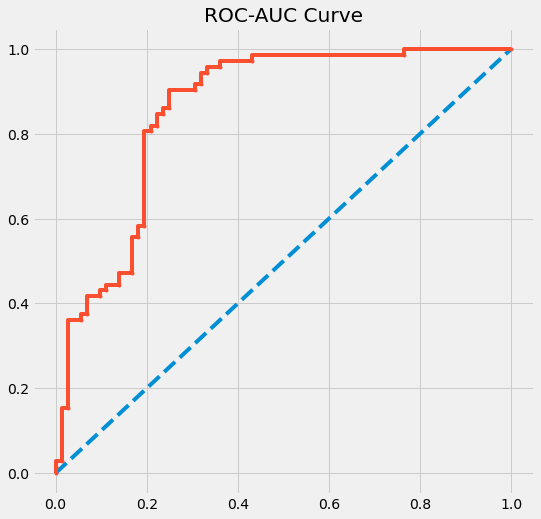

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_xgb), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_xgb), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_xgb), axis=1)).round()))

## **Observations:**
- **XGBClassifier has lesser AUC than ExtraTreesClassifier and more AUC than KNN and RandomForest**. But **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- XGBClassifier model still have lesser FP, hence can be considered for Voting Classifier.

## **Hypertune Multi-Layer Perceptron**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params = {
        'alpha': trial.suggest_loguniform('alpha',1e-4,1), 
        'hidden_layer_sizes': trial.suggest_int('hidden_layer_sizes',5,100),
        'max_iter': trial.suggest_int('max_iter',30,200)}
    model = MLPClassifier(**params)                                               # Initialization of MLPClassifier Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_mlp = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_mlp.optimize(objective, n_trials=100)                                        # Running our objective function for 100 trials.

[I 2022-03-06 02:36:44,294] A new study created in memory with name: no-name-1d05774f-e136-4a53-aeb2-e7636f517ddf


0 0.8301606186793575
1 0.8858777476663655
2 0.8825654923215898
3 0.8727792833483891


[I 2022-03-06 02:36:45,169] Trial 0 finished with value: 0.869165913881361 and parameters: {'alpha': 0.00018474480129590474, 'hidden_layer_sizes': 76, 'max_iter': 41}. Best is trial 0 with value: 0.869165913881361.


4 0.869165913881361
0 0.8544021415823914
1 0.870069256248118
2 0.899879554351099
3 0.8804576934658235


[I 2022-03-06 02:36:48,258] Trial 1 finished with value: 0.8658536585365854 and parameters: {'alpha': 0.000382625692296756, 'hidden_layer_sizes': 68, 'max_iter': 165}. Best is trial 0 with value: 0.869165913881361.


4 0.8658536585365854
0 0.826888756692445
1 0.8794037940379404
2 0.8735320686540199


[I 2022-03-06 02:36:48,836] Trial 2 finished with value: 0.8629930743751881 and parameters: {'alpha': 0.1509761494839251, 'hidden_layer_sizes': 38, 'max_iter': 49}. Best is trial 0 with value: 0.869165913881361.


3 0.8696175850647395
4 0.8629930743751881
0 0.8585663295657346
1 0.8721770551038843
2 0.8998795543510991
3 0.8866305329719965


[I 2022-03-06 02:36:52,592] Trial 3 finished with value: 0.8858777476663656 and parameters: {'alpha': 0.026360206532647045, 'hidden_layer_sizes': 94, 'max_iter': 182}. Best is trial 3 with value: 0.8858777476663656.


4 0.8858777476663656
0 0.8416121356335515
1 0.8821138211382114
2 0.8879855465221318
3 0.8717253839205059


[I 2022-03-06 02:36:54,494] Trial 4 finished with value: 0.8682625715146041 and parameters: {'alpha': 0.045380635274950225, 'hidden_layer_sizes': 58, 'max_iter': 108}. Best is trial 3 with value: 0.8858777476663656.


4 0.8682625715146041
0 0.8291195716835218
1 0.870972598614875
2 0.8822643781993376
3 0.8712737127371274


[I 2022-03-06 02:36:55,753] Trial 5 finished with value: 0.877145438121048 and parameters: {'alpha': 0.1101523284087743, 'hidden_layer_sizes': 28, 'max_iter': 128}. Best is trial 3 with value: 0.8858777476663656.


4 0.877145438121048
0 0.8405710886377156
1 0.881812707015959
2 0.8929539295392954
3 0.8684131285757302


[I 2022-03-06 02:36:57,212] Trial 6 finished with value: 0.8602830472749172 and parameters: {'alpha': 0.0017414007980591569, 'hidden_layer_sizes': 33, 'max_iter': 145}. Best is trial 3 with value: 0.8858777476663656.


4 0.8602830472749172
0 0.8286734086853064
1 0.8869316470942487
2 0.8864799759108701
3 0.8769948810599217


[I 2022-03-06 02:36:58,346] Trial 7 finished with value: 0.871875940981632 and parameters: {'alpha': 0.5749440421838977, 'hidden_layer_sizes': 37, 'max_iter': 107}. Best is trial 3 with value: 0.8858777476663656.


4 0.871875940981632
0 0.8335812016656752
1 0.876392652815417
2 0.8928033724781692
3 0.8727792833483891


[I 2022-03-06 02:36:59,535] Trial 8 finished with value: 0.8738331827762722 and parameters: {'alpha': 0.00043411699267282715, 'hidden_layer_sizes': 84, 'max_iter': 58}. Best is trial 3 with value: 0.8858777476663656.


4 0.8738331827762722
0 0.7940214158239143
1 0.85742246311352


[I 2022-03-06 02:36:59,940] Trial 9 finished with value: 0.8416139716952726 and parameters: {'alpha': 0.000933651538253175, 'hidden_layer_sizes': 27, 'max_iter': 36}. Best is trial 3 with value: 0.8858777476663656.


2 0.8721770551038843
3 0.8604336043360434
4 0.8416139716952726
0 0.8636228435455087
1 0.8666064438422162
2 0.9027401385124961
3 0.8834688346883469


[I 2022-03-06 02:37:04,130] Trial 10 finished with value: 0.8837699488105992 and parameters: {'alpha': 0.014245848376221549, 'hidden_layer_sizes': 97, 'max_iter': 200}. Best is trial 3 with value: 0.8858777476663656.


4 0.8837699488105992
0 0.8741820345032718
1 0.8705209274314966
2 0.9040951520626317
3 0.8815115928937067


[I 2022-03-06 02:37:08,305] Trial 11 finished with value: 0.89159891598916 and parameters: {'alpha': 0.0069097882327675145, 'hidden_layer_sizes': 98, 'max_iter': 200}. Best is trial 11 with value: 0.89159891598916.


4 0.89159891598916
0 0.8646638905413444
1 0.8641975308641976
2 0.90258958145137
3 0.8757904245709124


[I 2022-03-06 02:37:12,567] Trial 12 finished with value: 0.8852755194218609 and parameters: {'alpha': 0.004290931168336002, 'hidden_layer_sizes': 100, 'max_iter': 198}. Best is trial 11 with value: 0.89159891598916.


4 0.8852755194218609
0 0.8572278405710887
1 0.8733815115928937
2 0.9024390243902438
3 0.8789521228545618


[I 2022-03-06 02:37:15,967] Trial 13 finished with value: 0.8783498946100572 and parameters: {'alpha': 0.013117132096802781, 'hidden_layer_sizes': 88, 'max_iter': 169}. Best is trial 11 with value: 0.89159891598916.


4 0.8783498946100572
0 0.8405710886377156
1 0.869165913881361
2 0.8982234266787112
3 0.8747365251430292


[I 2022-03-06 02:37:19,033] Trial 14 finished with value: 0.8705209274314964 and parameters: {'alpha': 0.004682803592351725, 'hidden_layer_sizes': 56, 'max_iter': 175}. Best is trial 11 with value: 0.89159891598916.


4 0.8705209274314964
0 0.789708506841166
1 0.8554652213188798
2 0.8891900030111413


[I 2022-03-06 02:37:19,707] Trial 15 finished with value: 0.8697681421258657 and parameters: {'alpha': 0.036417809055661186, 'hidden_layer_sizes': 8, 'max_iter': 76}. Best is trial 11 with value: 0.89159891598916.


3 0.7657332128876844
4 0.8697681421258657
0 0.8584176085663295
1 0.8641975308641975
2 0.9043962661848841
3 0.8839205058717254


[I 2022-03-06 02:37:27,862] Trial 16 finished with value: 0.8842216199939776 and parameters: {'alpha': 0.004186235721368403, 'hidden_layer_sizes': 88, 'max_iter': 184}. Best is trial 11 with value: 0.89159891598916.


4 0.8842216199939776
0 0.8465199286139203
1 0.8800060222824451
2 0.8950617283950617
3 0.8816621499548329


[I 2022-03-06 02:37:34,743] Trial 17 finished with value: 0.872779283348389 and parameters: {'alpha': 0.6778942336867387, 'hidden_layer_sizes': 69, 'max_iter': 145}. Best is trial 11 with value: 0.89159891598916.


4 0.872779283348389
0 0.8569303985722784
1 0.8684131285757302
2 0.9015356820234869
3 0.8760915386931647


[I 2022-03-06 02:37:40,819] Trial 18 finished with value: 0.8777476663655526 and parameters: {'alpha': 0.035978829839487705, 'hidden_layer_sizes': 78, 'max_iter': 150}. Best is trial 11 with value: 0.89159891598916.


4 0.8777476663655526
0 0.8433967876264128
1 0.8777476663655526
2 0.8888888888888888
3 0.8739837398373984


[I 2022-03-06 02:37:44,377] Trial 19 finished with value: 0.8756398675097862 and parameters: {'alpha': 0.22671298013523306, 'hidden_layer_sizes': 95, 'max_iter': 82}. Best is trial 11 with value: 0.89159891598916.


4 0.8756398675097862
0 0.8493456276026174
1 0.8762420957542909
2 0.9045468232460102
3 0.8732309545317676


[I 2022-03-06 02:37:47,716] Trial 20 finished with value: 0.8711231556760013 and parameters: {'alpha': 0.009966127892484382, 'hidden_layer_sizes': 46, 'max_iter': 184}. Best is trial 11 with value: 0.89159891598916.


4 0.8711231556760013
0 0.8679357525282569
1 0.8682625715146041
2 0.9015356820234869
3 0.8807588075880759


[I 2022-03-06 02:37:56,634] Trial 21 finished with value: 0.8748870822041553 and parameters: {'alpha': 0.002977791043625429, 'hidden_layer_sizes': 98, 'max_iter': 199}. Best is trial 11 with value: 0.89159891598916.


4 0.8748870822041553
0 0.861540749553837
1 0.8622402890695573
2 0.9042457091237579
3 0.8828666064438422


[I 2022-03-06 02:38:03,363] Trial 22 finished with value: 0.878048780487805 and parameters: {'alpha': 0.008170847769109786, 'hidden_layer_sizes': 99, 'max_iter': 187}. Best is trial 11 with value: 0.89159891598916.


4 0.878048780487805
0 0.8538072575847708
1 0.8748870822041553
2 0.8977717554953326
3 0.8771454381210478


[I 2022-03-06 02:38:09,358] Trial 23 finished with value: 0.8815115928937067 and parameters: {'alpha': 0.001554937520679084, 'hidden_layer_sizes': 87, 'max_iter': 160}. Best is trial 11 with value: 0.89159891598916.


4 0.8815115928937067
0 0.8618381915526472
1 0.8690153568202349
2 0.8991267690454682
3 0.8684131285757302


[I 2022-03-06 02:38:17,465] Trial 24 finished with value: 0.8812104787714544 and parameters: {'alpha': 0.02557868498308839, 'hidden_layer_sizes': 79, 'max_iter': 199}. Best is trial 11 with value: 0.89159891598916.


4 0.8812104787714544
0 0.8549970255800119
1 0.8688647997591087
2 0.900782896717856
3 0.8792532369768142


[I 2022-03-06 02:38:24,685] Trial 25 finished with value: 0.8810599217103283 and parameters: {'alpha': 0.00577173054977358, 'hidden_layer_sizes': 66, 'max_iter': 180}. Best is trial 11 with value: 0.89159891598916.


4 0.8810599217103283
0 0.853955978584176
1 0.8679614573923516
2 0.9000301114122253
3 0.877295995182174


[I 2022-03-06 02:38:32,831] Trial 26 finished with value: 0.8815115928937067 and parameters: {'alpha': 0.06828508252960497, 'hidden_layer_sizes': 92, 'max_iter': 156}. Best is trial 11 with value: 0.89159891598916.


4 0.8815115928937067
0 0.856335514574658
1 0.8703703703703703
2 0.9012345679012346
3 0.8762420957542909


[I 2022-03-06 02:38:41,785] Trial 27 finished with value: 0.8732309545317676 and parameters: {'alpha': 0.001701770699662377, 'hidden_layer_sizes': 100, 'max_iter': 121}. Best is trial 11 with value: 0.89159891598916.


4 0.8732309545317676
0 0.8567816775728734
1 0.8792532369768142
2 0.8998795543510991
3 0.8775971093044265


[I 2022-03-06 02:38:48,601] Trial 28 finished with value: 0.8766937669376693 and parameters: {'alpha': 0.021678675770677745, 'hidden_layer_sizes': 82, 'max_iter': 136}. Best is trial 11 with value: 0.89159891598916.


4 0.8766937669376693
0 0.8558893515764426
1 0.8608852755194218
2 0.9046973803071364
3 0.8777476663655526


[I 2022-03-06 02:38:56,713] Trial 29 finished with value: 0.8824149352604638 and parameters: {'alpha': 0.0008315613671180897, 'hidden_layer_sizes': 73, 'max_iter': 192}. Best is trial 11 with value: 0.89159891598916.


4 0.8824149352604638
0 0.8597560975609756
1 0.8654019873532068
2 0.8998795543510991
3 0.8839205058717253


[I 2022-03-06 02:39:04,138] Trial 30 finished with value: 0.8806082505269497 and parameters: {'alpha': 0.00023177296863114417, 'hidden_layer_sizes': 90, 'max_iter': 172}. Best is trial 11 with value: 0.89159891598916.


4 0.8806082505269497
0 0.8664485425342059
1 0.8688647997591088
2 0.9024390243902439
3 0.8915989159891599


[I 2022-03-06 02:39:13,285] Trial 31 finished with value: 0.877295995182174 and parameters: {'alpha': 0.0040471740088040475, 'hidden_layer_sizes': 91, 'max_iter': 187}. Best is trial 11 with value: 0.89159891598916.


4 0.877295995182174
0 0.8546995835812017
1 0.8652514302920806
2 0.9042457091237579
3 0.8757904245709125


[I 2022-03-06 02:39:20,403] Trial 32 finished with value: 0.8813610358325805 and parameters: {'alpha': 0.002970178510170552, 'hidden_layer_sizes': 85, 'max_iter': 165}. Best is trial 11 with value: 0.89159891598916.


4 0.8813610358325805
0 0.8612433075550268
1 0.8697681421258657
2 0.8991267690454682
3 0.8694670280036134


[I 2022-03-06 02:39:27,612] Trial 33 finished with value: 0.8783498946100572 and parameters: {'alpha': 0.00011513636317273275, 'hidden_layer_sizes': 74, 'max_iter': 177}. Best is trial 11 with value: 0.89159891598916.


4 0.8783498946100572
0 0.8569303985722784
1 0.8660042155977116
2 0.9049984944293887
3 0.8789521228545618


[I 2022-03-06 02:39:31,597] Trial 34 finished with value: 0.8833182776272207 and parameters: {'alpha': 0.007007773119383379, 'hidden_layer_sizes': 93, 'max_iter': 193}. Best is trial 11 with value: 0.89159891598916.


4 0.8833182776272207
0 0.8515764425936942
1 0.867359229147847
2 0.8979223125564589
3 0.8757904245709125


[I 2022-03-06 02:39:34,866] Trial 35 finished with value: 0.883619391749473 and parameters: {'alpha': 0.06966789251698635, 'hidden_layer_sizes': 62, 'max_iter': 181}. Best is trial 11 with value: 0.89159891598916.


4 0.883619391749473
0 0.8613920285544319
1 0.8705209274314964
2 0.899879554351099
3 0.8781993375489311


[I 2022-03-06 02:39:40,866] Trial 36 finished with value: 0.8813610358325805 and parameters: {'alpha': 0.017995699163401522, 'hidden_layer_sizes': 100, 'max_iter': 164}. Best is trial 11 with value: 0.89159891598916.


4 0.8813610358325805
0 0.843694229625223
1 0.8732309545317676
2 0.8934056007226738
3 0.8726287262872628


[I 2022-03-06 02:39:45,096] Trial 37 finished with value: 0.8754893104486601 and parameters: {'alpha': 0.0030446699694661864, 'hidden_layer_sizes': 81, 'max_iter': 95}. Best is trial 11 with value: 0.89159891598916.


4 0.8754893104486601
0 0.8514277215942891
1 0.8778982234266787
2 0.8915989159891599
3 0.8831677205660946


[I 2022-03-06 02:39:52,056] Trial 38 finished with value: 0.8729298404095152 and parameters: {'alpha': 0.2300785389306565, 'hidden_layer_sizes': 50, 'max_iter': 191}. Best is trial 11 with value: 0.89159891598916.


4 0.8729298404095152
0 0.8566329565734682
1 0.8739837398373984
2 0.8977717554953327
3 0.8747365251430292


[I 2022-03-06 02:39:58,141] Trial 39 finished with value: 0.8765432098765432 and parameters: {'alpha': 0.000745334779075854, 'hidden_layer_sizes': 93, 'max_iter': 133}. Best is trial 11 with value: 0.89159891598916.


4 0.8765432098765432
0 0.8557406305770374
1 0.8672086720867208
2 0.8964167419451973
3 0.876392652815417


[I 2022-03-06 02:40:04,827] Trial 40 finished with value: 0.8792532369768142 and parameters: {'alpha': 0.011019544191544864, 'hidden_layer_sizes': 85, 'max_iter': 152}. Best is trial 11 with value: 0.89159891598916.


4 0.8792532369768142
0 0.8600535395597858
1 0.8711231556760012
2 0.8986750978620898
3 0.8860283047274917


[I 2022-03-06 02:40:10,278] Trial 41 finished with value: 0.8781993375489311 and parameters: {'alpha': 0.01587383454395427, 'hidden_layer_sizes': 95, 'max_iter': 196}. Best is trial 11 with value: 0.89159891598916.


4 0.8781993375489311
0 0.8604997025580012
1 0.8664558867810901
2 0.9046973803071364
3 0.8777476663655526


[I 2022-03-06 02:40:13,906] Trial 42 finished with value: 0.8783498946100572 and parameters: {'alpha': 0.00723637736844803, 'hidden_layer_sizes': 96, 'max_iter': 174}. Best is trial 11 with value: 0.89159891598916.


4 0.8783498946100572
0 0.8591612135633552
1 0.8748870822041555
2 0.9048479373682625
3 0.8825654923215899


[I 2022-03-06 02:40:18,017] Trial 43 finished with value: 0.8757904245709124 and parameters: {'alpha': 0.002105074766262477, 'hidden_layer_sizes': 89, 'max_iter': 200}. Best is trial 11 with value: 0.89159891598916.


4 0.8757904245709124
0 0.8396787626412849
1 0.868262571514604
2 0.877295995182174
3 0.8697681421258657


[I 2022-03-06 02:40:19,575] Trial 44 finished with value: 0.8748870822041555 and parameters: {'alpha': 0.05544792642944245, 'hidden_layer_sizes': 11, 'max_iter': 182}. Best is trial 11 with value: 0.89159891598916.


4 0.8748870822041555
0 0.865556216537775
1 0.8694670280036134
2 0.9022884673291177
3 0.8763926528154171


[I 2022-03-06 02:40:23,623] Trial 45 finished with value: 0.8861788617886179 and parameters: {'alpha': 0.00464444020240012, 'hidden_layer_sizes': 96, 'max_iter': 189}. Best is trial 11 with value: 0.89159891598916.


4 0.8861788617886179
0 0.8673408685306365
1 0.8735320686540199
2 0.9025895814513699
3 0.8878349894610056


[I 2022-03-06 02:40:27,437] Trial 46 finished with value: 0.8824149352604638 and parameters: {'alpha': 0.0012655736720813605, 'hidden_layer_sizes': 88, 'max_iter': 189}. Best is trial 11 with value: 0.89159891598916.


4 0.8824149352604638
0 0.8588637715645449
1 0.8703703703703703
2 0.8970189701897019
3 0.8795543510990665


[I 2022-03-06 02:40:31,212] Trial 47 finished with value: 0.8828666064438422 and parameters: {'alpha': 0.0005216828983026766, 'hidden_layer_sizes': 77, 'max_iter': 169}. Best is trial 11 with value: 0.89159891598916.


4 0.8828666064438422
0 0.85901249256395
1 0.8685636856368564
2 0.9009334537789822
3 0.8694670280036134


[I 2022-03-06 02:40:39,201] Trial 48 finished with value: 0.8800060222824451 and parameters: {'alpha': 0.004467237186845914, 'hidden_layer_sizes': 83, 'max_iter': 177}. Best is trial 11 with value: 0.89159891598916.


4 0.8800060222824451
0 0.7995240928019036
1 0.8887383318277629
2 0.8684131285757302


[I 2022-03-06 02:40:39,973] Trial 49 finished with value: 0.8431195423065342 and parameters: {'alpha': 0.00252659579367655, 'hidden_layer_sizes': 20, 'max_iter': 44}. Best is trial 11 with value: 0.89159891598916.


3 0.8718759409816321
4 0.8431195423065342
0 0.8433967876264128
1 0.8888888888888888
2 0.8923517012947907
3 0.8760915386931647


[I 2022-03-06 02:40:42,661] Trial 50 finished with value: 0.8711231556760013 and parameters: {'alpha': 0.02874004120399876, 'hidden_layer_sizes': 96, 'max_iter': 57}. Best is trial 11 with value: 0.89159891598916.


4 0.8711231556760013
0 0.8613920285544319
1 0.8690153568202349
2 0.9009334537789823
3 0.8816621499548328


[I 2022-03-06 02:40:51,564] Trial 51 finished with value: 0.8849744052996086 and parameters: {'alpha': 0.011327925916291144, 'hidden_layer_sizes': 100, 'max_iter': 193}. Best is trial 11 with value: 0.89159891598916.


4 0.8849744052996086
0 0.8698691255205234
1 0.8676603432700993
2 0.9024390243902439
3 0.8833182776272208


[I 2022-03-06 02:41:01,330] Trial 52 finished with value: 0.883619391749473 and parameters: {'alpha': 0.010999483311212015, 'hidden_layer_sizes': 100, 'max_iter': 187}. Best is trial 11 with value: 0.89159891598916.


4 0.883619391749473
0 0.8625817965496728
1 0.8766937669376693
2 0.9049984944293887
3 0.878199337548931


[I 2022-03-06 02:41:10,055] Trial 53 finished with value: 0.8794037940379404 and parameters: {'alpha': 0.005259257252543699, 'hidden_layer_sizes': 93, 'max_iter': 195}. Best is trial 11 with value: 0.89159891598916.


4 0.8794037940379404
0 0.8645151695419393
1 0.8622402890695573
2 0.8947606142728094
3 0.8763926528154171


[I 2022-03-06 02:41:18,364] Trial 54 finished with value: 0.8851249623607347 and parameters: {'alpha': 0.0035942172771495254, 'hidden_layer_sizes': 96, 'max_iter': 183}. Best is trial 11 with value: 0.89159891598916.


4 0.8851249623607347
0 0.8637715645449138
1 0.8661547726588377
2 0.9033423667570009
3 0.8794037940379403


[I 2022-03-06 02:41:23,969] Trial 55 finished with value: 0.8794037940379404 and parameters: {'alpha': 0.009708952158604038, 'hidden_layer_sizes': 96, 'max_iter': 166}. Best is trial 11 with value: 0.89159891598916.


4 0.8794037940379404
0 0.8698691255205235
1 0.8676603432700993
2 0.9018367961457392
3 0.877295995182174


[I 2022-03-06 02:41:27,985] Trial 56 finished with value: 0.8860283047274917 and parameters: {'alpha': 0.014189357100898267, 'hidden_layer_sizes': 91, 'max_iter': 194}. Best is trial 11 with value: 0.89159891598916.


4 0.8860283047274917
0 0.8515764425936942
1 0.8726287262872628
2 0.9054501656127673
3 0.8697681421258657


[I 2022-03-06 02:41:31,576] Trial 57 finished with value: 0.8800060222824451 and parameters: {'alpha': 0.03810948344977237, 'hidden_layer_sizes': 86, 'max_iter': 182}. Best is trial 11 with value: 0.89159891598916.


4 0.8800060222824451
0 0.8573765615704938
1 0.872628726287263
2 0.8982234266787112
3 0.877295995182174


[I 2022-03-06 02:41:34,813] Trial 58 finished with value: 0.8834688346883468 and parameters: {'alpha': 0.09817832673170489, 'hidden_layer_sizes': 92, 'max_iter': 159}. Best is trial 11 with value: 0.89159891598916.


4 0.8834688346883468
0 0.8368530636525877
1 0.8855766335441132
2 0.883619391749473
3 0.8768443239987955


[I 2022-03-06 02:41:36,024] Trial 59 finished with value: 0.8687142426979826 and parameters: {'alpha': 0.018913271232766586, 'hidden_layer_sizes': 42, 'max_iter': 108}. Best is trial 11 with value: 0.89159891598916.


4 0.8687142426979826
0 0.8506841165972636
1 0.878199337548931
2 0.8982234266787112
3 0.8763926528154171


[I 2022-03-06 02:41:38,776] Trial 60 finished with value: 0.8833182776272207 and parameters: {'alpha': 0.006415627932255543, 'hidden_layer_sizes': 80, 'max_iter': 142}. Best is trial 11 with value: 0.89159891598916.


4 0.8833182776272207
0 0.8668947055324212
1 0.8657031014754591
2 0.9096657633242999
3 0.8834688346883469


[I 2022-03-06 02:41:42,964] Trial 61 finished with value: 0.8839205058717253 and parameters: {'alpha': 0.014129681676208612, 'hidden_layer_sizes': 98, 'max_iter': 200}. Best is trial 11 with value: 0.89159891598916.


4 0.8839205058717253
0 0.8670434265318263
1 0.8632941884974406
2 0.9046973803071364
3 0.8866305329719963


[I 2022-03-06 02:41:46,931] Trial 62 finished with value: 0.873682625715146 and parameters: {'alpha': 0.0036375287241474817, 'hidden_layer_sizes': 95, 'max_iter': 191}. Best is trial 11 with value: 0.89159891598916.


4 0.873682625715146
0 0.8619869125520523
1 0.8647997591087022
2 0.9004817825956037
3 0.8798554652213189


[I 2022-03-06 02:41:50,599] Trial 63 finished with value: 0.8822643781993376 and parameters: {'alpha': 0.026493276598804776, 'hidden_layer_sizes': 100, 'max_iter': 174}. Best is trial 11 with value: 0.89159891598916.


4 0.8822643781993376
0 0.8604997025580012
1 0.8711231556760012
2 0.9027401385124962
3 0.873682625715146


[I 2022-03-06 02:41:54,393] Trial 64 finished with value: 0.8828666064438422 and parameters: {'alpha': 0.002263090779510324, 'hidden_layer_sizes': 90, 'max_iter': 186}. Best is trial 11 with value: 0.89159891598916.


4 0.8828666064438422
0 0.8622843545508626
1 0.8705209274314964
2 0.895362842517314
3 0.8757904245709125


[I 2022-03-06 02:41:58,455] Trial 65 finished with value: 0.881812707015959 and parameters: {'alpha': 0.009008878167098224, 'hidden_layer_sizes': 97, 'max_iter': 193}. Best is trial 11 with value: 0.89159891598916.


4 0.881812707015959
0 0.8616894705532421
1 0.8620897320084312
2 0.9037940379403794
3 0.8771454381210478


[I 2022-03-06 02:42:02,110] Trial 66 finished with value: 0.8797049081601926 and parameters: {'alpha': 0.001207057927544688, 'hidden_layer_sizes': 89, 'max_iter': 178}. Best is trial 11 with value: 0.89159891598916.


4 0.8797049081601926
0 0.862879238548483
1 0.864649202047576
2 0.9043962661848841
3 0.8840710629328516


[I 2022-03-06 02:42:06,096] Trial 67 finished with value: 0.8788015657934357 and parameters: {'alpha': 0.006170840706638761, 'hidden_layer_sizes': 94, 'max_iter': 195}. Best is trial 11 with value: 0.89159891598916.


4 0.8788015657934357
0 0.8610945865556217
1 0.8840710629328515
2 0.9000301114122252
3 0.883619391749473


[I 2022-03-06 02:42:09,496] Trial 68 finished with value: 0.8821138211382114 and parameters: {'alpha': 0.003950834157535918, 'hidden_layer_sizes': 70, 'max_iter': 183}. Best is trial 11 with value: 0.89159891598916.


4 0.8821138211382114
0 0.857674003569304
1 0.8647997591087022
2 0.895362842517314
3 0.8763926528154171


[I 2022-03-06 02:42:12,871] Trial 69 finished with value: 0.8778982234266787 and parameters: {'alpha': 0.01312215993884912, 'hidden_layer_sizes': 86, 'max_iter': 170}. Best is trial 11 with value: 0.89159891598916.


4 0.8778982234266787
0 0.8648126115407495
1 0.8658536585365854
2 0.8974706413730804
3 0.881812707015959


[I 2022-03-06 02:42:17,068] Trial 70 finished with value: 0.8839205058717254 and parameters: {'alpha': 0.007855737927597079, 'hidden_layer_sizes': 91, 'max_iter': 200}. Best is trial 11 with value: 0.89159891598916.


4 0.8839205058717254
0 0.8649613325401546
1 0.868262571514604
2 0.9049984944293887
3 0.8768443239987955


[I 2022-03-06 02:42:21,053] Trial 71 finished with value: 0.8775971093044264 and parameters: {'alpha': 0.005043233151251361, 'hidden_layer_sizes': 97, 'max_iter': 187}. Best is trial 11 with value: 0.89159891598916.


4 0.8775971093044264
0 0.8600535395597858
1 0.8756398675097863
2 0.8991267690454682
3 0.8739837398373984


[I 2022-03-06 02:42:25,185] Trial 72 finished with value: 0.8858777476663655 and parameters: {'alpha': 0.003164546493516062, 'hidden_layer_sizes': 100, 'max_iter': 195}. Best is trial 11 with value: 0.89159891598916.


4 0.8858777476663655
0 0.8604997025580011
1 0.8611863896416742
2 0.9030412526347485
3 0.8872327612165011


[I 2022-03-06 02:42:29,411] Trial 73 finished with value: 0.8834688346883469 and parameters: {'alpha': 0.00309343493034042, 'hidden_layer_sizes': 100, 'max_iter': 195}. Best is trial 11 with value: 0.89159891598916.


4 0.8834688346883469
0 0.8631766805472932
1 0.8657031014754593
2 0.900782896717856
3 0.8775971093044264


[I 2022-03-06 02:42:33,364] Trial 74 finished with value: 0.8920505871725384 and parameters: {'alpha': 0.001931587917122388, 'hidden_layer_sizes': 93, 'max_iter': 189}. Best is trial 74 with value: 0.8920505871725384.


4 0.8920505871725384
0 0.8630279595478881
1 0.8625414031918097
2 0.9021379102679916
3 0.8803071364046974


[I 2022-03-06 02:42:37,111] Trial 75 finished with value: 0.8815115928937067 and parameters: {'alpha': 0.00168748487161623, 'hidden_layer_sizes': 93, 'max_iter': 179}. Best is trial 74 with value: 0.8920505871725384.


4 0.8815115928937067
0 0.8596073765615705
1 0.8709725986148751
2 0.8952122854561878
3 0.8812104787714544


[I 2022-03-06 02:42:40,816] Trial 76 finished with value: 0.8759409816320385 and parameters: {'alpha': 0.0011846225448194077, 'hidden_layer_sizes': 83, 'max_iter': 189}. Best is trial 74 with value: 0.8920505871725384.


4 0.8759409816320385
0 0.8639202855443189
1 0.8702198133092443
2 0.9003312255344775
3 0.8821138211382114


[I 2022-03-06 02:42:44,730] Trial 77 finished with value: 0.881812707015959 and parameters: {'alpha': 0.0021876375027873067, 'hidden_layer_sizes': 88, 'max_iter': 196}. Best is trial 74 with value: 0.8920505871725384.


4 0.881812707015959
0 0.8567816775728733
1 0.86645588678109
2 0.890846130683529
3 0.867359229147847


[I 2022-03-06 02:42:47,940] Trial 78 finished with value: 0.8798554652213189 and parameters: {'alpha': 0.003833994029223828, 'hidden_layer_sizes': 56, 'max_iter': 185}. Best is trial 74 with value: 0.8920505871725384.


4 0.8798554652213189
0 0.8535098155859608
1 0.880909364649202
2 0.8955133995784402
3 0.8792532369768142


[I 2022-03-06 02:42:50,136] Trial 79 finished with value: 0.8812104787714543 and parameters: {'alpha': 0.02210513148204748, 'hidden_layer_sizes': 97, 'max_iter': 101}. Best is trial 74 with value: 0.8920505871725384.


4 0.8812104787714543
0 0.8596073765615706
1 0.8771454381210478
2 0.9003312255344775
3 0.8833182776272207


[I 2022-03-06 02:42:53,614] Trial 80 finished with value: 0.8803071364046974 and parameters: {'alpha': 0.0005855288876611123, 'hidden_layer_sizes': 91, 'max_iter': 171}. Best is trial 74 with value: 0.8920505871725384.


4 0.8803071364046974
0 0.8624330755502677
1 0.8702198133092443
2 0.9039445950015056
3 0.8765432098765432


[I 2022-03-06 02:42:57,639] Trial 81 finished with value: 0.8840710629328516 and parameters: {'alpha': 0.005162996945094253, 'hidden_layer_sizes': 98, 'max_iter': 190}. Best is trial 74 with value: 0.8920505871725384.


4 0.8840710629328516
0 0.8616894705532421
1 0.8715748268593797
2 0.8991267690454682
3 0.8747365251430292


[I 2022-03-06 02:43:01,661] Trial 82 finished with value: 0.8720264980427582 and parameters: {'alpha': 0.0027681218932599123, 'hidden_layer_sizes': 94, 'max_iter': 196}. Best is trial 74 with value: 0.8920505871725384.


4 0.8720264980427582
0 0.8465199286139202
1 0.8846732911773562
2 0.8932550436615477
3 0.8766937669376694


[I 2022-03-06 02:43:03,320] Trial 83 finished with value: 0.8688647997591087 and parameters: {'alpha': 0.011661203111312014, 'hidden_layer_sizes': 100, 'max_iter': 76}. Best is trial 74 with value: 0.8920505871725384.


4 0.8688647997591087
0 0.870464009518144
1 0.8759409816320386
2 0.8994278831677206
3 0.8780487804878049


[I 2022-03-06 02:43:07,233] Trial 84 finished with value: 0.8797049081601926 and parameters: {'alpha': 0.007743737896964035, 'hidden_layer_sizes': 98, 'max_iter': 181}. Best is trial 74 with value: 0.8920505871725384.


4 0.8797049081601926
0 0.851427721594289
1 0.8687142426979826
2 0.9034929238181271
3 0.8818127070159592


[I 2022-03-06 02:43:10,950] Trial 85 finished with value: 0.8840710629328516 and parameters: {'alpha': 0.001926051891081017, 'hidden_layer_sizes': 94, 'max_iter': 176}. Best is trial 74 with value: 0.8920505871725384.


4 0.8840710629328516
0 0.8569303985722785
1 0.8703703703703703
2 0.8970189701897019
3 0.8765432098765432


[I 2022-03-06 02:43:14,933] Trial 86 finished with value: 0.8846732911773563 and parameters: {'alpha': 0.03111555380147741, 'hidden_layer_sizes': 91, 'max_iter': 192}. Best is trial 74 with value: 0.8920505871725384.


4 0.8846732911773563
0 0.8673408685306365
1 0.8724781692261366
2 0.9049984944293887
3 0.8795543510990667


[I 2022-03-06 02:43:19,123] Trial 87 finished with value: 0.886329418849744 and parameters: {'alpha': 0.0014705437532539355, 'hidden_layer_sizes': 95, 'max_iter': 200}. Best is trial 74 with value: 0.8920505871725384.


4 0.886329418849744
0 0.8591612135633552
1 0.8670581150255947
2 0.9046973803071364
3 0.8733815115928938


[I 2022-03-06 02:43:23,121] Trial 88 finished with value: 0.8819632640770853 and parameters: {'alpha': 0.0011170317895542238, 'hidden_layer_sizes': 87, 'max_iter': 198}. Best is trial 74 with value: 0.8920505871725384.


4 0.8819632640770853
0 0.8563355145746578
1 0.867359229147847
2 0.896115627822945
3 0.8861788617886179


[I 2022-03-06 02:43:26,776] Trial 89 finished with value: 0.8801565793435713 and parameters: {'alpha': 0.001604079652008746, 'hidden_layer_sizes': 84, 'max_iter': 184}. Best is trial 74 with value: 0.8920505871725384.


4 0.8801565793435713
0 0.8362581796549673
1 0.8860283047274917
2 0.8917494730502861
3 0.8825654923215899


[I 2022-03-06 02:43:28,063] Trial 90 finished with value: 0.8616380608250527 and parameters: {'alpha': 0.0007102404766342856, 'hidden_layer_sizes': 27, 'max_iter': 124}. Best is trial 74 with value: 0.8920505871725384.


4 0.8616380608250527
0 0.8604997025580012
1 0.8664558867810901
2 0.9003312255344775
3 0.8788015657934357


[I 2022-03-06 02:43:32,052] Trial 91 finished with value: 0.8843721770551038 and parameters: {'alpha': 0.01635406756540653, 'hidden_layer_sizes': 95, 'max_iter': 192}. Best is trial 74 with value: 0.8920505871725384.


4 0.8843721770551038
0 0.8661511005353956
1 0.8666064438422163
2 0.9056007226738934
3 0.8715748268593797


[I 2022-03-06 02:43:35,987] Trial 92 finished with value: 0.8792532369768142 and parameters: {'alpha': 0.003211662816029041, 'hidden_layer_sizes': 98, 'max_iter': 187}. Best is trial 74 with value: 0.8920505871725384.


4 0.8792532369768142
0 0.8627305175490779
1 0.8628425173140621
2 0.8964167419451973
3 0.8819632640770851


[I 2022-03-06 02:43:40,068] Trial 93 finished with value: 0.8866305329719963 and parameters: {'alpha': 0.005981777875153198, 'hidden_layer_sizes': 96, 'max_iter': 200}. Best is trial 74 with value: 0.8920505871725384.


4 0.8866305329719963
0 0.8698691255205235
1 0.8619391749473051
2 0.9003312255344775
3 0.8855766335441132


[I 2022-03-06 02:43:44,140] Trial 94 finished with value: 0.8798554652213189 and parameters: {'alpha': 0.0009112119597806451, 'hidden_layer_sizes': 92, 'max_iter': 200}. Best is trial 74 with value: 0.8920505871725384.


4 0.8798554652213189
0 0.8695716835217132
1 0.8622402890695573
2 0.9031918096958748
3 0.8748870822041553


[I 2022-03-06 02:43:48,177] Trial 95 finished with value: 0.8801565793435713 and parameters: {'alpha': 0.005994309123024913, 'hidden_layer_sizes': 95, 'max_iter': 189}. Best is trial 74 with value: 0.8920505871725384.


4 0.8801565793435713
0 0.8622843545508625
1 0.8741342968985246
2 0.9030412526347485
3 0.883619391749473


[I 2022-03-06 02:43:52,272] Trial 96 finished with value: 0.8842216199939776 and parameters: {'alpha': 0.0025379313089413168, 'hidden_layer_sizes': 96, 'max_iter': 197}. Best is trial 74 with value: 0.8920505871725384.


4 0.8842216199939776
0 0.8527662105889351
1 0.8678109003312255
2 0.8986750978620897
3 0.8795543510990665


[I 2022-03-06 02:43:55,944] Trial 97 finished with value: 0.8828666064438422 and parameters: {'alpha': 0.004480074206530663, 'hidden_layer_sizes': 89, 'max_iter': 180}. Best is trial 74 with value: 0.8920505871725384.


4 0.8828666064438422
0 0.8624330755502677
1 0.8581752484191508
2 0.9028906955736223
3 0.8840710629328516


[I 2022-03-06 02:43:59,894] Trial 98 finished with value: 0.8798554652213189 and parameters: {'alpha': 0.00034693496259416233, 'hidden_layer_sizes': 92, 'max_iter': 194}. Best is trial 74 with value: 0.8920505871725384.


4 0.8798554652213189
0 0.8530636525877453
1 0.8815115928937067
2 0.8985245408009636
3 0.881812707015959


[I 2022-03-06 02:44:03,101] Trial 99 finished with value: 0.877145438121048 and parameters: {'alpha': 0.003508336122372365, 'hidden_layer_sizes': 61, 'max_iter': 184}. Best is trial 74 with value: 0.8920505871725384.


4 0.877145438121048


In [ ]:
trial_mlp = study_mlp.best_trial
print(f'roc_auc_score: {trial_mlp.value}')
print(f"Best hyperparameters: {trial_mlp.params}")

roc_auc_score: 0.8920505871725384
Best hyperparameters: {'alpha': 0.001931587917122388, 'hidden_layer_sizes': 93, 'max_iter': 189}


In [ ]:
optuna.visualization.plot_optimization_history(study_mlp)

In [ ]:
optuna.visualization.plot_slice(study_mlp)

## **Training Multi-Layer Perceptron with tuned hyper-parameters**

In [ ]:
final_test_predictions_mlp = [] #to store final test predictions
final_valid_predictions_mlp = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_mlp.params
    params = {'alpha': 0.001931587917122388, 'hidden_layer_sizes': 93, 'max_iter': 189}
    model_mlp = MLPClassifier(**params)                                                 # instantiate MLPClassifier Class
    model_mlp.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_mlp.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_mlp.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_mlp.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_mlp.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8658536585365852
Fold 0 AUC_test:  0.8362268518518519
Fold 1 AUC_valid:  0.8678109003312255
Fold 1 AUC_test:  0.8317901234567902
Fold 2 AUC_valid:  0.9021379102679916
Fold 2 AUC_test:  0.835841049382716
Fold 3 AUC_valid:  0.8845227341162301
Fold 3 AUC_test:  0.8312114197530864
Fold 4 AUC_valid:  0.8810599217103283
Fold 4 AUC_test:  0.8481867283950617
0.8802770249924722 0.01311468674619687


Confusion matrix, without normalization
[[48 24]
 [ 9 63]]


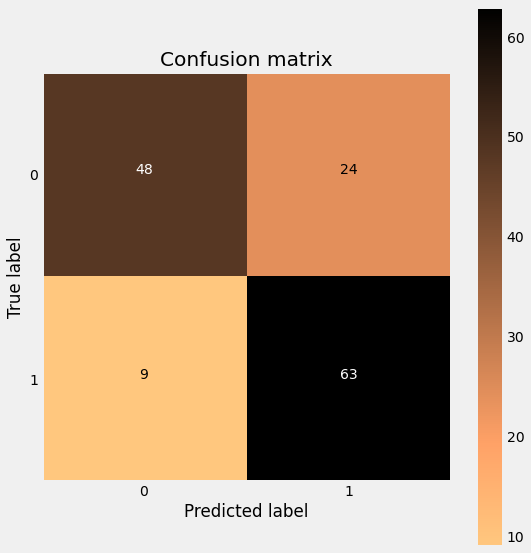

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        72
           1       0.72      0.88      0.79        72

    accuracy                           0.77       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.78      0.77      0.77       144



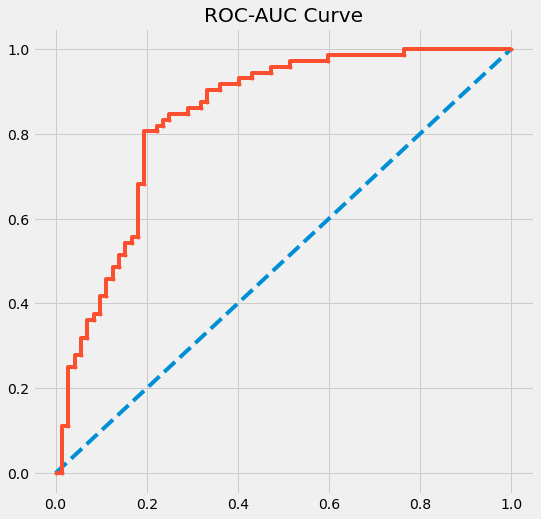

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_mlp), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_mlp), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_mlp), axis=1)).round()))

## **Observations:**
- **Multi-Layer Perceptron has lesser AUC than KNN and all other classifier we trained**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Multi-Layer Perceptron is a Neural Network model and still have lesser FP, hence can be considered for Voting Classifier to capture some more hidden patterns.

## **Hypertuning SVC**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {'C' : trial.suggest_float('C', 0.0001, 5.0)
    ,'max_iter' : trial.suggest_int('max_iter', 50, 1000)
    , 'kernel' : trial.suggest_categorical('kernel',['linear', 'poly', 'rbf', 'sigmoid'])
    , 'gamma' : trial.suggest_categorical('gamma',['scale', 'auto'])
    , 'class_weight' : trial.suggest_categorical('class_weight',['balanced'])
    , 'probability' : trial.suggest_categorical('probability',[True])
    }
    model = SVC(**params)                                                         # Initialization of SVC Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_svc = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_svc.optimize(objective, n_trials=100)                                       # Running our objective function for 100 trials.

[I 2022-03-06 02:46:31,601] A new study created in memory with name: no-name-34b249a8-7462-4143-815f-403327a802b9


0 0.8114217727543129
1 0.8757904245709123
2 0.8596808190304125
3 0.8526046371574827


[I 2022-03-06 02:46:32,256] Trial 0 finished with value: 0.8574224631135201 and parameters: {'C': 4.960102843367171, 'max_iter': 671, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 0 with value: 0.8574224631135201.


4 0.8574224631135201
0 0.8511302795954789
1 0.8685636856368564
2 0.8859530261969286


[I 2022-03-06 02:46:33,075] Trial 1 finished with value: 0.8762420957542909 and parameters: {'C': 2.3426840677816405, 'max_iter': 684, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 1 with value: 0.8762420957542909.


3 0.8729298404095152
4 0.8762420957542909
0 0.5861094586555622
1 0.7231255645889791
2 0.649804275820536
3 0.5971093044263776


[I 2022-03-06 02:46:33,802] Trial 2 finished with value: 0.5454682324601023 and parameters: {'C': 2.6308978357435775, 'max_iter': 625, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 1 with value: 0.8762420957542909.


4 0.5454682324601023
0 0.8413146936347413
1 0.8732309545317675
2 0.8785757302017464


[I 2022-03-06 02:46:34,619] Trial 3 finished with value: 0.8775971093044264 and parameters: {'C': 1.19701128856665, 'max_iter': 612, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.8714242697982535
4 0.8775971093044264
0 0.8092653182629388
1 0.859229147847034
2 0.8419903643480879
3 0.8130081300813008


[I 2022-03-06 02:46:35,312] Trial 4 finished with value: 0.8390545016561276 and parameters: {'C': 1.1649538775222266, 'max_iter': 893, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.8390545016561276
0 0.689916716240333
1 0.6222523336344475
2 0.8075880758807589
3 0.8102981029810299


[I 2022-03-06 02:46:35,834] Trial 5 finished with value: 0.6327913279132791 and parameters: {'C': 3.1816519698008174, 'max_iter': 737, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.6327913279132791
0 0.6954193932183225
1 0.6883468834688348


[I 2022-03-06 02:46:36,283] Trial 6 finished with value: 0.656127672387835 and parameters: {'C': 4.073038561940416, 'max_iter': 691, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


2 0.3852002408912978
3 0.6904546823246009
4 0.656127672387835
0 0.7523795359904818
1 0.5543510990665461
2 0.5380909364649202
3 0.808641975308642


[I 2022-03-06 02:46:36,849] Trial 7 finished with value: 0.7213188798554653 and parameters: {'C': 4.514510358925137, 'max_iter': 971, 'kernel': 'poly', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.7213188798554653
0 0.8204937537180249
1 0.8762420957542909
2 0.8754140319180969


[I 2022-03-06 02:46:37,822] Trial 8 finished with value: 0.8651008732309546 and parameters: {'C': 0.135358404102783, 'max_iter': 771, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.8491418247515807
4 0.8651008732309546
0 0.7096966091612136
1 0.7109304426377597
2 0.7792833483890395


[I 2022-03-06 02:46:38,222] Trial 9 finished with value: 0.6797651309846433 and parameters: {'C': 4.357630715963851, 'max_iter': 563, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.612767238783499
4 0.6797651309846433
0 0.843694229625223
1 0.8804576934658236
2 0.8928033724781692
3 0.8840710629328515


[I 2022-03-06 02:46:38,981] Trial 10 finished with value: 0.8675097862089732 and parameters: {'C': 1.3514375640613756, 'max_iter': 299, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.8675097862089732
0 0.8421326591314693
1 0.87548931044866
2 0.8790274013851249


[I 2022-03-06 02:46:39,767] Trial 11 finished with value: 0.8702198133092443 and parameters: {'C': 1.2927107264075, 'max_iter': 374, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.8724781692261367
4 0.8702198133092443
0 0.6594289113622844
1 0.8029208069858477
2 0.6719361638060825
3

[I 2022-03-06 02:46:40,150] Trial 12 finished with value: 0.6790123456790124 and parameters: {'C': 2.0736895580897032, 'max_iter': 97, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


 0.5236374585968082
4 0.6790123456790124
0 0.8151397977394408
1 0.876392652815417
2 0.8762420957542909
3 0.858325805480277


[I 2022-03-06 02:46:41,182] Trial 13 finished with value: 0.8641975308641976 and parameters: {'C': 0.09562449513894533, 'max_iter': 426, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.8641975308641976
0 0.5861094586555622
1 0.7222222222222222
2 0.6519120746763024


[I 2022-03-06 02:46:41,847] Trial 14 finished with value: 0.546070460704607 and parameters: {'C': 2.200060912769874, 'max_iter': 522, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.5969587473652513
4 0.546070460704607
0 0.8558893515764426
1 0.870069256248118
2 0.8906955736224029
3 0.873682625715146


[I 2022-03-06 02:46:42,641] Trial 15 finished with value: 0.8759409816320386 and parameters: {'C': 3.29414574958912, 'max_iter': 806, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.8759409816320386
0 0.8350684116597265
1 0.874585968081903
2 0.876392652815417


[I 2022-03-06 02:46:43,464] Trial 16 finished with value: 0.877145438121048 and parameters: {'C': 0.7176905713247002, 'max_iter': 482, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.8634447455585667
4 0.877145438121048
0 0.8362581796549673
1 0.7702499247214694
2 0.8819632640770851
3 0.889039445950015


[I 2022-03-06 02:46:44,202] Trial 17 finished with value: 0.8566696778078893 and parameters: {'C': 0.781311330076755, 'max_iter': 254, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


4 0.8566696778078893
0 0.6869422962522309
1 0.6017765733212888
2 0.7359981933152665


[I 2022-03-06 02:46:45,093] Trial 18 finished with value: 0.5515657934357121 and parameters: {'C': 0.5919912704185915, 'max_iter': 483, 'kernel': 'sigmoid', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.7177055103884372
4 0.5515657934357121
0 0.8170731707317073
1 0.7625715146040348
2 0.7317825956037338


[I 2022-03-06 02:46:45,568] Trial 19 finished with value: 0.7277928334838903 and parameters: {'C': 1.4426170405275083, 'max_iter': 129, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 3 with value: 0.8775971093044264.


3 0.7871123155676002
4 0.7277928334838903
0 0.8468173706127304
1 0.870972598614875
2 0.8851249623607347
3 0.8715748268593797


[I 2022-03-06 02:46:46,362] Trial 20 finished with value: 0.878199337548931 and parameters: {'C': 1.725110448687781, 'max_iter': 573, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 20 with value: 0.878199337548931.


4 0.878199337548931
0 0.8475609756097561
1 0.870069256248118
2 0.8858777476663655


[I 2022-03-06 02:46:47,149] Trial 21 finished with value: 0.8786510087323095 and parameters: {'C': 1.7951899233632769, 'max_iter': 551, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 21 with value: 0.8786510087323095.


3 0.8721770551038843
4 0.8786510087323095
0 0.8465199286139202
1 0.8712737127371273
2 0.88452273411623
3 0.8715748268593797


[I 2022-03-06 02:46:47,941] Trial 22 finished with value: 0.8780487804878049 and parameters: {'C': 1.6920206692258346, 'max_iter': 590, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 21 with value: 0.8786510087323095.


4 0.8780487804878049
0 0.8491969066032123
1 0.8723276121650105
2 0.8881361035832581


[I 2022-03-06 02:46:48,622] Trial 23 finished with value: 0.8753387533875339 and parameters: {'C': 1.8858819412876366, 'max_iter': 389, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 21 with value: 0.8786510087323095.


3 0.8702198133092443
4 0.8753387533875339
0 0.8545508625817966
1 0.8680367359229147
2 0.8893405600722674
3 0.8724028906955736


[I 2022-03-06 02:46:49,089] Trial 24 finished with value: 0.8763926528154171 and parameters: {'C': 2.816863026671478, 'max_iter': 577, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 21 with value: 0.8786510087323095.


4 0.8763926528154171
0 0.8478584176085664
1 0.8699186991869918


[I 2022-03-06 02:46:49,552] Trial 25 finished with value: 0.8786510087323096 and parameters: {'C': 1.835976773436064, 'max_iter': 849, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8855766335441132
3 0.871800662451069
4 0.8786510087323096
0 0.8254759071980964
1 0.8515507377295994
2 0.8783498946100572


[I 2022-03-06 02:46:49,917] Trial 26 finished with value: 0.8483890394459501 and parameters: {'C': 1.7537208634821064, 'max_iter': 995, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8322794339054502
4 0.8483890394459501
0 0.5856632956573468
1 0.7220716651610961
2 0.6501053899427884
3 0.5969587473652515


[I 2022-03-06 02:46:50,333] Trial 27 finished with value: 0.5445648900933454 and parameters: {'C': 2.968213350258468, 'max_iter': 847, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.5445648900933454
0 0.8146936347412255
1 0.8744354110207769


[I 2022-03-06 02:46:50,717] Trial 28 finished with value: 0.8521529659741043 and parameters: {'C': 3.5773669980341385, 'max_iter': 920, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8504968383017164
3 0.833032219211081
4 0.8521529659741043


[I 2022-03-06 02:46:50,961] Trial 29 finished with value: 0.48441734417344173 and parameters: {'C': 2.354626917195275, 'max_iter': 229, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


0 0.6320642474717431
1 0.7881662149954832
2 0.5542758205359831
3 0.5761818729298404
4 0.48441734417344173
0 0.84622248661511
1 0.8724781692261367
2 0.8843721770551038


[I 2022-03-06 02:46:51,435] Trial 30 finished with value: 0.8775971093044264 and parameters: {'C': 1.6542553462068497, 'max_iter': 744, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8717253839205058
4 0.8775971093044264
0 0.8484533016061868
1 0.8699186991869918
2 0.8860283047274917
3 0.8720264980427582


[I 2022-03-06 02:46:51,899] Trial 31 finished with value: 0.8786510087323096 and parameters: {'C': 1.8645831079590938, 'max_iter': 651, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8786510087323096
0 0.8497917906008328
1 0.8703703703703705


[I 2022-03-06 02:46:52,370] Trial 32 finished with value: 0.8765432098765432 and parameters: {'C': 2.0376141933177907, 'max_iter': 640, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8854260764829871
3 0.871875940981632
4 0.8765432098765432
0 0.8522456870910172
1 0.8676603432700993
2 0.8873080397470642


[I 2022-03-06 02:46:52,828] Trial 33 finished with value: 0.8768443239987955 and parameters: {'C': 2.491088951276136, 'max_iter': 686, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8718759409816321
4 0.8768443239987955
0 0.8395300416418798
1 0.8751881963264077
2 0.8785004516711833
3 0.8675097862089732


[I 2022-03-06 02:46:53,302] Trial 34 finished with value: 0.8774465522433001 and parameters: {'C': 1.021474161211694, 'max_iter': 493, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8774465522433001
0 0.8523944080904224
1 0.8676603432700993


[I 2022-03-06 02:46:53,751] Trial 35 finished with value: 0.877295995182174 and parameters: {'C': 2.580317575012152, 'max_iter': 844, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8876844323998796
3 0.8721017765733213
4 0.877295995182174
0 0.8456276026174896
1 0.8730803974706414
2 0.8825654923215899


[I 2022-03-06 02:46:54,225] Trial 36 finished with value: 0.8771454381210478 and parameters: {'C': 1.5404814525097268, 'max_iter': 661, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8726287262872628
4 0.8771454381210478
0 0.5893813206424747
1 0.7297500752785305
2 0.6573321288768443
3 0.6007226738934055


[I 2022-03-06 02:46:54,691] Trial 37 finished with value: 0.5463715748268594 and parameters: {'C': 0.9838383739015011, 'max_iter': 719, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.5463715748268594
0 0.55116002379536
1 0.7922312556458898
2 0.5457693465823547
3 0.7206413730803976


[I 2022-03-06 02:46:54,929] Trial 38 finished with value: 0.846582354712436 and parameters: {'C': 1.9398446210864246, 'max_iter': 440, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.846582354712436
0 0.7881469363474122
1 0.8461306835290575


[I 2022-03-06 02:46:55,310] Trial 39 finished with value: 0.8247515808491419 and parameters: {'C': 0.3689583568545791, 'max_iter': 543, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8211382113821138
3 0.8053297199638664
4 0.8247515808491419
0 0.8746281975014871
1 0.8985245408009636
2 0.9092140921409214


[I 2022-03-06 02:46:55,785] Trial 40 finished with value: 0.8675097862089732 and parameters: {'C': 2.2863505920435605, 'max_iter': 630, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8934056007226738
4 0.8675097862089732
0 0.84622248661511
1 0.8724781692261367
2 0.8842216199939776
3 0.871875940981632


[I 2022-03-06 02:46:56,265] Trial 41 finished with value: 0.8780487804878049 and parameters: {'C': 1.6486627120106603, 'max_iter': 569, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8780487804878049
0 0.8478584176085664
1 0.8702198133092441


[I 2022-03-06 02:46:56,737] Trial 42 finished with value: 0.8786510087323096 and parameters: {'C': 1.8215967072562103, 'max_iter': 621, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8854260764829871
3 0.8722523336344474
4 0.8786510087323096
0 0.840348007138608
1 0.8744354110207768


[I 2022-03-06 02:46:57,229] Trial 43 finished with value: 0.8778982234266787 and parameters: {'C': 1.1231366011205144, 'max_iter': 612, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8780487804878049
3 0.8692411924119242
4 0.8778982234266787
0 0.8445121951219512
1 0.871875940981632
2 0.8815115928937067
3 0.8723276121650105


[I 2022-03-06 02:46:57,696] Trial 44 finished with value: 0.8766937669376693 and parameters: {'C': 1.4008060384421663, 'max_iter': 781, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8766937669376693
0 0.8563355145746578
1 0.8684131285757302


[I 2022-03-06 02:46:58,182] Trial 45 finished with value: 0.8765432098765432 and parameters: {'C': 4.98597077764393, 'max_iter': 930, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.895362842517314
3 0.8774465522433003
4 0.8765432098765432
0 0.7220404521118382
1 0.8548629930743752
2 0.7734116230051189
3 0.816772056609455


[I 2022-03-06 02:46:58,489] Trial 46 finished with value: 0.5239385727190605 and parameters: {'C': 2.1170731437136685, 'max_iter': 716, 'kernel': 'linear', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.5239385727190605
0 0.8486020226055919
1 0.8697681421258656


[I 2022-03-06 02:46:58,951] Trial 47 finished with value: 0.8783498946100572 and parameters: {'C': 1.8699075899366877, 'max_iter': 533, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.886329418849744
3 0.8722523336344474
4 0.8783498946100572
0 0.8530636525877454
1 0.8684131285757302
2 0.8881361035832581


[I 2022-03-06 02:46:59,426] Trial 48 finished with value: 0.8777476663655526 and parameters: {'C': 2.6883377556978174, 'max_iter': 521, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.872779283348389
4 0.8777476663655526
0 0.6386079714455681
1 0.7280186690755797


[I 2022-03-06 02:46:59,660] Trial 49 finished with value: 0.5325956037338151 and parameters: {'C': 2.3534847175444673, 'max_iter': 357, 'kernel': 'poly', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.734643179765131
3 0.710252935862692
4 0.5325956037338151
0 0.8491969066032123
1 0.870972598614875
2 0.8854260764829871
3 0.8724028906955736


[I 2022-03-06 02:47:00,137] Trial 50 finished with value: 0.8775971093044264 and parameters: {'C': 1.9031316193747485, 'max_iter': 436, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8775971093044264
0 0.8411659726353362
1 0.8730803974706414


[I 2022-03-06 02:47:00,607] Trial 51 finished with value: 0.8778229448961157 and parameters: {'C': 1.2167898094556, 'max_iter': 615, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8788015657934357
3 0.8717253839205059
4 0.8778229448961157
0 0.8484533016061868
1 0.870069256248118
2 0.886329418849744


[I 2022-03-06 02:47:01,077] Trial 52 finished with value: 0.8783498946100572 and parameters: {'C': 1.8634293018875785, 'max_iter': 527, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8721017765733213
4 0.8783498946100572
0 0.8494943486020226
1 0.8699186991869918
2 0.8848238482384823
3 0.872704004817826


[I 2022-03-06 02:47:01,553] Trial 53 finished with value: 0.8742848539596507 and parameters: {'C': 2.163915459641685, 'max_iter': 535, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8742848539596507
0 0.8453301606186794
1 0.8717253839205058


[I 2022-03-06 02:47:02,018] Trial 54 finished with value: 0.8768443239987955 and parameters: {'C': 1.4527061197806226, 'max_iter': 668, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8821138211382114
3 0.8717253839205059
4 0.8768443239987955
0 0.5867787031528852
1 0.7219211080999699
2 0.6547726588376995


[I 2022-03-06 02:47:02,453] Trial 55 finished with value: 0.5463715748268594 and parameters: {'C': 1.9123949049646682, 'max_iter': 473, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.5974856970791931
4 0.5463715748268594
0 0.8480071386079715
1 0.8658536585365854
2 0.8664558867810901
3 0.8848238482384825


[I 2022-03-06 02:47:02,914] Trial 56 finished with value: 0.8734567901234569 and parameters: {'C': 1.813313875203526, 'max_iter': 332, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8734567901234569
0 0.8456276026174896
1 0.8729298404095152


[I 2022-03-06 02:47:03,385] Trial 57 finished with value: 0.8766937669376694 and parameters: {'C': 1.5564686369179639, 'max_iter': 403, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8831677205660945
3 0.8726287262872628
4 0.8766937669376694
0 0.8520969660916122
1 0.8674345076784101
2 0.8873080397470641


[I 2022-03-06 02:47:03,840] Trial 58 finished with value: 0.8769196025293586 and parameters: {'C': 2.501325503313708, 'max_iter': 844, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8718759409816321
4 0.8769196025293586
0 0.8161808447352766
1 0.5242396868413128


[I 2022-03-06 02:47:04,099] Trial 59 finished with value: 0.7725082806383619 and parameters: {'C': 1.290660728449986, 'max_iter': 454, 'kernel': 'linear', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8342366757000903
3 0.8594549834387233
4 0.7725082806383619
0 0.8496430696014277
1 0.8703703703703705
2 0.8854260764829871
3 0.8723276121650105


[I 2022-03-06 02:47:04,583] Trial 60 finished with value: 0.8756398675097863 and parameters: {'C': 2.090731010198805, 'max_iter': 506, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8756398675097863
0 0.8481558596073766
1 0.8702198133092441


[I 2022-03-06 02:47:05,045] Trial 61 finished with value: 0.8786510087323096 and parameters: {'C': 1.8163042762832426, 'max_iter': 541, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8858777476663655
3 0.8724028906955736
4 0.8786510087323096
0 0.8471148126115408
1 0.8703703703703703
2 0.8852755194218609


[I 2022-03-06 02:47:05,530] Trial 62 finished with value: 0.878199337548931 and parameters: {'C': 1.7433008430809187, 'max_iter': 552, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.871875940981632
4 0.878199337548931
0 0.8506841165972636
1 0.8696175850647395
2 0.8858777476663655
3 0.872854561878952


[I 2022-03-06 02:47:06,005] Trial 63 finished with value: 0.8748870822041555 and parameters: {'C': 2.2467606065215127, 'max_iter': 594, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8748870822041555
0 0.849940511600238
1 0.8705209274314966


[I 2022-03-06 02:47:06,482] Trial 64 finished with value: 0.8766937669376694 and parameters: {'C': 2.0130011313174174, 'max_iter': 521, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8856519120746762
3 0.8721770551038843
4 0.8766937669376694
0 0.8456276026174896
1 0.8730803974706414
2 0.8830171635049684


[I 2022-03-06 02:47:06,943] Trial 65 finished with value: 0.8774465522433003 and parameters: {'C': 1.5480527583216586, 'max_iter': 644, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8724781692261367
4 0.8774465522433003
0 0.8381915526472339
1 0.8751881963264077
2 0.877295995182174
3 0.8657031014754593


[I 2022-03-06 02:47:07,427] Trial 66 finished with value: 0.8774465522433001 and parameters: {'C': 0.8699709012745945, 'max_iter': 705, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8774465522433001
0 0.5856632956573468
1 0.7219211080999699


[I 2022-03-06 02:47:07,871] Trial 67 finished with value: 0.5438121047877146 and parameters: {'C': 2.979175278824574, 'max_iter': 598, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.6501806684733514
3 0.5969587473652515
4 0.5438121047877146
0 0.8472635336109459
1 0.870069256248118
2 0.8849744052996085


[I 2022-03-06 02:47:08,337] Trial 68 finished with value: 0.8783498946100572 and parameters: {'C': 1.7827800835225704, 'max_iter': 464, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.872704004817826
4 0.8783498946100572
0 0.8561867935752527
1 0.8688647997591087
2 0.8938572719060524
3 0.8754893104486601


[I 2022-03-06 02:47:08,799] Trial 69 finished with value: 0.8774465522433003 and parameters: {'C': 4.682240142331449, 'max_iter': 476, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8774465522433003
0 0.8157346817370613
1 0.6684733514001806


[I 2022-03-06 02:47:09,143] Trial 70 finished with value: 0.7981029810298104 and parameters: {'C': 1.4188295162741391, 'max_iter': 414, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.5320686540198736
3 0.8340861186389642
4 0.7981029810298104
0 0.8475609756097561
1 0.8699186991869918
2 0.8857271906052394


[I 2022-03-06 02:47:09,619] Trial 71 finished with value: 0.8786510087323095 and parameters: {'C': 1.7919691564174558, 'max_iter': 556, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8723276121650105
4 0.8786510087323095
0 0.8457763236168947
1 0.8729298404095152
2 0.8837699488105991
3 0.871875940981632


[I 2022-03-06 02:47:10,088] Trial 72 finished with value: 0.8783498946100572 and parameters: {'C': 1.6307104518040787, 'max_iter': 557, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8783498946100572
0 0.8457763236168947
1 0.872779283348389


[I 2022-03-06 02:47:10,554] Trial 73 finished with value: 0.8781993375489311 and parameters: {'C': 1.6366512310608254, 'max_iter': 568, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8837699488105992
3 0.8717253839205059
4 0.8781993375489311
0 0.851279000594884
1 0.8678109003312255
2 0.8855766335441132


[I 2022-03-06 02:47:11,018] Trial 74 finished with value: 0.8769948810599217 and parameters: {'C': 2.356294060172647, 'max_iter': 459, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8730803974706414
4 0.8769948810599217
0 0.8496430696014277
1 0.8705209274314966
2 0.8859530261969287
3 0.8724781692261367


[I 2022-03-06 02:47:11,495] Trial 75 finished with value: 0.8768443239987955 and parameters: {'C': 1.9871122066607154, 'max_iter': 644, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8768443239987955
0 0.8685306365258774
1 0.8947606142728094
2 0.9045468232460103
3 0.8899427883167721


[I 2022-03-06 02:47:11,999] Trial 76 finished with value: 0.8693164709424872 and parameters: {'C': 1.2704071681638769, 'max_iter': 750, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8693164709424872
0 0.7087299226650803
1 0.7688196326407708
2 0.7652815417043058


[I 2022-03-06 02:47:12,276] Trial 77 finished with value: 0.7126618488407106 and parameters: {'C': 1.8499042605202964, 'max_iter': 508, 'kernel': 'linear', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8735320686540199
4 0.7126618488407106
0 0.841017251635931
1 0.8739837398373984
2 0.8780487804878049
3 0.870069256248118


[I 2022-03-06 02:47:12,777] Trial 78 finished with value: 0.8779735019572419 and parameters: {'C': 1.1441748798381957, 'max_iter': 884, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8779735019572419
0 0.8554431885782272
1 0.869165913881361


[I 2022-03-06 02:47:13,234] Trial 79 finished with value: 0.8765432098765432 and parameters: {'C': 3.773867804436864, 'max_iter': 680, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8915989159891599
3 0.8747365251430292
4 0.8765432098765432
0 0.8497917906008328
1 0.8697681421258656
2 0.8857271906052394


[I 2022-03-06 02:47:13,698] Trial 80 finished with value: 0.8744354110207769 and parameters: {'C': 2.1807293445406404, 'max_iter': 810, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8727792833483891
4 0.8744354110207769
0 0.8457763236168947
1 0.8732309545317676
2 0.8830171635049683
3 0.871875940981632


[I 2022-03-06 02:47:14,159] Trial 81 finished with value: 0.877145438121048 and parameters: {'C': 1.6018461661147467, 'max_iter': 550, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.877145438121048
0 0.8474122546103509
1 0.870069256248118


[I 2022-03-06 02:47:14,619] Trial 82 finished with value: 0.8785004516711834 and parameters: {'C': 1.7647236352141542, 'max_iter': 505, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.885426076482987
3 0.8720264980427582
4 0.8785004516711834
0 0.8474122546103511
1 0.8703703703703705
2 0.8852755194218609


[I 2022-03-06 02:47:15,088] Trial 83 finished with value: 0.8783498946100572 and parameters: {'C': 1.7500996110285447, 'max_iter': 583, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.871875940981632
4 0.8783498946100572
0 0.8450327186198692
1 0.8729298404095152
2 0.8821138211382114
3 0.8724781692261367


[I 2022-03-06 02:47:15,561] Trial 84 finished with value: 0.8768443239987955 and parameters: {'C': 1.484033512060332, 'max_iter': 587, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8768443239987955
0 0.849940511600238
1 0.8706714844926227


[I 2022-03-06 02:47:16,031] Trial 85 finished with value: 0.8766937669376694 and parameters: {'C': 2.0208726278977465, 'max_iter': 617, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8861788617886179
3 0.8721770551038843
4 0.8766937669376694
0 0.8092653182629387
1 0.8774465522433003
2 0.8450767841011744


[I 2022-03-06 02:47:16,403] Trial 86 finished with value: 0.7109304426377597 and parameters: {'C': 2.4231689465111783, 'max_iter': 488, 'kernel': 'poly', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.7651309846431797
4 0.7109304426377597
0 0.5862581796549673
1 0.7232008431195424
2 0.6536434808792533
3 0.5977868112014453


[I 2022-03-06 02:47:16,853] Trial 87 finished with value: 0.5470490816019271 and parameters: {'C': 1.7497358125568903, 'max_iter': 378, 'kernel': 'sigmoid', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.5470490816019271
0 0.8706127305175491
1 0.8937067148449261


[I 2022-03-06 02:47:17,330] Trial 88 finished with value: 0.8705962059620596 and parameters: {'C': 1.3529682589169385, 'max_iter': 510, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.9045468232460102
3 0.8911472448057813
4 0.8705962059620596


[I 2022-03-06 02:47:17,498] Trial 89 finished with value: 0.6757000903342367 and parameters: {'C': 1.8968425928293218, 'max_iter': 55, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


0 0.6135484830458061
1 0.634598012646793
2 0.7171032821439325
3 0.6884974405299609
4 0.6757000903342367
0 0.8474122546103509
1 0.8702198133092441
2 0.8851249623607348


[I 2022-03-06 02:47:17,972] Trial 90 finished with value: 0.878199337548931 and parameters: {'C': 1.7570272754303282, 'max_iter': 656, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8717253839205059
4 0.878199337548931
0 0.8491969066032123
1 0.8699186991869918
2 0.8855766335441132
3 0.8723276121650105


[I 2022-03-06 02:47:18,444] Trial 91 finished with value: 0.8744354110207769 and parameters: {'C': 2.1610018978482497, 'max_iter': 535, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8744354110207769
0 0.8494943486020226
1 0.8705209274314966
2 0.8860283047274917
3 0.8723276121650105


[I 2022-03-06 02:47:18,929] Trial 92 finished with value: 0.8766937669376693 and parameters: {'C': 1.97419949990542, 'max_iter': 578, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8766937669376693
0 0.8457763236168947
1 0.8729298404095152


[I 2022-03-06 02:47:19,409] Trial 93 finished with value: 0.8775971093044264 and parameters: {'C': 1.62699962424316, 'max_iter': 558, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8834688346883469
3 0.8717253839205059
4 0.8775971093044264
0 0.8478584176085664
1 0.8694670280036134
2 0.8854260764829871


[I 2022-03-06 02:47:19,884] Trial 94 finished with value: 0.8785004516711834 and parameters: {'C': 1.8267668199339449, 'max_iter': 465, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8722523336344474
4 0.8785004516711834
0 0.8451814396192743
1 0.872779283348389
2 0.8824149352604637
3 0.8723276121650105


[I 2022-03-06 02:47:20,352] Trial 95 finished with value: 0.8766937669376694 and parameters: {'C': 1.4803583397179592, 'max_iter': 609, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8766937669376694
0 0.7586258179654967
1 0.7896717856067449
2 0.7538392050587172
3 0.6645588678109005


[I 2022-03-06 02:47:20,593] Trial 96 finished with value: 0.4856970791930142 and parameters: {'C': 2.0606184283594846, 'max_iter': 456, 'kernel': 'linear', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.4856970791930142
0 0.8468173706127305
1 0.8711984342065643


[I 2022-03-06 02:47:21,057] Trial 97 finished with value: 0.8780487804878049 and parameters: {'C': 1.703347844555775, 'max_iter': 495, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


2 0.8846732911773562
3 0.8714242697982535
4 0.8780487804878049
0 0.8391582391433671
1 0.8754893104486601
2 0.873682625715146


[I 2022-03-06 02:47:21,519] Trial 98 finished with value: 0.877371273712737 and parameters: {'C': 1.0579208518429914, 'max_iter': 409, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


3 0.8687142426979826
4 0.877371273712737
0 0.8506841165972636
1 0.8706714844926227
2 0.8857271906052393
3 0.8717253839205059


[I 2022-03-06 02:47:21,984] Trial 99 finished with value: 0.8760915386931647 and parameters: {'C': 2.272383396617735, 'max_iter': 437, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}. Best is trial 25 with value: 0.8786510087323096.


4 0.8760915386931647


In [ ]:
trial_svc = study_svc.best_trial
print(f'roc_auc_score: {trial_svc.value}')
print(f"Best hyperparameters: {trial_svc.params}")

roc_auc_score: 0.8786510087323096
Best hyperparameters: {'C': 1.835976773436064, 'max_iter': 849, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}


In [ ]:
optuna.visualization.plot_optimization_history(study_svc)

In [ ]:
optuna.visualization.plot_slice(study_svc)

## **Training SVC with tuned hyper-Parameters**

In [ ]:
final_test_predictions_svc = [] #to store final test predictions
final_valid_predictions_svc = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_svc.params
    params = {'C': 1.835976773436064, 'max_iter': 849, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}
    model_svc = SVC(**params)                                                           # instantiate SVC Class
    model_svc.fit(xtrain, ytrain)                                                       # Training the model on training set

    preds_valid = model_svc.predict_proba(xvalid)[:, 1]                                 # Predicting Validation set 
    test_preds = model_svc.predict_proba(xtest)[:, 1]                                   # Predicting Test Set
    final_test_predictions_svc.append(test_preds)                                       # Appending test predictions to list
    final_valid_predictions_svc.append(preds_valid)                                     # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8478584176085664
Fold 0 AUC_test:  0.7945601851851852
Fold 1 AUC_valid:  0.8699186991869918
Fold 1 AUC_test:  0.7983217592592592
Fold 2 AUC_valid:  0.8855766335441133
Fold 2 AUC_test:  0.7874228395061729
Fold 3 AUC_valid:  0.8717253839205059
Fold 3 AUC_test:  0.7903163580246914
Fold 4 AUC_valid:  0.8786510087323096
Fold 4 AUC_test:  0.8051697530864197
0.8707460285984974 0.01271158449287257


## **Evaluation of SVC**

Confusion matrix, without normalization
[[48 24]
 [14 58]]


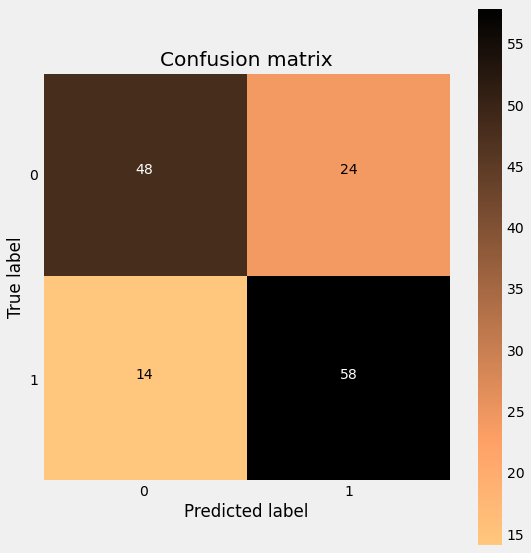

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        72
           1       0.71      0.81      0.75        72

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.73       144
weighted avg       0.74      0.74      0.73       144



In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_svc), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_svc), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_svc), axis=1)).round()))

## **Observations:**
- **SVC has lesser AUC than KNN and all other classifier we trained. SVC was generalized when trained with default parameters (metrics used was accuracy)**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Eventhough SVC was a generalized model, now its making too many erros, hence we will not try this model in Voting Classifier.

## **Hypertune Logistic Regression**

In [ ]:
def objective(trial):
  for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )): # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # assigning xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # assigning xvalid, yvalid
  
    
    # Modelling 
    params =   {'C' : trial.suggest_float('C', 0.0001, 5.0)
    ,'max_iter' : trial.suggest_int('max_iter', 50, 1000)
    , 'penalty' : trial.suggest_categorical('penalty',['l1', 'l2'])
    , 'solver' : trial.suggest_categorical('solver',['liblinear'])
    }
    model = LogisticRegression(**params)                                          # Initialization of LogisticRegression Class
    model.fit(xtrain,ytrain)                                                      # Training the Model on training set

    # Predictions and Evaluation
    preds_valid = model.predict_proba(xvalid)[:, 1]                               # Validating the model on Validation data.
    roc_auc_score = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating the model using roc_aucc_curve
    print(fold, roc_auc_score)

  return roc_auc_score
study_lr = optuna.create_study(direction='maximize')                             # direction = "maximize", optuna will try to maximize the roc_auc_score
study_lr.optimize(objective, n_trials=100)                                        # Running our objective function for 100 trials.

[I 2022-03-06 02:54:17,099] A new study created in memory with name: no-name-2de49a49-8760-474b-84fd-9e631fb2150c
[I 2022-03-06 02:54:17,167] Trial 0 finished with value: 0.8697681421258657 and parameters: {'C': 4.141877479565224, 'max_iter': 314, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,245] Trial 1 finished with value: 0.8697681421258657 and parameters: {'C': 2.5228009749446714, 'max_iter': 136, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8264425936942297
1 0.8915989159891599
2 0.877295995182174
3 0.8637458596808191
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693


[I 2022-03-06 02:54:17,331] Trial 2 finished with value: 0.8697681421258657 and parameters: {'C': 4.859398723485911, 'max_iter': 735, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,409] Trial 3 finished with value: 0.8687142426979826 and parameters: {'C': 1.4343058137607443, 'max_iter': 510, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,482] Trial 4 finished with value: 0.8687142426979826 and parameters: {'C': 3.260223972951943, 'max_iter': 555, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


4 0.8697681421258657
0 0.8261451516954195
1 0.8920505871725384
2 0.8778982234266787
3 0.8631436314363143
4 0.8687142426979826
0 0.8261451516954194
1 0.8914483589280338
2 0.8778982234266787
3 0.8632941884974406
4 0.8687142426979826
0 0.8262938726948245
1 0.8914483589280338
2 0.8774465522433001


[I 2022-03-06 02:54:17,554] Trial 5 finished with value: 0.8693164709424872 and parameters: {'C': 1.6420540885363184, 'max_iter': 495, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,622] Trial 6 finished with value: 0.8687142426979826 and parameters: {'C': 2.511372217560106, 'max_iter': 498, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,691] Trial 7 finished with value: 0.8688647997591087 and parameters: {'C': 0.7975197604276855, 'max_iter': 826, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


3 0.8638964167419452
4 0.8693164709424872
0 0.8259964306960142
1 0.8914483589280338
2 0.8777476663655526
3 0.8634447455585668
4 0.8687142426979826
0 0.8259964306960142
1 0.8923517012947908
2 0.878199337548931
3 0.8632941884974406
4 0.8688647997591087
0 0.8264425936942297
1 0.89159891598916
2 0.8774465522433001


[I 2022-03-06 02:54:17,776] Trial 8 finished with value: 0.8696175850647396 and parameters: {'C': 1.0891435837606402, 'max_iter': 635, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,846] Trial 9 finished with value: 0.8685636856368564 and parameters: {'C': 1.2794770521021783, 'max_iter': 423, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:17,915] Trial 10 finished with value: 0.8697681421258657 and parameters: {'C': 4.651460301941236, 'max_iter': 183, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


3 0.8644986449864498
4 0.8696175850647396
0 0.8261451516954195
1 0.8922011442336646
2 0.8778982234266787
3 0.8632941884974406
4 0.8685636856368564
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599


[I 2022-03-06 02:54:17,992] Trial 11 finished with value: 0.8696175850647396 and parameters: {'C': 3.5838342865622193, 'max_iter': 73, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,065] Trial 12 finished with value: 0.8697681421258657 and parameters: {'C': 3.785442953954351, 'max_iter': 274, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,142] Trial 13 finished with value: 0.8697681421258657 and parameters: {'C': 2.4654304301266667, 'max_iter': 310, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


2 0.877145438121048
3 0.8637458596808192
4 0.8696175850647396
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.877295995182174
3 0.8637458596808191
4 0.8697681421258657


[I 2022-03-06 02:54:18,225] Trial 14 finished with value: 0.8693164709424872 and parameters: {'C': 0.3120286834153112, 'max_iter': 997, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,296] Trial 15 finished with value: 0.8697681421258657 and parameters: {'C': 2.5406508763651887, 'max_iter': 55, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,368] Trial 16 finished with value: 0.8697681421258657 and parameters: {'C': 4.292780994902268, 'max_iter': 221, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8254015466983938
1 0.89159891598916
2 0.877145438121048
3 0.8663053297199639
4 0.8693164709424872
0 0.8264425936942297
1 0.8915989159891599
2 0.877295995182174
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657


[I 2022-03-06 02:54:18,451] Trial 17 finished with value: 0.8697681421258657 and parameters: {'C': 3.0266776809199367, 'max_iter': 327, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,524] Trial 18 finished with value: 0.8697681421258657 and parameters: {'C': 4.078569080649079, 'max_iter': 92, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,593] Trial 19 finished with value: 0.8697681421258657 and parameters: {'C': 4.215626801575716, 'max_iter': 222, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8264425936942297
1 0.8914483589280338
2 0.877295995182174
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877295995182174
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657


[I 2022-03-06 02:54:18,667] Trial 20 finished with value: 0.8697681421258657 and parameters: {'C': 3.1976964758782036, 'max_iter': 337, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,736] Trial 21 finished with value: 0.8697681421258657 and parameters: {'C': 4.016100958088545, 'max_iter': 403, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,808] Trial 22 finished with value: 0.8697681421258657 and parameters: {'C': 4.514452136267909, 'max_iter': 146, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8264425936942297
1 0.8914483589280338
2 0.877295995182174
3 0.8635953026196929
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:18,884] Trial 23 finished with value: 0.8696175850647396 and parameters: {'C': 3.2980617520067237, 'max_iter': 372, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:18,956] Trial 24 finished with value: 0.8697681421258657 and parameters: {'C': 4.975300394842221, 'max_iter': 704, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,032] Trial 25 finished with value: 0.8697681421258657 and parameters: {'C': 4.6322299335955135, 'max_iter': 415, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8264425936942297
1 0.8914483589280338
2 0.877295995182174
3 0.8637458596808192
4 0.8696175850647396
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:19,114] Trial 26 finished with value: 0.8687142426979826 and parameters: {'C': 3.847541210250096, 'max_iter': 163, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,193] Trial 27 finished with value: 0.8697681421258657 and parameters: {'C': 4.977442272260689, 'max_iter': 714, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8259964306960142
1 0.8914483589280338
2 0.8775971093044264
3 0.8632941884974406
4 0.8687142426979826
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4

[I 2022-03-06 02:54:19,273] Trial 28 finished with value: 0.8697681421258657 and parameters: {'C': 4.455868383240693, 'max_iter': 588, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,342] Trial 29 finished with value: 0.8697681421258657 and parameters: {'C': 4.9890495267471024, 'max_iter': 886, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,409] Trial 30 finished with value: 0.8697681421258657 and parameters: {'C': 4.6858337970129895, 'max_iter': 437, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693


[I 2022-03-06 02:54:19,485] Trial 31 finished with value: 0.8697681421258657 and parameters: {'C': 4.383818034989353, 'max_iter': 573, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,555] Trial 32 finished with value: 0.8697681421258657 and parameters: {'C': 4.887681136501845, 'max_iter': 865, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,623] Trial 33 finished with value: 0.8697681421258657 and parameters: {'C': 4.604745843608835, 'max_iter': 866, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192


[I 2022-03-06 02:54:19,696] Trial 34 finished with value: 0.8696175850647396 and parameters: {'C': 3.5872987251619777, 'max_iter': 976, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,764] Trial 35 finished with value: 0.8690153568202349 and parameters: {'C': 4.372276019990104, 'max_iter': 465, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,835] Trial 36 finished with value: 0.8696175850647396 and parameters: {'C': 2.851788199209051, 'max_iter': 840, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


4 0.8696175850647396
0 0.8261451516954195
1 0.8915989159891599
2 0.8775971093044264
3 0.8632941884974406
4 0.8690153568202349
0 0.8264425936942297
1 0.8915989159891599
2 0.877295995182174
3 0.8637458596808191
4 0.8696175850647396
0 0.8259964306960142
1 0.8914483589280338
2 0.8775971093044264
3

[I 2022-03-06 02:54:19,912] Trial 37 finished with value: 0.8688647997591088 and parameters: {'C': 3.985728447335362, 'max_iter': 932, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:19,981] Trial 38 finished with value: 0.8694670280036134 and parameters: {'C': 1.9368541224237688, 'max_iter': 776, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,049] Trial 39 finished with value: 0.8697681421258657 and parameters: {'C': 4.781700326085817, 'max_iter': 657, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


 0.8632941884974406
4 0.8688647997591088
0 0.8262938726948246
1 0.8915989159891599
2 0.877295995182174
3 0.863745859680819
4 0.8694670280036134
0 0.8262938726948246
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8259964306960142
1 0.8914483589280338
2 0.8775971093044264


[I 2022-03-06 02:54:20,121] Trial 40 finished with value: 0.8687142426979826 and parameters: {'C': 3.6757062451372184, 'max_iter': 778, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,208] Trial 41 finished with value: 0.8697681421258657 and parameters: {'C': 4.6752508647136075, 'max_iter': 577, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,276] Trial 42 finished with value: 0.8697681421258657 and parameters: {'C': 4.73516740921631, 'max_iter': 639, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


3 0.8634447455585668
4 0.8687142426979826
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8264425936942297


[I 2022-03-06 02:54:20,350] Trial 43 finished with value: 0.8696175850647396 and parameters: {'C': 3.325560608385306, 'max_iter': 228, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,414] Trial 44 finished with value: 0.8697681421258657 and parameters: {'C': 4.193650772432982, 'max_iter': 665, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,480] Trial 45 finished with value: 0.8697681421258657 and parameters: {'C': 3.979631195681555, 'max_iter': 352, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


1 0.8914483589280338
2 0.877145438121048
3 0.8637458596808192
4 0.8696175850647396
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348


[I 2022-03-06 02:54:20,557] Trial 46 finished with value: 0.8696175850647396 and parameters: {'C': 3.465017726411512, 'max_iter': 517, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,626] Trial 47 finished with value: 0.8697681421258657 and parameters: {'C': 4.386560315395382, 'max_iter': 594, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,696] Trial 48 finished with value: 0.8690153568202349 and parameters: {'C': 4.518089749131498, 'max_iter': 391, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


1 0.8914483589280338
2 0.877145438121048
3 0.8637458596808192
4 0.8696175850647396
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657
0 0.8261451516954195
1 0.8915989159891599
2 0.8775971093044264
3 0.8632941884974406
4 0.8690153568202349
0 0.8265913146936348


[I 2022-03-06 02:54:20,770] Trial 49 finished with value: 0.8697681421258657 and parameters: {'C': 3.8392384460773816, 'max_iter': 288, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,838] Trial 50 finished with value: 0.8252032520325203 and parameters: {'C': 0.0002428034816928104, 'max_iter': 118, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:20,907] Trial 51 finished with value: 0.8697681421258657 and parameters: {'C': 4.947696859459135, 'max_iter': 713, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8697681421258657
0 0.7888161808447353
1 0.8506473953628425
2 0.8580246913580246
3 0.804125263474857
4 0.8252032520325203
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8262938726948246

[I 2022-03-06 02:54:20,983] Trial 52 finished with value: 0.8697681421258657 and parameters: {'C': 4.953222324701978, 'max_iter': 718, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,055] Trial 53 finished with value: 0.8697681421258657 and parameters: {'C': 4.970067789944011, 'max_iter': 727, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,128] Trial 54 finished with value: 0.8697681421258657 and parameters: {'C': 4.467392334948904, 'max_iter': 781, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.



1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:21,206] Trial 55 finished with value: 0.8697681421258657 and parameters: {'C': 4.771794199779061, 'max_iter': 468, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,278] Trial 56 finished with value: 0.8697681421258657 and parameters: {'C': 4.52437356611804, 'max_iter': 428, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,351] Trial 57 finished with value: 0.8697681421258657 and parameters: {'C': 4.707478831112824, 'max_iter': 470, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8262938726948246
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:21,431] Trial 58 finished with value: 0.8697681421258657 and parameters: {'C': 4.189376969358573, 'max_iter': 536, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,512] Trial 59 finished with value: 0.8697681421258657 and parameters: {'C': 4.317559811395039, 'max_iter': 587, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657


[I 2022-03-06 02:54:21,586] Trial 60 finished with value: 0.8697681421258657 and parameters: {'C': 4.17863092184051, 'max_iter': 544, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,663] Trial 61 finished with value: 0.8697681421258657 and parameters: {'C': 4.36859126273678, 'max_iter': 863, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,739] Trial 62 finished with value: 0.8697681421258657 and parameters: {'C': 4.063829471595522, 'max_iter': 903, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877295995182174
3 0.8638964167419453
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693


[I 2022-03-06 02:54:21,823] Trial 63 finished with value: 0.8697681421258657 and parameters: {'C': 4.805307702280886, 'max_iter': 855, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,900] Trial 64 finished with value: 0.8697681421258657 and parameters: {'C': 4.648425493441912, 'max_iter': 935, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:21,975] Trial 65 finished with value: 0.8697681421258657 and parameters: {'C': 4.806055151806239, 'max_iter': 820, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599


[I 2022-03-06 02:54:22,056] Trial 66 finished with value: 0.8697681421258657 and parameters: {'C': 4.633016589575263, 'max_iter': 676, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,134] Trial 67 finished with value: 0.8690153568202349 and parameters: {'C': 4.820710114273384, 'max_iter': 805, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,213] Trial 68 finished with value: 0.8697681421258657 and parameters: {'C': 4.615421290013214, 'max_iter': 657, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8262938726948243
1 0.8915989159891599
2 0.8777476663655526
3 0.8632941884974406
4 0.8690153568202349
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:22,307] Trial 69 finished with value: 0.8694670280036134 and parameters: {'C': 2.1254665411416753, 'max_iter': 619, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,390] Trial 70 finished with value: 0.8697681421258657 and parameters: {'C': 4.500906962949293, 'max_iter': 438, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8262938726948246
1 0.8915989159891599
2 0.877295995182174
3 0.863745859680819
4 0.8694670280036134
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048


[I 2022-03-06 02:54:22,479] Trial 71 finished with value: 0.8697681421258657 and parameters: {'C': 3.8941298438247856, 'max_iter': 636, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,554] Trial 72 finished with value: 0.8697681421258657 and parameters: {'C': 4.198926620506394, 'max_iter': 675, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,628] Trial 73 finished with value: 0.8697681421258657 and parameters: {'C': 3.772699357009555, 'max_iter': 622, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


3 0.8637458596808192
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8697681421258657
0 0.8265913146936348


[I 2022-03-06 02:54:22,709] Trial 74 finished with value: 0.8697681421258657 and parameters: {'C': 4.159090448612546, 'max_iter': 346, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,784] Trial 75 finished with value: 0.8696175850647396 and parameters: {'C': 3.6869460112777586, 'max_iter': 612, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:22,866] Trial 76 finished with value: 0.8690153568202349 and parameters: {'C': 0.8144545656318414, 'max_iter': 559, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8696175850647396
0 0.8258477096966093
1 0.8923517012947908
2 0.878199337548931
3 0.8632941884974406
4 0.8690153568202349


[I 2022-03-06 02:54:22,951] Trial 77 finished with value: 0.8697681421258657 and parameters: {'C': 4.387164715798748, 'max_iter': 945, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,026] Trial 78 finished with value: 0.8697681421258657 and parameters: {'C': 3.922428411232152, 'max_iter': 238, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,100] Trial 79 finished with value: 0.8696175850647396 and parameters: {'C': 3.487923006455838, 'max_iter': 283, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8637458596808192
4 0.8696175850647396


[I 2022-03-06 02:54:23,178] Trial 80 finished with value: 0.8697681421258657 and parameters: {'C': 4.022243649365513, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,273] Trial 81 finished with value: 0.8697681421258657 and parameters: {'C': 4.296152770356773, 'max_iter': 744, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.877145438121048
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264


[I 2022-03-06 02:54:23,352] Trial 82 finished with value: 0.8697681421258657 and parameters: {'C': 4.994829546493545, 'max_iter': 745, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,428] Trial 83 finished with value: 0.8697681421258657 and parameters: {'C': 4.878720129182411, 'max_iter': 707, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,499] Trial 84 finished with value: 0.8697681421258657 and parameters: {'C': 3.013421387382984, 'max_iter': 193, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


3 0.863595302619693
4 0.8697681421258657
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8264425936942297
1 0.8914483589280338
2 0.877295995182174
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 

[I 2022-03-06 02:54:23,583] Trial 85 finished with value: 0.8697681421258657 and parameters: {'C': 4.525895464791866, 'max_iter': 475, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,655] Trial 86 finished with value: 0.8697681421258657 and parameters: {'C': 4.281175101127618, 'max_iter': 549, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,729] Trial 87 finished with value: 0.8697681421258657 and parameters: {'C': 4.755502911532078, 'max_iter': 488, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:23,807] Trial 88 finished with value: 0.8697681421258657 and parameters: {'C': 4.089158326211903, 'max_iter': 534, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,879] Trial 89 finished with value: 0.8697681421258657 and parameters: {'C': 4.08096629508286, 'max_iter': 449, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:23,948] Trial 90 finished with value: 0.8697681421258657 and parameters: {'C': 4.316798319743762, 'max_iter': 387, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.877295995182174
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.877295995182174
3 0.8638964167419453
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:24,026] Trial 91 finished with value: 0.8697681421258657 and parameters: {'C': 4.163854287188373, 'max_iter': 510, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:24,098] Trial 92 finished with value: 0.8697681421258657 and parameters: {'C': 4.55258276217847, 'max_iter': 886, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:24,168] Trial 93 finished with value: 0.8697681421258657 and parameters: {'C': 4.264697113556517, 'max_iter': 496, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.8637458596808191
4 0.8697681421258657


[I 2022-03-06 02:54:24,245] Trial 94 finished with value: 0.8697681421258657 and parameters: {'C': 4.396660833527629, 'max_iter': 927, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:24,328] Trial 95 finished with value: 0.8697681421258657 and parameters: {'C': 4.738810236869151, 'max_iter': 835, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8774465522433001
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657
0 0.8261451516954195
1 0.8915989159891599
2 0.8775971093044264
3 0.8632941884974406
4 

[I 2022-03-06 02:54:24,407] Trial 96 finished with value: 0.8690153568202349 and parameters: {'C': 4.632395592809155, 'max_iter': 906, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:24,477] Trial 97 finished with value: 0.8697681421258657 and parameters: {'C': 4.90473945550498, 'max_iter': 475, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.
[I 2022-03-06 02:54:24,547] Trial 98 finished with value: 0.8697681421258657 and parameters: {'C': 4.602496617117765, 'max_iter': 968, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0.8690153568202349
0 0.8262938726948246
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657
0 0.8265913146936348
1 0.8915989159891599
2 0.8777476663655526
3 0.863595302619693
4 0.8697681421258657


[I 2022-03-06 02:54:24,659] Trial 99 finished with value: 0.8697681421258657 and parameters: {'C': 4.4810465835818105, 'max_iter': 856, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8697681421258657.


0 0.8265913146936348
1 0.8915989159891599
2 0.8775971093044264
3 0.863595302619693
4 0.8697681421258657


In [ ]:
trial_lr = study_lr.best_trial
print(f'roc_auc_score: {trial_lr.value}')
print(f"Best hyperparameters: {trial_lr.params}")

roc_auc_score: 0.8697681421258657
Best hyperparameters: {'C': 4.141877479565224, 'max_iter': 314, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
optuna.visualization.plot_optimization_history(study_lr)

In [ ]:
optuna.visualization.plot_slice(study_lr)

## **Training Logistic Regression with tuned hyper-parameters**

In [ ]:
final_test_predictions_lr = []                                                         # To store final test predictions
final_valid_predictions_lr = []                                                        # To store final validation predictions
scores = []                                                                             # To store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_lr.params
    params = {'C': 4.141877479565224, 'max_iter': 314, 'penalty': 'l2', 'solver': 'liblinear'}
    model_lr = LogisticRegression(**params)                                            # instantiate LogisticRegression Class
    model_lr.fit(xtrain, ytrain)                                                       # Training the model on training set

    preds_valid = model_lr.predict_proba(xvalid)[:, 1]                                 # Predicting Validation set 
    test_preds = model_lr.predict_proba(xtest)[:, 1]                                   # Predicting Test Set
    final_test_predictions_lr.append(test_preds)                                       # Appending test predictions to list
    final_valid_predictions_lr.append(preds_valid)                                     # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8265913146936348
Fold 0 AUC_test:  0.78125
Fold 1 AUC_valid:  0.8915989159891599
Fold 1 AUC_test:  0.7822145061728395
Fold 2 AUC_valid:  0.8774465522433001
Fold 2 AUC_test:  0.7816358024691358
Fold 3 AUC_valid:  0.8637458596808191
Fold 3 AUC_test:  0.7866512345679012
Fold 4 AUC_valid:  0.8697681421258657
Fold 4 AUC_test:  0.7878086419753086
0.8658301569465559 0.021718694003093533


## **Evaluation of Logistic Regression**

Confusion matrix, without normalization
[[50 22]
 [22 50]]


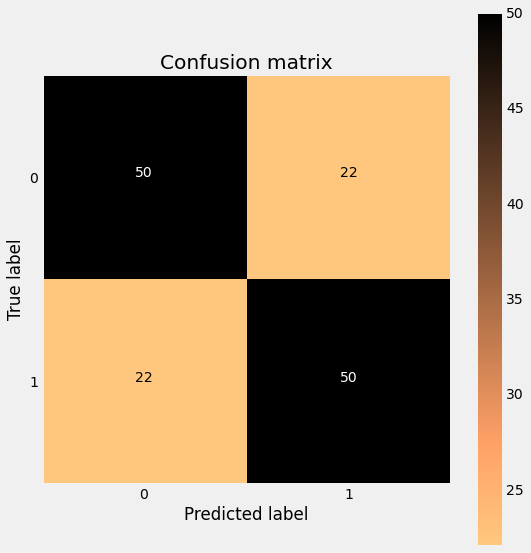

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        72
           1       0.69      0.69      0.69        72

    accuracy                           0.69       144
   macro avg       0.69      0.69      0.69       144
weighted avg       0.69      0.69      0.69       144



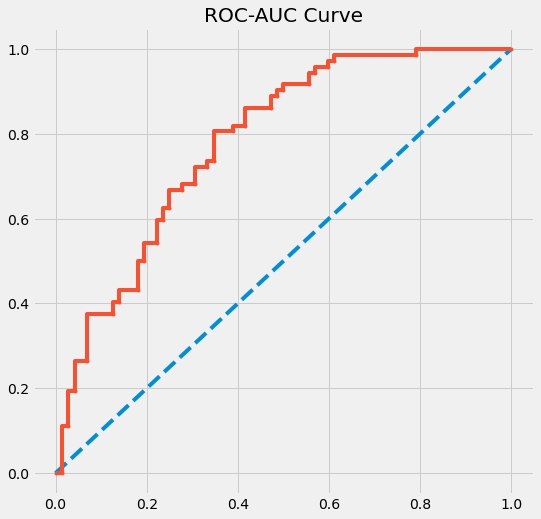

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_lr), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_lr), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_lr), axis=1)).round()))

## **Observations:**
- **SVC has lesser AUC than KNN and all other classifier we trained. SVC was generalized when trained with default parameters (metrics used was accuracy)**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Even though Logistic Regression was a generalized model with default params but it have equal FP as FN, hence we will not consider this model in Voting Classifier.

# **Final Model: Voting Classifier**
- This type of ensemble is one of the most intuitive and easy to understand. The Voting Classifier is a homogeneous and heterogeneous type of Ensemble Learning, that is, the base classifiers can be of the same or different type. As mentioned earlier, this type of ensemble also works as an extension of bagging (e.g. Random Forest).

- The architecture of a Voting Classifier is made up of a number “n” of ML models, whose predictions are valued in two different ways: hard and soft. In hard mode, the winning prediction is the one with “the most votes”. In Figure 2 we see an example of how the Voting Classifier works in hard mode.

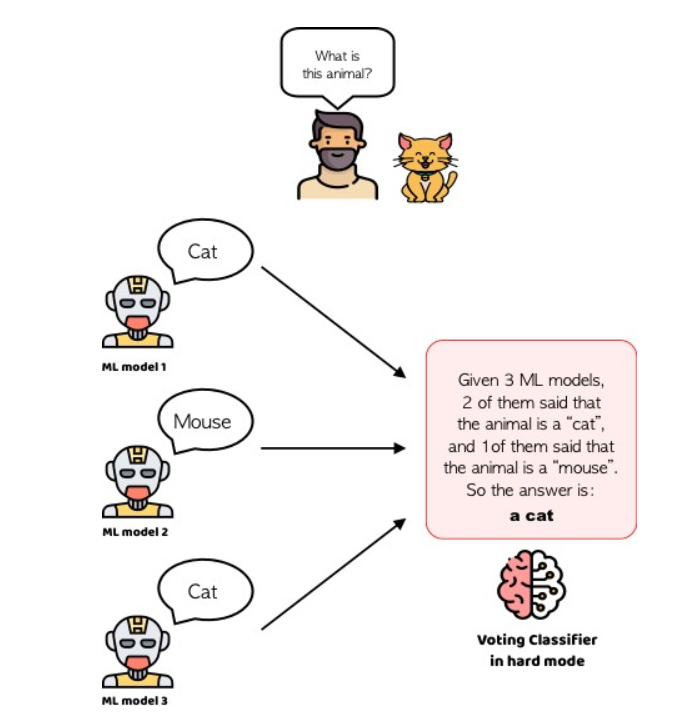

- On the other hand, the Voting Classifier in soft mode considers the probabilities thrown by each ML model, these probabilities will be weighted and averaged, consequently the winning class will be the one with the highest weighted and averaged probability. In Figure 3 we see an example of how the Voting Classifier works in the soft mode.

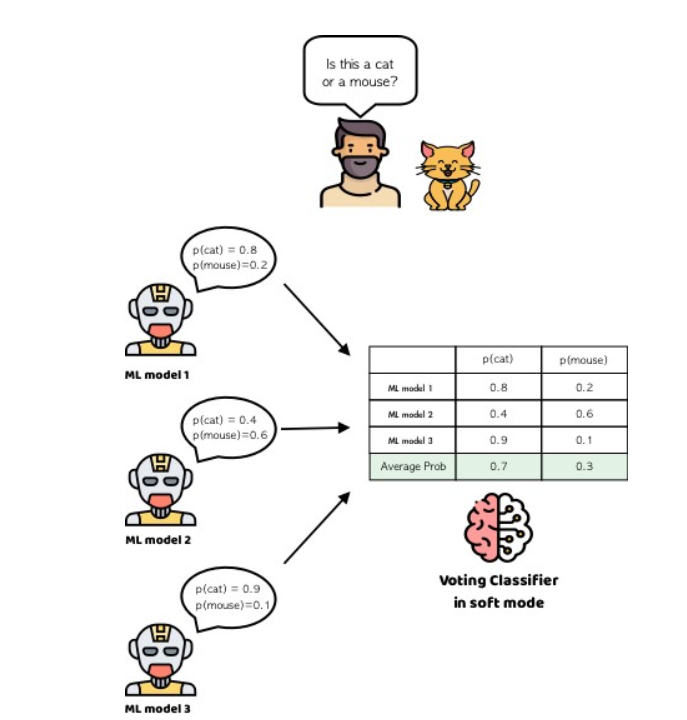

In [ ]:
final_test_predictions_vclf = [] #to store final test predictions
final_valid_predictions_vclf = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_lr.params

    model_vclf = VotingClassifier(estimators=[ 
                                              ('KNN', model_knn),                # KNN classifier
                                               ('RF', model_rf),                  # RandomForest Classifier
                                               ('ETC', model_etc),                # ExtraTreesClassifier
                                              ('XGB', model_xgb),                 # XGBosst Classifier
                                              ('MLP-NN', model_mlp),              # Multi-Layered Perceptron 
                                              #  ('SVC', model_svc),                                              
                                              ],                  
                                  voting='soft')                                      # Used Soft voting
    model_vclf.fit(xtrain, ytrain)                                                    # Training the model

    preds_valid = model_vclf.predict_proba(xvalid)[:, 1]                              # Prediction on validation data
    test_preds = model_vclf.predict_proba(xtest)[:, 1]                                # Prediction on test data
    final_test_predictions_vclf.append(test_preds)                                    # Appending test predictions to list
    final_valid_predictions_vclf.append(preds_valid)                                  # Appending validation predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                  # Evaluating validation predictions using roc_auc_score
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                     # Evaluating Test predictions using roc_auc_score
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                            # Printing fold and AUC_validation
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                              # Printing fold and AUC_test
    scores.append(roc_auc_score_valid)                                                # Appending validation score to list
    
    
print(np.mean(scores), np.std(scores))                                                # Printing Mean and Standard Deviation of Scores.

Fold 0 AUC_valid:  0.8939619274241524
Fold 0 AUC_test:  0.8591820987654322
Fold 1 AUC_valid:  0.9092140921409213
Fold 1 AUC_test:  0.8682484567901235
Fold 2 AUC_valid:  0.9409816320385426
Fold 2 AUC_test:  0.8726851851851852
Fold 3 AUC_valid:  0.9345076784101175
Fold 3 AUC_test:  0.8628472222222222
Fold 4 AUC_valid:  0.9096657633242999
Fold 4 AUC_test:  0.8757716049382717
0.9176662186676067 0.017461857969838592


Confusion matrix, without normalization
[[51 21]
 [ 4 68]]


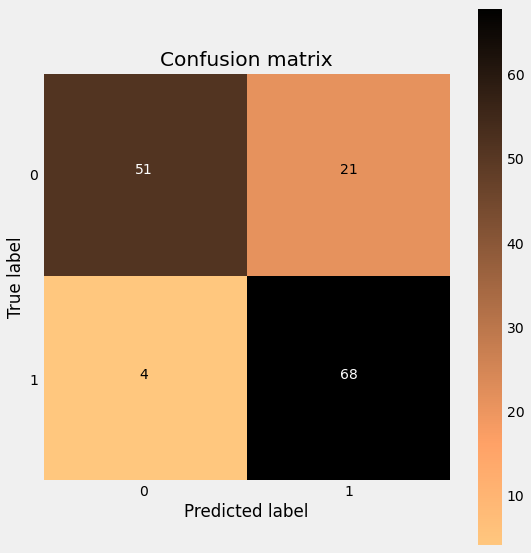

              precision    recall  f1-score   support

           0       0.93      0.71      0.80        72
           1       0.76      0.94      0.84        72

    accuracy                           0.83       144
   macro avg       0.85      0.83      0.82       144
weighted avg       0.85      0.83      0.82       144



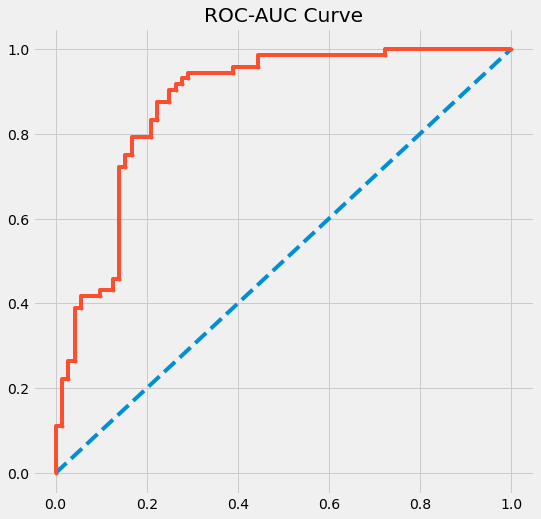

In [ ]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_vclf), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_vclf), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_vclf), axis=1)).round()))

## **Conclusion:**
- We started with **hypertuned KNN which had 4 False Positives and 39 False Negatives** and our aim was to improve this.
- We chose different models (Random Forest, Extra Tree Classifier, XGBoost, Multi-Layer Perceptron) and used Voting classifier with soft voting on top of these.
- Our **Final model has 4 False Positives and 21 False Negatives**, which is an significant improvement. 
